In [905]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

# Importing the datasets

In [906]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/sample_submission.csv')
sample_submission.head()

,encounter_id,readmitted_binary
0,499502,No
1,447319,No
2,309126,Yes
3,181183,Yes
4,359339,No


In [907]:
test = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/test.csv', na_values=['?', ''], index_col='encounter_id')
test.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [908]:
train = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/train.csv', na_values=['?', ''], index_col='encounter_id')
train.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [909]:
train.columns

Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary', 'readmitted_multiclass'],
      dtype='object')

In [910]:
test.columns

Index(['country', 'patient_id', 'race', 'gender', 'age', 'weight',
       'payer_code', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication'],
      dtype='object')

In [911]:
# Checking if there are duplicates on train and test

In [912]:
train_duplicated = train.loc[train.duplicated(), :]
train_duplicated

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [913]:
test_duplicated = test.loc[test.duplicated(), :]
test_duplicated

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,


In [914]:
train.drop(['country','weight'], axis=1, inplace=True)

In [915]:
test.drop(['country','weight'], axis=1, inplace=True)

In [916]:
train.isna().sum()

patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_diagnosis                      1008
number_diagnoses                             0
glucose_test_

In [917]:
test.isna().sum()

patient_id                                   0
race                                      2191
gender                                       0
age                                       1531
payer_code                               12055
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            1585
medical_specialty                        15027
average_pulse_bpm                            0
discharge_disposition                     1101
admission_source                          2063
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            5
secondary_diagnosis                         96
additional_diagnosis                       415
number_diagnoses                             0
glucose_test_

In [918]:
train['race'].fillna('Unknown', inplace=True)
train['medical_specialty'].fillna('Unknown', inplace=True)
train['admission_source'].fillna('Unknown', inplace=True)
train['payer_code'].fillna('None', inplace=True)
train['glucose_test_result'].fillna('Not_taken', inplace=True)
train['a1c_test_result'].fillna('Not_taken', inplace=True)
train['admission_type'].fillna('Unknown', inplace=True)
train['age'].fillna('Unknown', inplace=True)
train['discharge_disposition'].fillna('Unknown', inplace=True)
train['primary_diagnosis'].fillna('Unknown', inplace=True)
train['secondary_diagnosis'].fillna('Unknown', inplace=True)
train['additional_diagnosis'].fillna('Unknown', inplace=True)

In [919]:
test['race'].fillna('Unknown', inplace=True)
test['medical_specialty'].fillna('Unknown', inplace=True)
test['admission_source'].fillna('Unknown', inplace=True)
test['payer_code'].fillna('None', inplace=True)
test['glucose_test_result'].fillna('Not_taken', inplace=True)
test['a1c_test_result'].fillna('Not_taken', inplace=True)
test['admission_type'].fillna('Unknown', inplace=True)
test['age'].fillna('Unknown', inplace=True)
test['discharge_disposition'].fillna('Unknown', inplace=True)
test['primary_diagnosis'].fillna('Unknown', inplace=True)
test['secondary_diagnosis'].fillna('Unknown', inplace=True)
test['additional_diagnosis'].fillna('Unknown', inplace=True)

In [920]:
train.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [921]:
test.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

In [922]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                   }
train = train.rename(columns=new_column_names)

In [923]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                   }
test = test.rename(columns=new_column_names)

In [924]:
train['length_of_stay']

encounter_id
533253     2
426224    14
634063     6
890610     6
654194     6
          ..
660160     7
826429     9
332030     5
757560     2
459757     5
Name: length_of_stay, Length: 71236, dtype: int64

In [925]:
test['length_of_stay']

encounter_id
499502     3
447319    10
309126     2
181183     4
359339     1
          ..
451150     4
549298     2
327586     2
351214    14
914270     3
Name: length_of_stay, Length: 30530, dtype: int64

In [926]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]
    fig = plt.figure(figsize=(50, 10))
    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
 
    #Rotacionar os rótulos do eixo x
    plt.xticks(rotation=45, ha="right")
 
    plt.show()

### Race

In [927]:
train['race'].value_counts()

race
Caucasian          50693
AfricanAmerican    12693
Unknown             5070
Hispanic            1364
Other                995
Asian                421
Name: count, dtype: int64

In [928]:
test['race'].value_counts()

race
Caucasian          21617
AfricanAmerican     5535
Unknown             2191
Hispanic             563
Other                437
Asian                187
Name: count, dtype: int64

In [929]:
len(train[train['race']=='94306932'])

0

In [930]:
len(test[test['race']=='94306932'])

0

In [931]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()
train[train['patient_id'].isin(unknown)]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
727104,94306932,Caucasian,Male,[70-80),SP,0,0,0,Urgent,Hematology,...,157,197,9,Not_taken,Not_taken,No,No,[],No,>30 days
992230,57344247,Unknown,Male,[80-90),MC,0,0,0,Elective,Orthopedics,...,715,250,8,Not_taken,Not_taken,Ch,Yes,['insulin'],No,No
353655,28219392,Unknown,Female,[60-70),MC,1,0,0,Urgent,InternalMedicine,...,E935,197,9,Not_taken,Not_taken,No,Yes,['glyburide'],No,No
911403,88363836,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,414,401,9,Not_taken,>8,No,No,[],No,No
811707,23388138,Caucasian,Female,[70-80),None,1,1,0,Not Available,Family/GeneralPractice,...,473,250.4,5,Norm,Not_taken,Ch,Yes,['insulin'],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631812,23213772,Unknown,Female,[70-80),MC,0,0,1,Elective,InternalMedicine,...,357,787,7,Not_taken,Not_taken,Ch,Yes,"['metformin', 'glimepiride']",No,No
714110,38516562,Unknown,Male,[80-90),MC,0,0,0,Emergency,Unknown,...,496,250,5,Not_taken,Not_taken,No,No,[],No,>30 days
398947,59167503,Unknown,Female,[60-70),MC,0,0,0,Emergency,Unknown,...,403,250,9,Not_taken,Not_taken,Ch,Yes,['insulin'],No,No


In [932]:
unknown = test[test['race']== 'Unknown']['patient_id'].unique()
test[test['patient_id'].isin(unknown)]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
610450,29095002,Unknown,Female,[80-90),MC,0,1,0,Not Available,Unknown,...,11,38,599,428,5,Norm,Not_taken,Ch,Yes,"['pioglitazone', 'insulin']"
884114,15580827,Unknown,Female,[50-60),MD,0,0,1,Urgent,Family/GeneralPractice,...,20,487,491,250.02,5,Not_taken,Not_taken,Ch,Yes,"['metformin', 'rosiglitazone', 'insulin']"
895020,24697071,Unknown,Female,[60-70),MC,4,1,1,Elective,Nephrology,...,21,996,403,250.4,4,Not_taken,Not_taken,Ch,Yes,['insulin']
949855,66708630,Unknown,Female,[60-70),SP,0,0,0,Emergency,Unknown,...,16,482,584,403,9,Not_taken,>8,No,Yes,['glipizide']
470398,70734564,Unknown,Female,[70-80),MC,0,0,0,Emergency,Unknown,...,19,414,411,496,9,Not_taken,Not_taken,Ch,Yes,"['metformin', 'insulin']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241330,41950188,Unknown,Male,Unknown,MC,0,0,0,Emergency,Unknown,...,15,491,486,427,8,Not_taken,Not_taken,No,Yes,['metformin']
448446,90245358,Unknown,Male,[80-90),MC,1,1,2,Emergency,Unknown,...,13,599,496,585,9,Not_taken,Not_taken,No,No,[]
382366,103896540,Caucasian,Male,[50-60),MC,0,0,1,Urgent,Family/GeneralPractice,...,7,420,996,403,5,Not_taken,Not_taken,No,No,[]


In [933]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Unknown,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,Not_taken,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,Not_taken,Ch,Yes,['insulin'],No,>30 days


In [934]:
test[test['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
272826,23904909,Caucasian,Female,[80-90),None,0,0,0,Not Available,InternalMedicine,...,7,728,294,414,7,Norm,Not_taken,No,Yes,['insulin']


In [935]:
unknown = train[train['race']== 'Unknown']['patient_id'].unique()

known_race = train[train['patient_id'].isin(unknown) & train['race']!= 'Unknown']

In [936]:
unknown = test[test['race']== 'Unknown']['patient_id'].unique()

known_race = test[test['patient_id'].isin(unknown) & test['race']!= 'Unknown']

In [937]:
train[train['race']=='Unknown'].shape

(5070, 28)

In [938]:
test[test['race']=='Unknown'].shape

(2191, 26)

In [939]:
def fill_race(df):
    for i, row in df.iterrows():
        if row['race'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'race' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['race'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'race' of the current row with the 'race' of the found row
                df.at[i, 'race'] = other_rows.iloc[0]['race']
    return df

fill_race(train)

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,Female,[70-80),None,0,0,2,Emergency,Family/GeneralPractice,...,276,466,8,Not_taken,Not_taken,No,No,[],No,>30 days
426224,29775006,AfricanAmerican,Male,[50-60),None,0,0,0,Emergency,Unknown,...,785,162,9,Not_taken,Not_taken,No,Yes,['insulin'],No,No
634063,80729253,Caucasian,Female,[60-70),None,0,0,1,Unknown,Family/GeneralPractice,...,135,250,6,Not_taken,Not_taken,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,2919042,AfricanAmerican,Male,[60-70),MC,0,0,1,Emergency,InternalMedicine,...,562,455,5,Not_taken,Not_taken,No,No,[],No,No
654194,84871971,Caucasian,Female,[70-80),HM,1,0,0,Elective,Unknown,...,599,428,9,Not_taken,Not_taken,No,No,[],No,>30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,AfricanAmerican,Female,[80-90),MC,0,1,0,Elective,InternalMedicine,...,786,250,9,Not_taken,>7,Ch,Yes,"['metformin', 'glyburide', 'insulin']",No,No
826429,4663818,AfricanAmerican,Female,[70-80),None,0,0,0,Urgent,Unknown,...,197,V66,6,Not_taken,>7,Ch,Yes,"['metformin', 'glyburide']",No,No
332030,23397147,Caucasian,Female,[60-70),None,0,2,2,Unknown,Unknown,...,491,276,9,>300,Not_taken,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days


In [940]:
fill_race(test)

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,103232799,Caucasian,Male,[80-90),HM,0,0,0,Emergency,Unknown,...,14,491,414,250,6,Not_taken,Not_taken,No,Yes,['metformin']
447319,93395304,Caucasian,Male,[20-30),HM,0,0,1,Emergency,Unknown,...,7,250.13,70,794,7,>300,Not_taken,No,No,[]
309126,6281586,AfricanAmerican,Male,[30-40),None,0,0,0,Emergency,Pulmonology,...,12,786,250.6,536,6,Not_taken,Not_taken,No,Yes,['insulin']
181183,67381308,Caucasian,Male,[50-60),BC,0,0,0,Not Available,Unknown,...,16,820,873,E884,9,Not_taken,Not_taken,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,71670204,Caucasian,Male,[60-70),None,0,0,0,Emergency,InternalMedicine,...,10,599,427,414,9,Not_taken,Not_taken,No,Yes,['metformin']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,85707450,Caucasian,Male,[70-80),HM,0,0,0,Emergency,Unknown,...,11,584,276,276,9,Not_taken,Not_taken,No,No,[]
549298,328887,Caucasian,Male,[60-70),None,0,0,4,Emergency,Family/GeneralPractice,...,19,428,250.83,276,9,Not_taken,Not_taken,No,Yes,['insulin']
327586,21915459,Caucasian,Female,[80-90),None,0,0,0,Emergency,Nephrology,...,22,996,403,250,6,Not_taken,Not_taken,No,Yes,['insulin']


In [941]:
train[train['race']=='Unknown'].shape

(3648, 28)

In [942]:
test[test['race']=='Unknown'].shape

(1828, 26)

In [943]:
train[train['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
282627,23904909,Caucasian,Female,[80-90),None,0,0,2,Not Available,Family/GeneralPractice,...,599,413,7,>200,Not_taken,Ch,Yes,['insulin'],No,No
537873,23904909,Caucasian,Female,[80-90),None,0,0,1,Not Available,InternalMedicine,...,599,250,8,>200,Not_taken,Ch,Yes,['insulin'],No,>30 days


In [944]:
test[test['patient_id']== 23904909]

,patient_id,race,gender,age,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
272826,23904909,Caucasian,Female,[80-90),None,0,0,0,Not Available,InternalMedicine,...,7,728,294,414,7,Norm,Not_taken,No,Yes,['insulin']


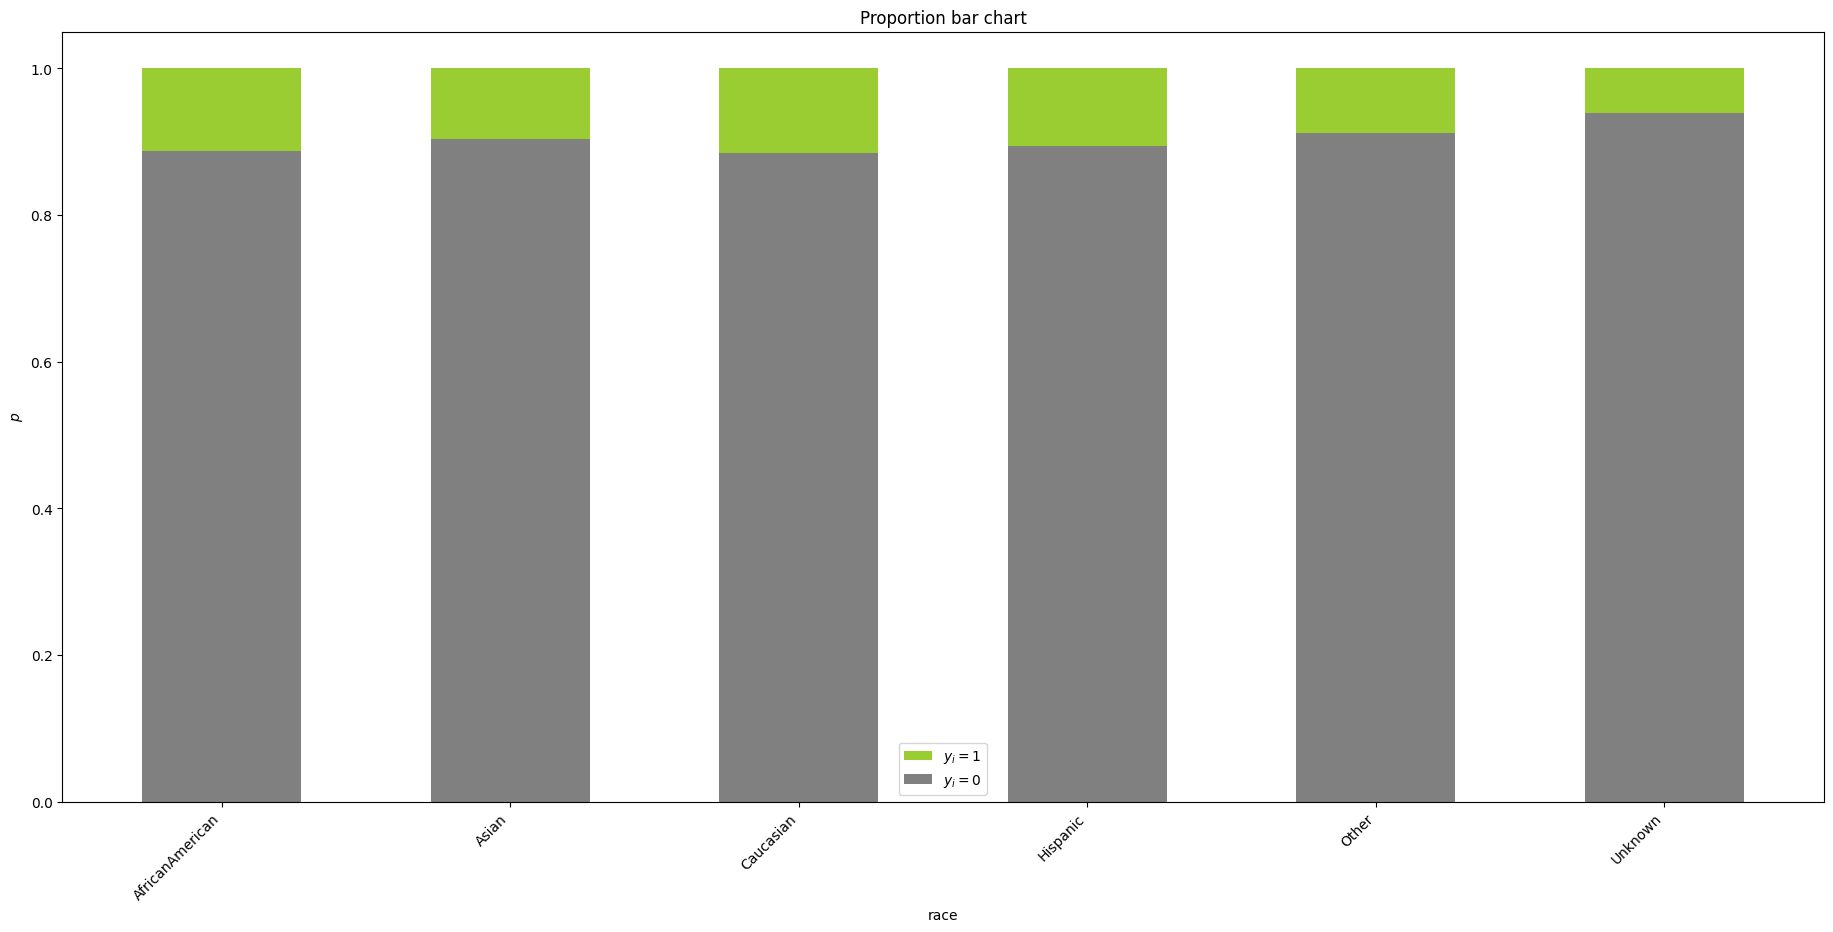

In [945]:
bar_charts_categorical(train, "race", "readmitted_binary")

In [946]:
train['race'].value_counts()

race
Caucasian          51779
AfricanAmerican    12977
Unknown             3648
Hispanic            1394
Other               1013
Asian                425
Name: count, dtype: int64

In [947]:
test['race'].value_counts()

race
Caucasian          21880
AfricanAmerican     5618
Unknown             1828
Hispanic             570
Other                443
Asian                191
Name: count, dtype: int64

In [948]:
train['race_caucasian'] = train['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [949]:
test['race_caucasian'] = test['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

In [952]:
train['race_caucasian'].value_counts()

race_caucasian
1    51779
0    19457
Name: count, dtype: int64

In [953]:
test['race_caucasian'].value_counts()

race_caucasian
1    21880
0     8650
Name: count, dtype: int64

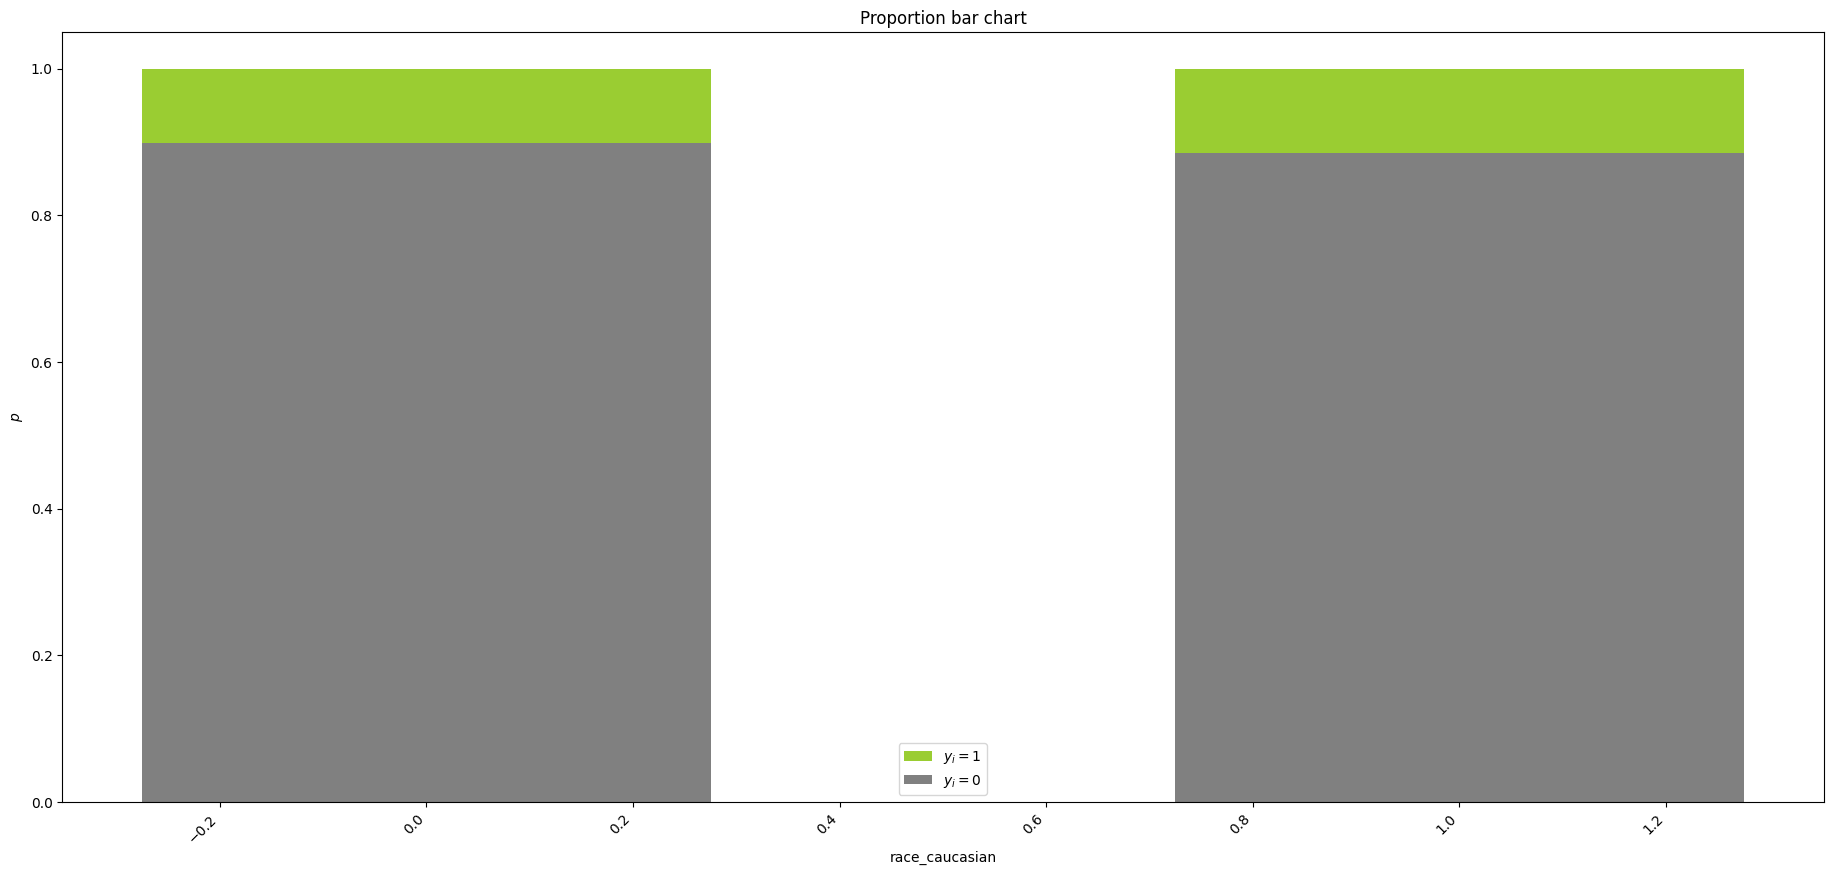

In [954]:
bar_charts_categorical(train, "race_caucasian", "readmitted_binary")

### Medication 

In [955]:
train['medication'].value_counts(normalize=True)

medication
['insulin']                                                       0.304832
[]                                                                0.229463
['metformin']                                                     0.044247
['metformin', 'insulin']                                          0.042689
['glipizide']                                                     0.038281
                                                                    ...   
['pioglitazone', 'acarbose', 'insulin', 'glyburide-metformin']    0.000014
['glimepiride', 'rosiglitazone', 'acarbose']                      0.000014
['glipizide', 'pioglitazone', 'acarbose', 'insulin']              0.000014
['metformin', 'glyburide', 'acarbose', 'insulin']                 0.000014
['glimepiride', 'rosiglitazone', 'miglitol', 'insulin']           0.000014
Name: proportion, Length: 303, dtype: float64

In [956]:
test['medication'].value_counts(normalize=True)

medication
['insulin']                                                             0.302981
[]                                                                      0.231150
['metformin']                                                           0.043629
['metformin', 'insulin']                                                0.042614
['glipizide']                                                           0.037373
                                                                          ...   
['pioglitazone', 'tolazamide', 'insulin']                               0.000033
['metformin', 'glipizide', 'glyburide', 'pioglitazone', 'insulin']      0.000033
['nateglinide', 'rosiglitazone', 'acarbose']                            0.000033
['metformin', 'nateglinide', 'glipizide', 'pioglitazone', 'insulin']    0.000033
['rosiglitazone', 'acarbose', 'insulin']                                0.000033
Name: proportion, Length: 232, dtype: float64

In [957]:
train['medication'] = train['medication'].str.replace('[]', 'no_medication')

In [958]:
test['medication'] = test['medication'].str.replace('[]', 'no_medication')

In [959]:
train['number_generic_medications'] = train['medication'].apply(lambda x: 0 if x=='no_medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [960]:
test['number_generic_medications'] = test['medication'].apply(lambda x: 0 if x=='no_medication' else len((x.replace("[", "").replace("]", "")).split(',')))

In [961]:
train['number_generic_medications'].value_counts()

number_generic_medications
1    33182
0    16346
2    15289
3     5446
4      929
5       41
6        3
Name: count, dtype: int64

In [962]:
# Assuming df is your DataFrame and 'medication' is your column
train['medication'] = train['medication'].apply(lambda x: [i.strip().strip('\'"') for i in x.strip('[]').split(',')])

# Get the list of unique medications
medications = set(x for l in train['medication'] for x in l)

# Create new columns for each medication
for med in medications:
    train[med] = train['medication'].apply(lambda x: 1 if med in x else 0)

In [963]:
# Assuming df is your DataFrame and 'medication' is your column
test['medication'] = test['medication'].apply(lambda x: [i.strip().strip('\'"') for i in x.strip('[]').split(',')])

# Get the list of unique medications
medications = set(x for l in test['medication'] for x in l)

# Create new columns for each medication
for med in medications:
    test[med] = test['medication'].apply(lambda x: 1 if med in x else 0)

In [964]:
train['medication'].value_counts(normalize=True)

medication
[insulin]                                                 0.304832
[no_medication]                                           0.229463
[metformin]                                               0.044247
[metformin, insulin]                                      0.042689
[glipizide]                                               0.038281
                                                            ...   
[pioglitazone, acarbose, insulin, glyburide-metformin]    0.000014
[glimepiride, rosiglitazone, acarbose]                    0.000014
[glipizide, pioglitazone, acarbose, insulin]              0.000014
[metformin, glyburide, acarbose, insulin]                 0.000014
[glimepiride, rosiglitazone, miglitol, insulin]           0.000014
Name: proportion, Length: 303, dtype: float64

In [965]:
train['Sulfonylureas'] = train['glipizide']+train['glyburide']+train['tolbutamide']+train['acetohexamide']+train['chlorpropamide']
+train['glimepiride']+train['tolazamide']
train['Meglitinides'] = train['repaglinide'] + train['nateglinide']
train['Thiazolidinediones'] = train['pioglitazone'] + train['rosiglitazone'] + train['troglitazone']
train['Alpha_Glucosidase_Inhibitors'] = train['acarbose'] + train['miglitol']
train['Combination_Medications'] = train['glimepiride-pioglitazone']+train['glyburide-metformin']+train['metformin-pioglitazone']
+train['glipizide-metformin']+train['metformin-rosiglitazone']

encounter_id
533253    0
426224    0
634063    0
890610    0
654194    0
         ..
660160    0
826429    0
332030    0
757560    0
459757    0
Length: 71236, dtype: int64

In [966]:
# Tirei alguns medications pq não havia no test
test['Sulfonylureas'] = test['glipizide'] + test['glyburide'] + test['tolbutamide'] + test['chlorpropamide'] + test['glimepiride'] + test['tolazamide']
test['Meglitinides'] = test['repaglinide'] + test['nateglinide']
test['Thiazolidinediones'] = test['pioglitazone'] + test['rosiglitazone'] + test['troglitazone']
test['Alpha_Glucosidase_Inhibitors'] = test['acarbose'] + test['miglitol']
test['Combination_Medications'] = test['glipizide-metformin'] + test['metformin-rosiglitazone']

In [967]:
train.drop(['tolazamide', 'miglitol', 'repaglinide',
'nateglinide', 'glimepiride-pioglitazone', 'glipizide', 'pioglitazone',
'glyburide', 'acetohexamide', 'tolbutamide',
'acarbose', 'glyburide-metformin',
'metformin-pioglitazone', 'glipizide-metformin',
'metformin-rosiglitazone', 'chlorpropamide', 'rosiglitazone',
'troglitazone', 'glimepiride'], axis=1, inplace=True)

In [968]:
# Tirei alguns medications pq não havia no test
test.drop(['tolazamide', 'miglitol', 'repaglinide',
'nateglinide', 'glipizide', 'pioglitazone',
'glyburide', 'tolbutamide',
'acarbose', 'glyburide-metformin',
'glipizide-metformin',
'metformin-rosiglitazone', 'chlorpropamide', 'rosiglitazone',
'troglitazone', 'glimepiride'], axis=1, inplace=True)

In [969]:
medication_columns = ['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
                     'Combination_Medications','insulin','no_medication','metformin']
for col in medication_columns:
    print(train[col].value_counts())
    print('')

Sulfonylureas
0    54890
1    16194
2      152
Name: count, dtype: int64

Meglitinides
0    69686
1     1544
2        6
Name: count, dtype: int64

Thiazolidinediones
0    61699
1     9507
2       30
Name: count, dtype: int64

Alpha_Glucosidase_Inhibitors
0    71003
1      233
Name: count, dtype: int64

Combination_Medications
0    70737
1      499
Name: count, dtype: int64

insulin
1    38105
0    33131
Name: count, dtype: int64

no_medication
0    54890
1    16346
Name: count, dtype: int64

metformin
0    57271
1    13965
Name: count, dtype: int64



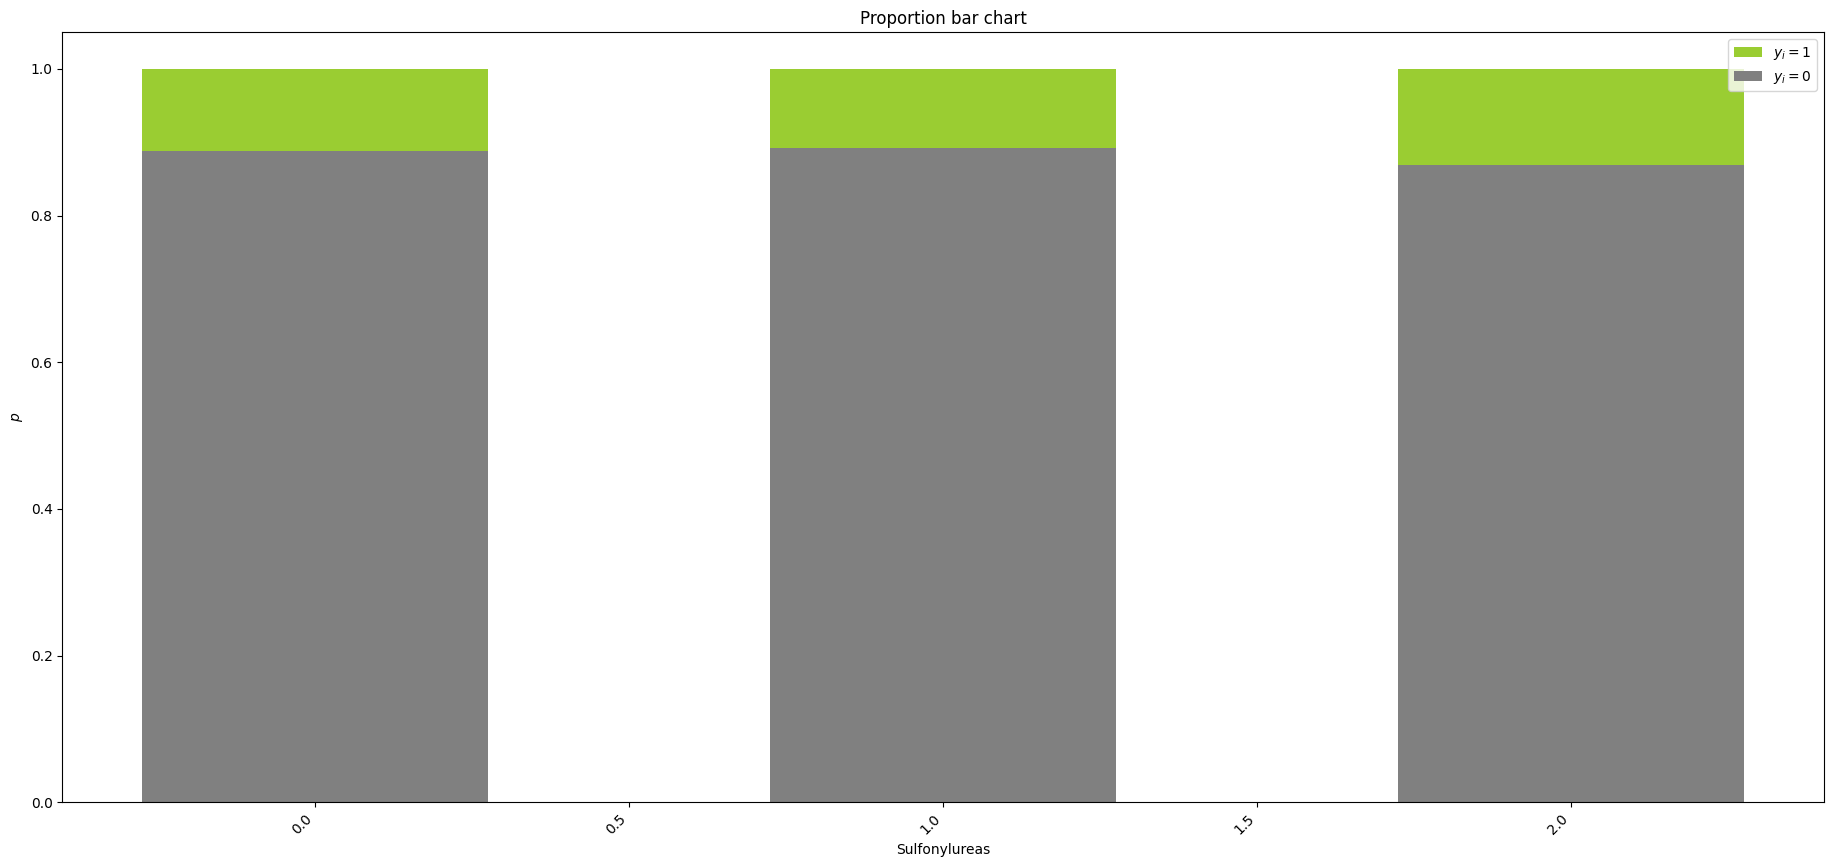

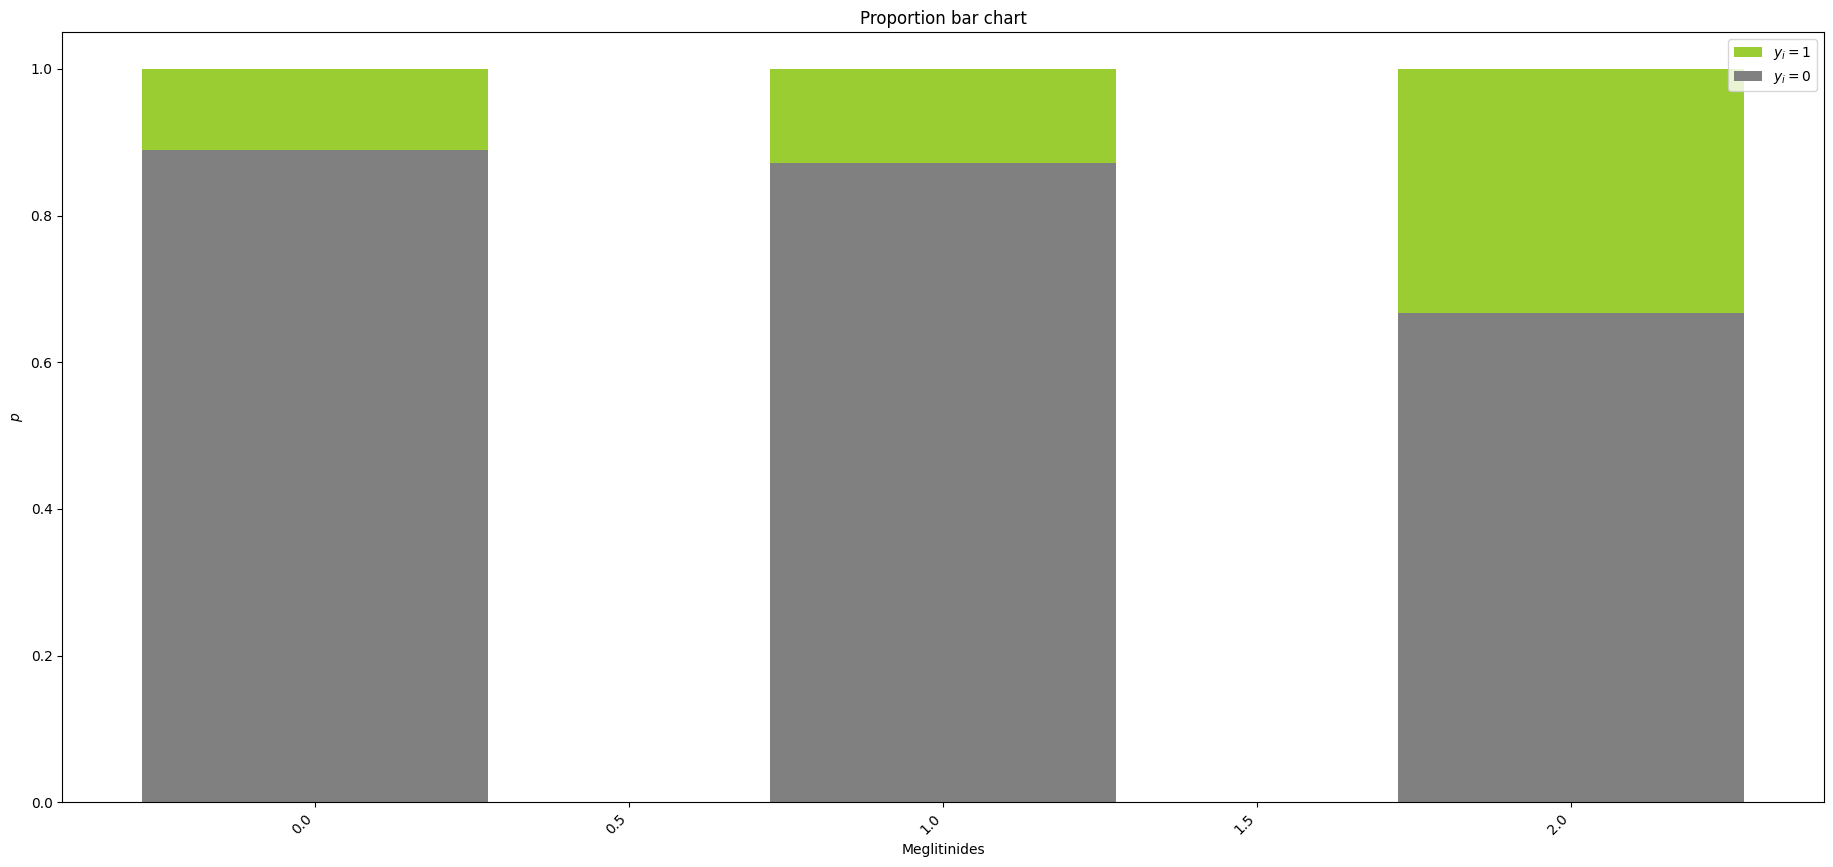

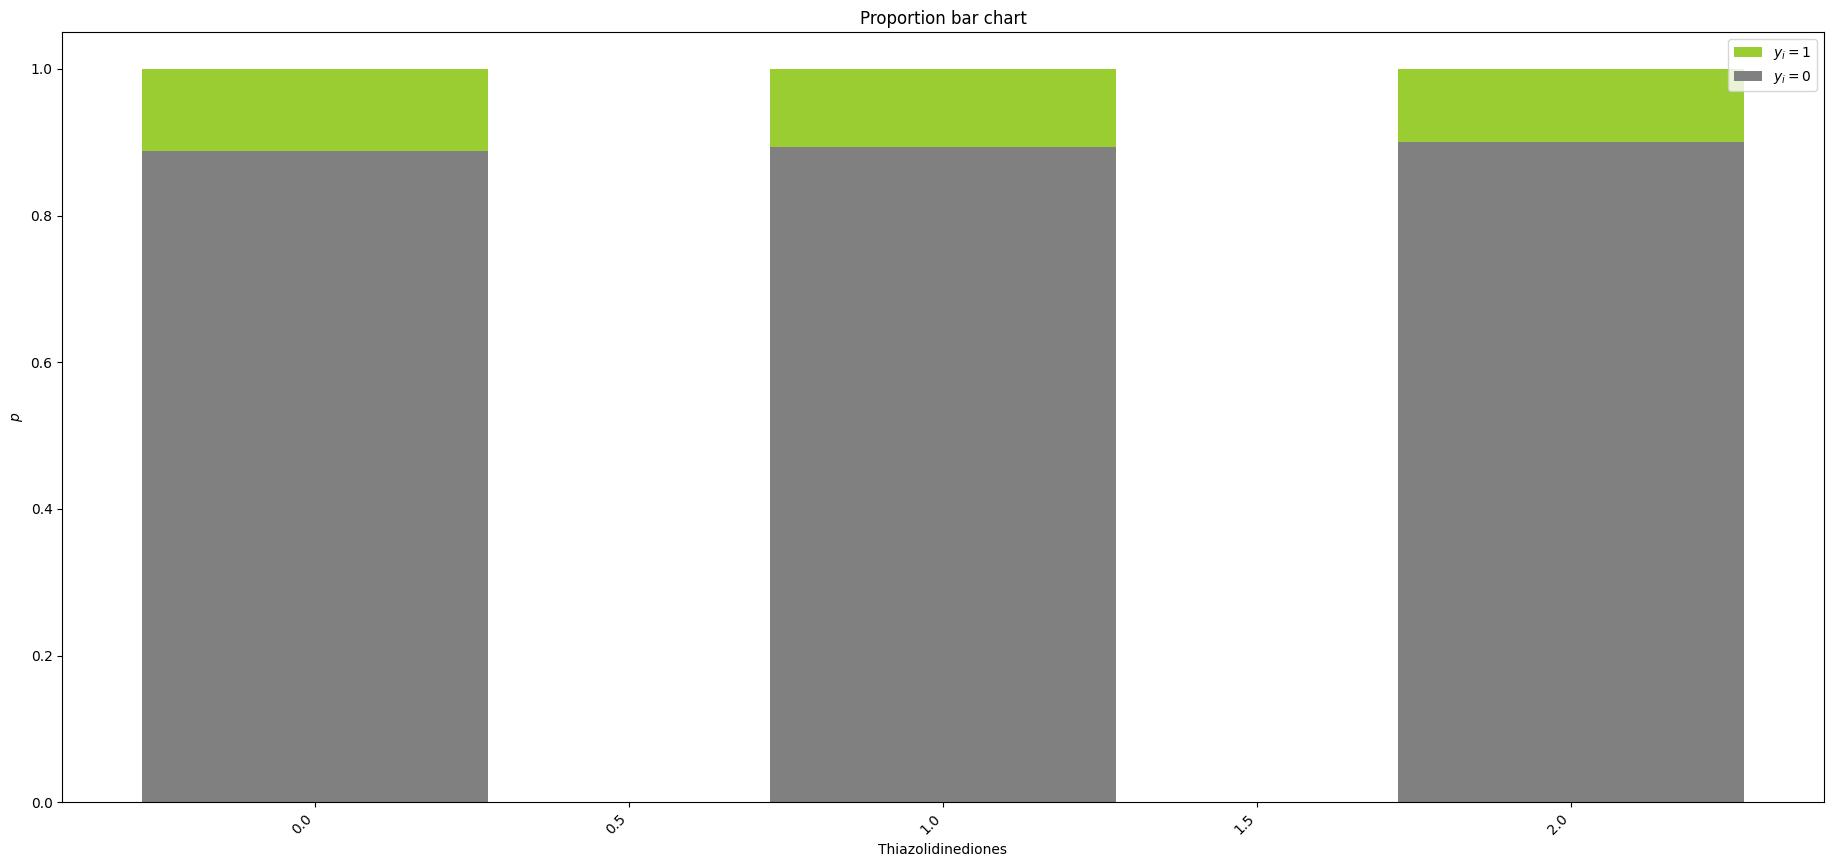

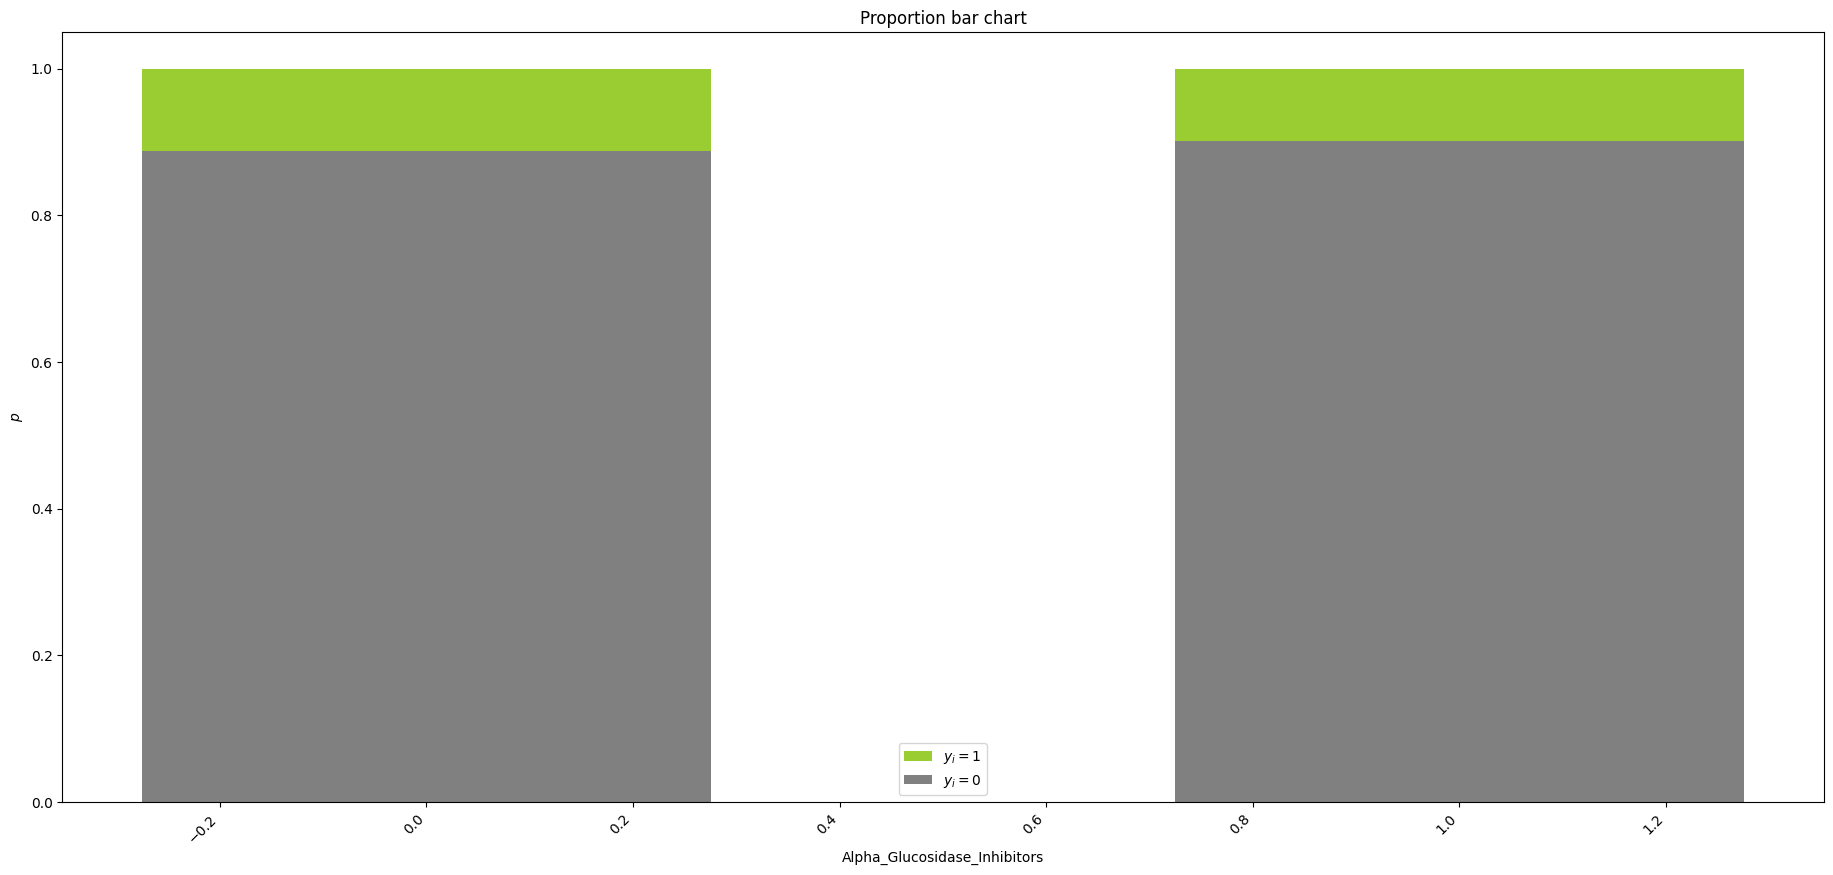

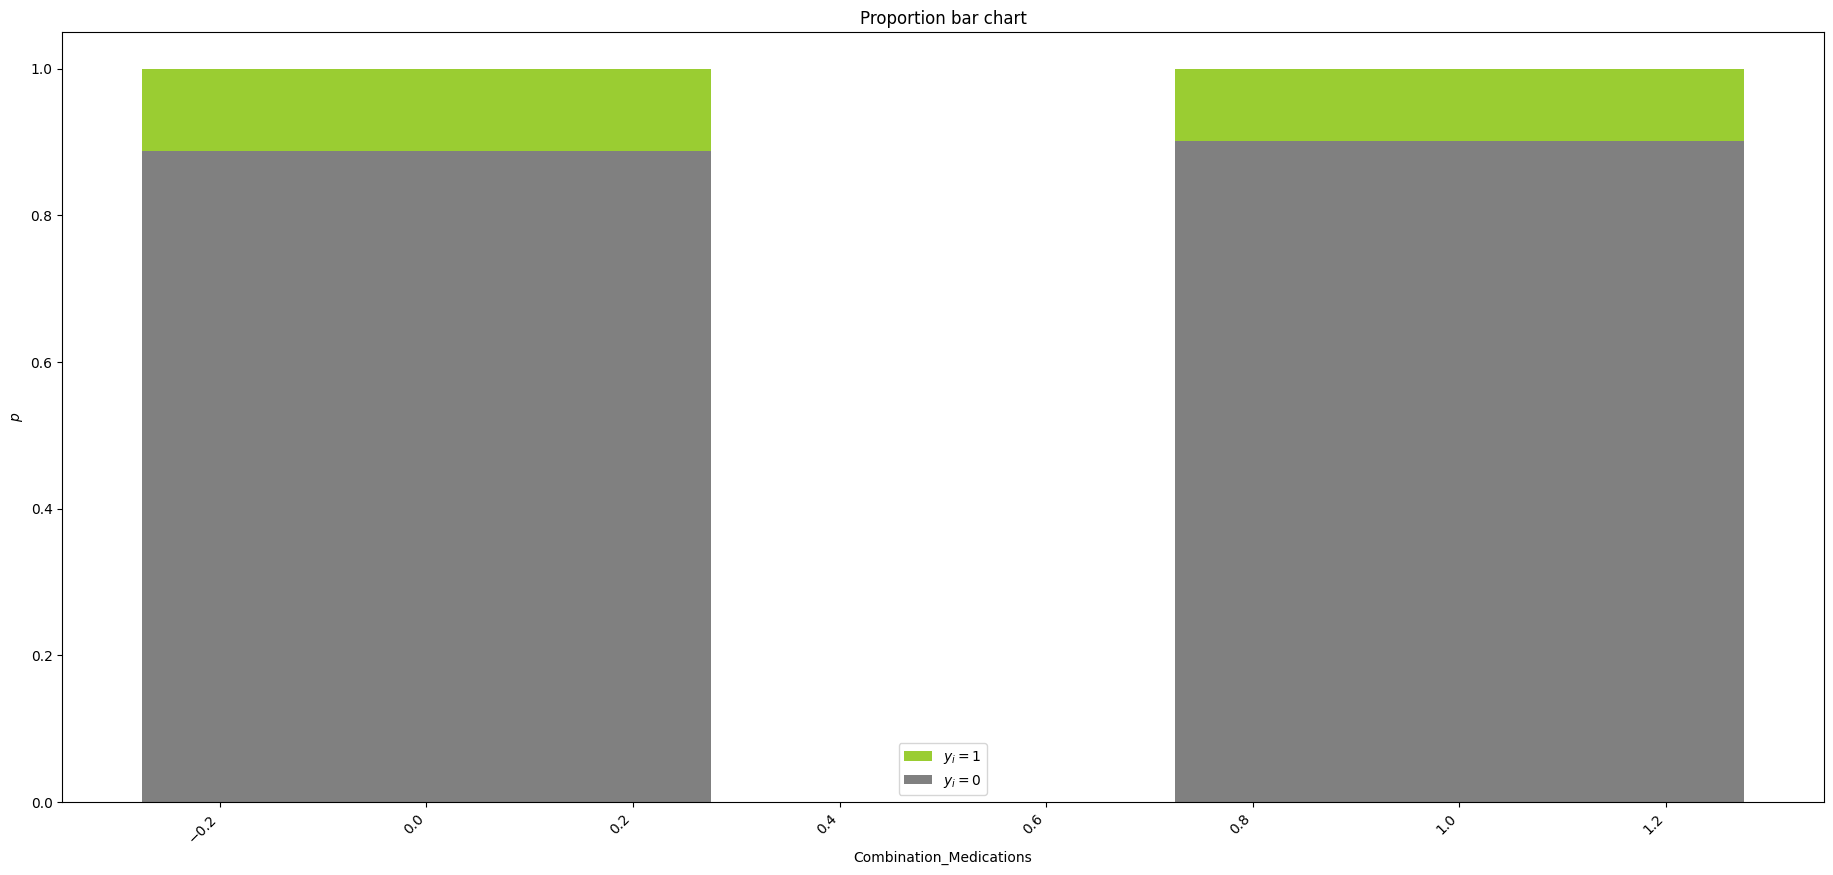

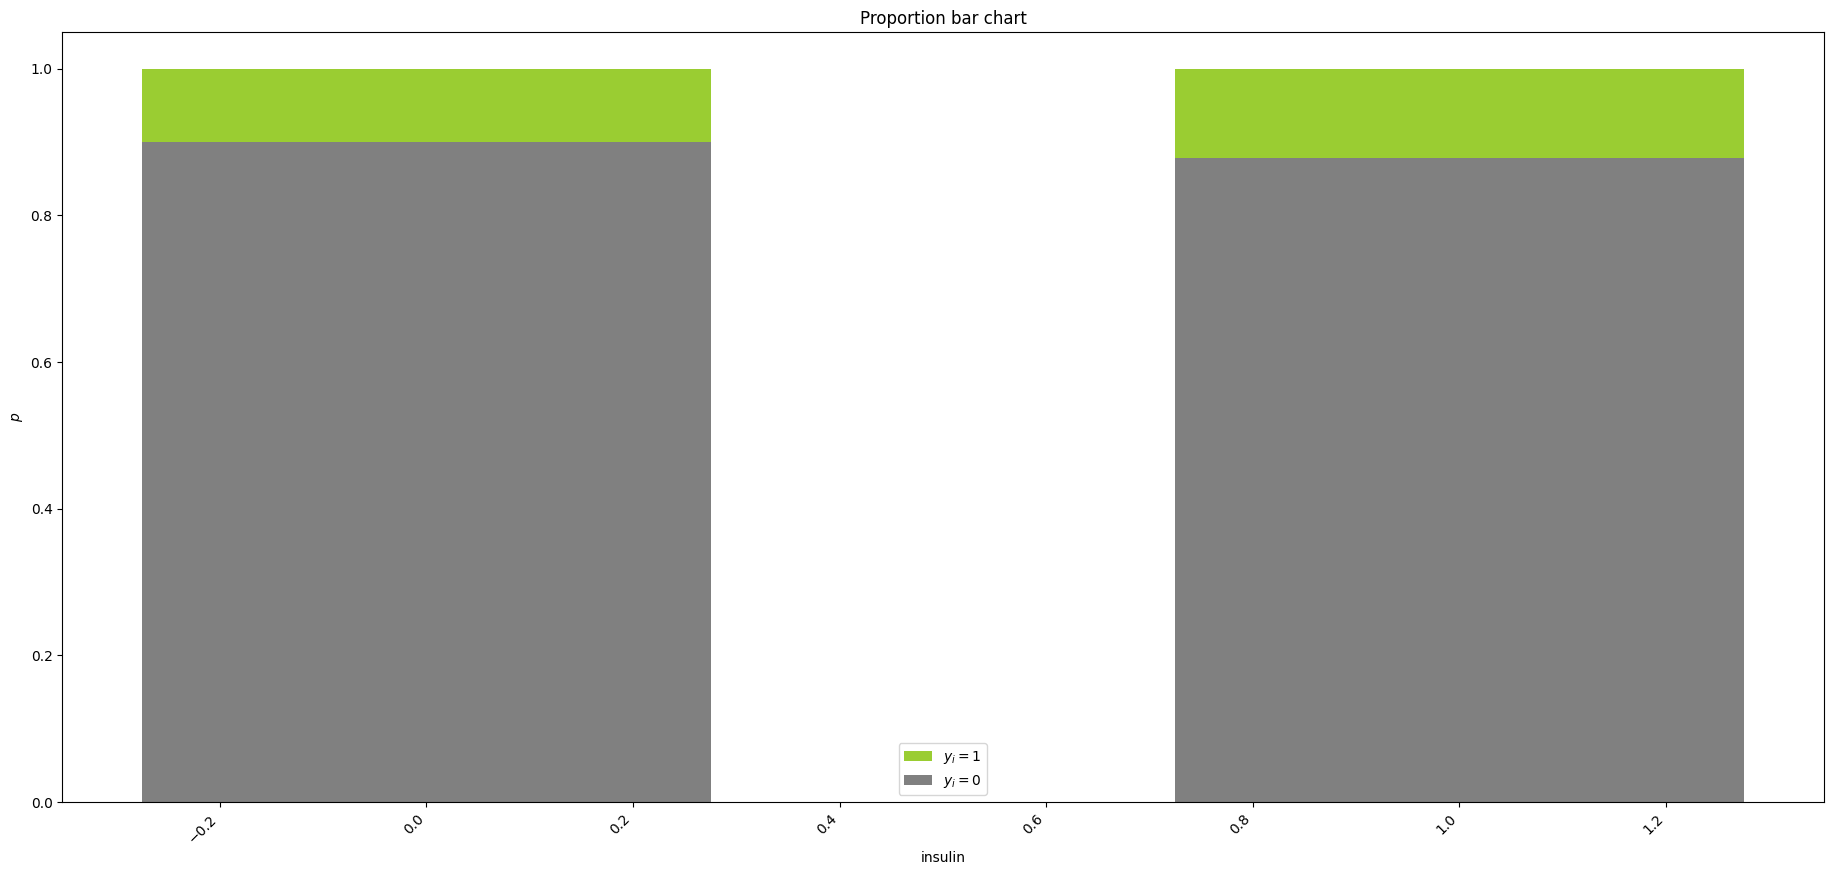

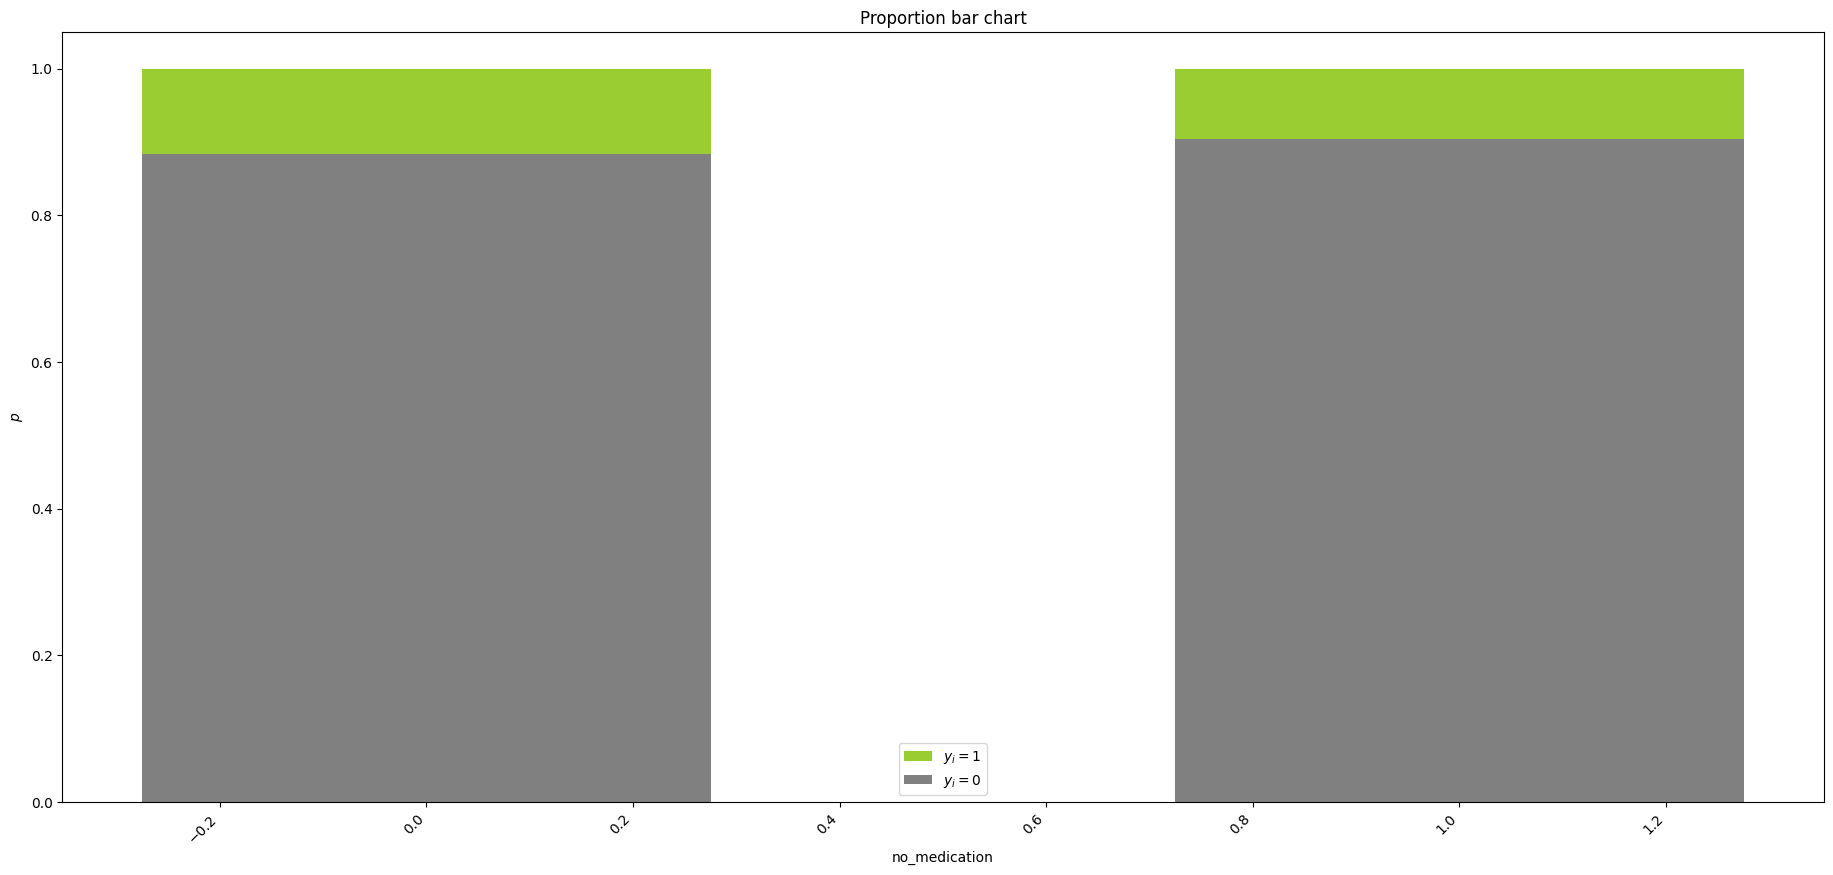

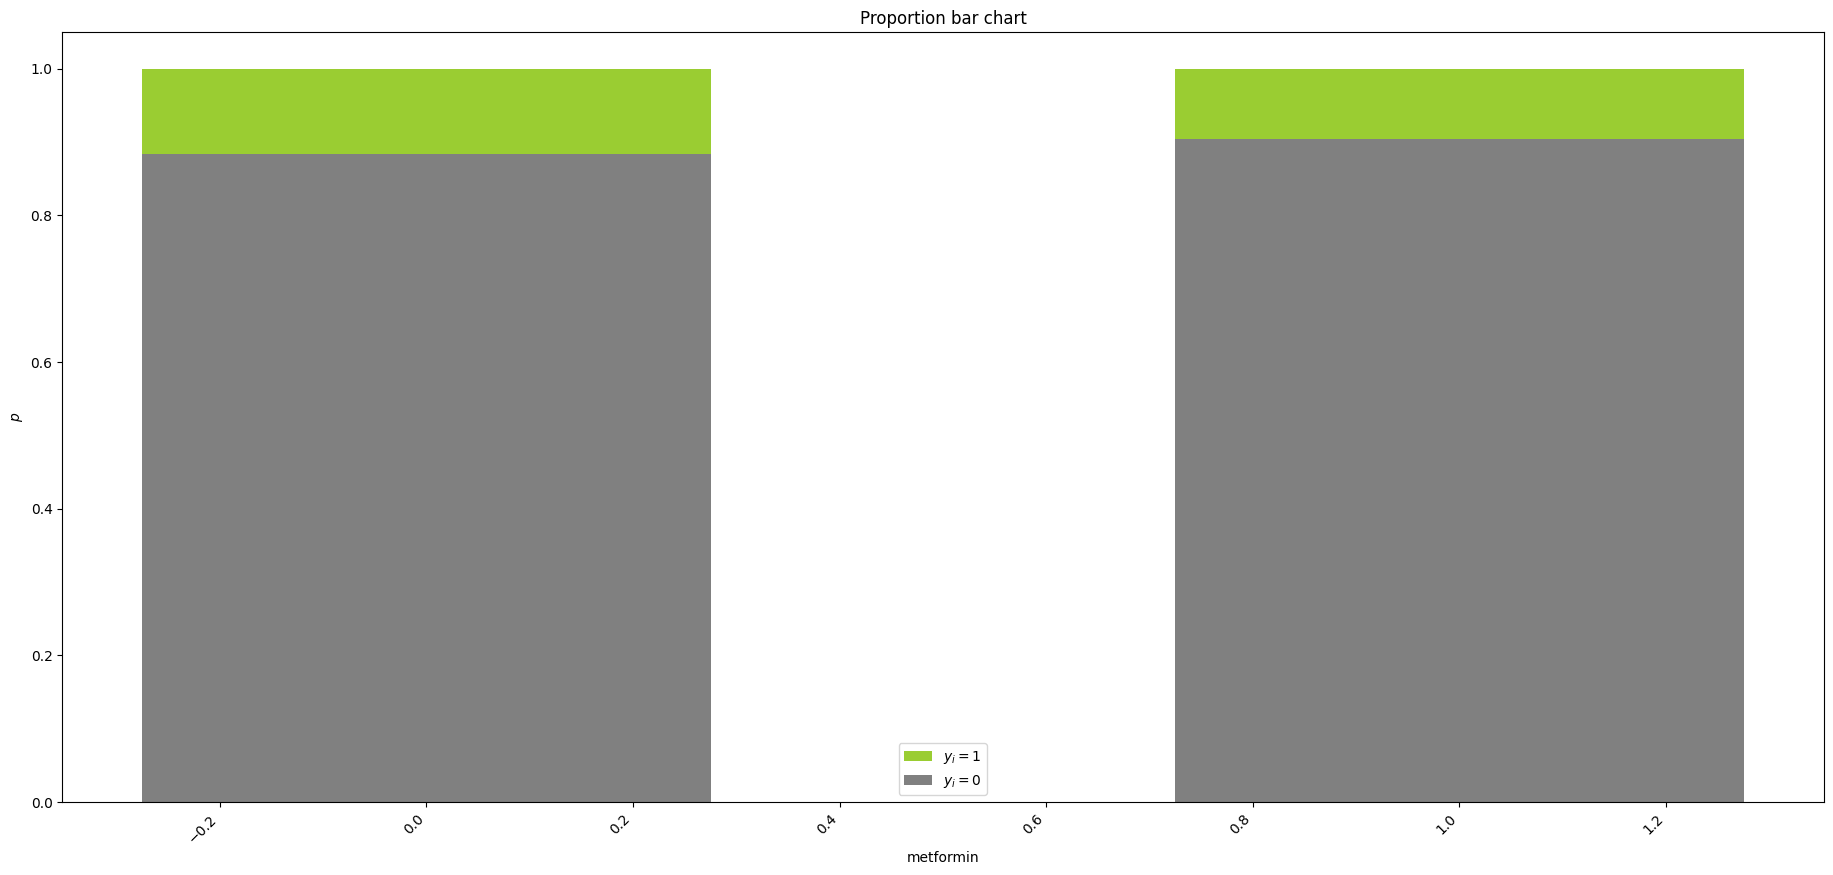

In [970]:
for col in medication_columns:
    bar_charts_categorical(train, col, "readmitted_binary")

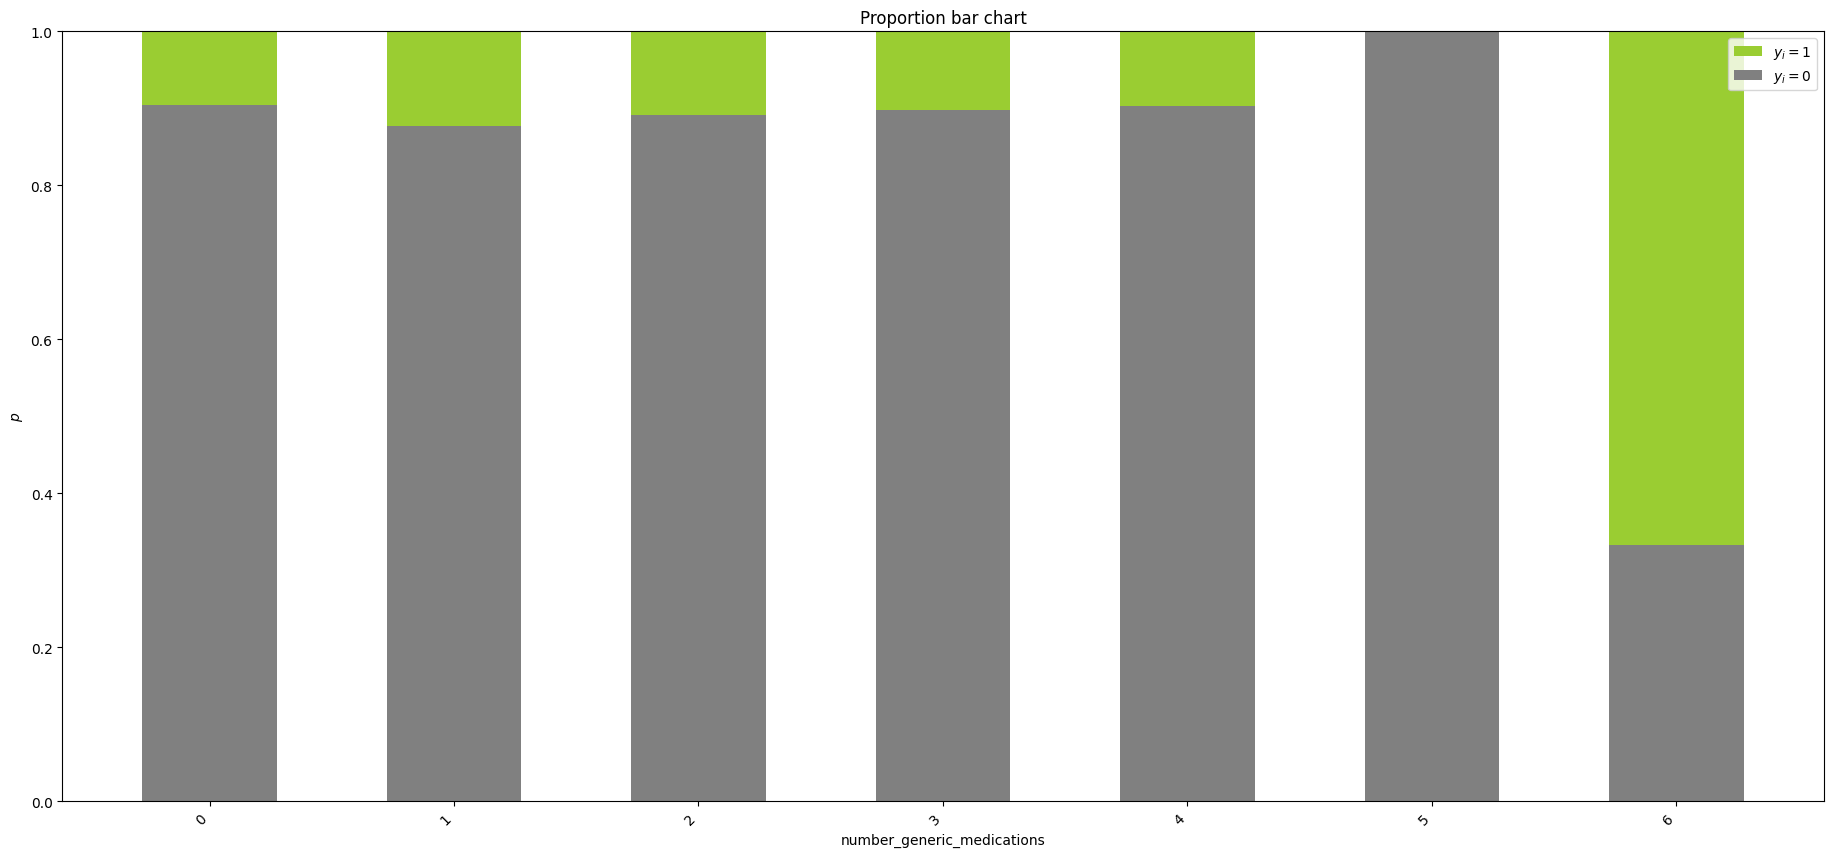

In [971]:
bar_charts_categorical(train, "number_generic_medications", "readmitted_binary")

In [972]:
# pd.set_option('display.max_colwidth', None)
train[train['number_generic_medications']==5]['medication']

encounter_id
552573    [metformin, glipizide, glyburide, pioglitazone...
123846    [metformin, repaglinide, glipizide, acarbose, ...
582550    [metformin, glimepiride, glyburide, rosiglitaz...
779718    [metformin, glimepiride, glipizide, pioglitazo...
933380    [metformin, repaglinide, glipizide, pioglitazo...
447982    [metformin, glyburide, pioglitazone, insulin, ...
692561    [metformin, glimepiride, glipizide, pioglitazo...
589216    [metformin, repaglinide, glimepiride, rosiglit...
999052    [metformin, glimepiride, glyburide, pioglitazo...
451372    [metformin, repaglinide, glimepiride, pioglita...
997560    [metformin, glimepiride, glyburide, pioglitazo...
994513    [metformin, glipizide, glyburide, pioglitazone...
162953    [metformin, glimepiride, glipizide, glyburide,...
531851    [metformin, glipizide, pioglitazone, rosiglita...
448305    [metformin, glipizide, glyburide, rosiglitazon...
456910    [metformin, glimepiride, glyburide, rosiglitaz...
607305    [metformin, glipi

In [973]:
# pd.set_option('display.max_colwidth', None)
test[test['number_generic_medications']==5]['medication']

encounter_id
990126    [metformin, glipizide, pioglitazone, rosiglita...
252924    [metformin, nateglinide, glimepiride, glipizid...
707897    [metformin, repaglinide, glyburide, pioglitazo...
915560    [metformin, glipizide, glyburide, rosiglitazon...
353917    [metformin, glimepiride, pioglitazone, acarbos...
965253    [metformin, nateglinide, glipizide, pioglitazo...
763262    [metformin, glipizide, glyburide, pioglitazone...
658521    [metformin, repaglinide, glipizide, pioglitazo...
821858    [metformin, glyburide, pioglitazone, rosiglita...
410586    [metformin, repaglinide, glipizide, rosiglitaz...
954243    [metformin, glimepiride, glipizide, rosiglitaz...
319387    [metformin, glipizide, glyburide, rosiglitazon...
991505    [metformin, repaglinide, rosiglitazone, acarbo...
760667    [metformin, glimepiride, rosiglitazone, miglit...
440154    [metformin, glipizide, glyburide, rosiglitazon...
413789    [metformin, glyburide, pioglitazone, acarbose,...
182499    [metformin, glime

In [974]:
# pd.set_option('display.max_colwidth', None)
train[train['number_generic_medications']==6][['medication','readmitted_binary']]

,medication,readmitted_binary
encounter_id,,
308794,"[metformin, nateglinide, glipizide, rosiglitaz...",Yes
837132,"[metformin, nateglinide, glipizide, glyburide,...",Yes
890037,"[metformin, glimepiride, glipizide, pioglitazo...",No


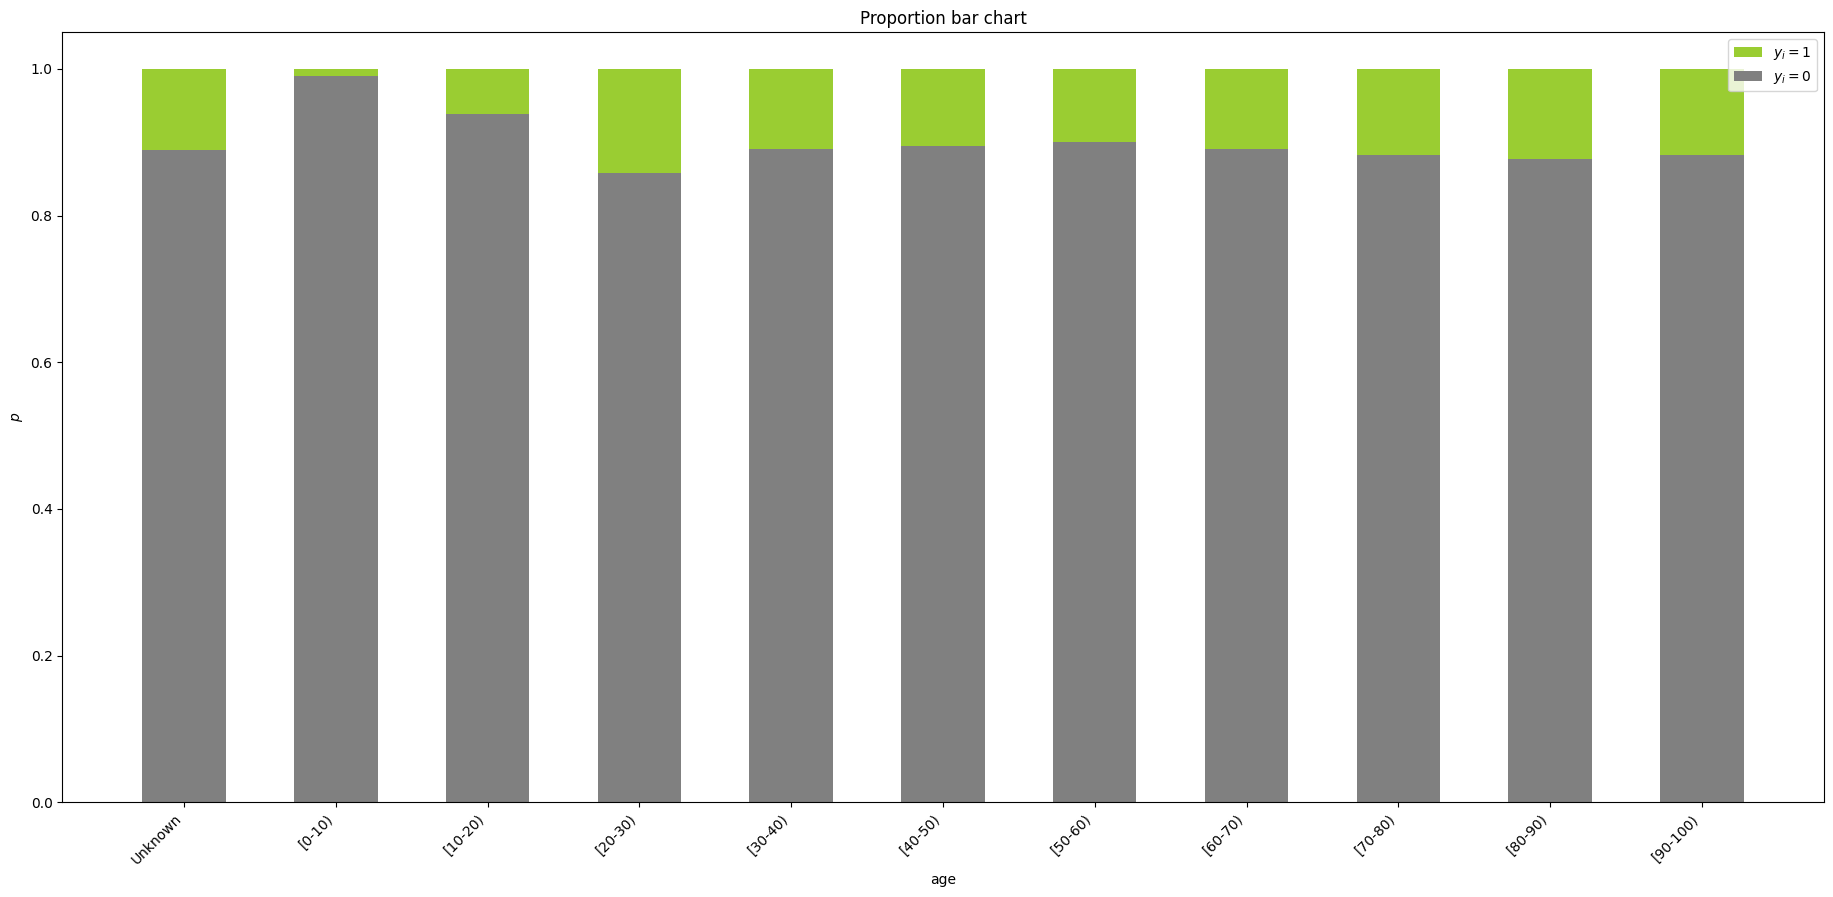

In [975]:
bar_charts_categorical(train, "age", "readmitted_binary")

In [976]:
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')


df['Midpoint_Age'] = average_age = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                       (df['Lower_Age'] + df['Upper_Age']) / 2,
                       np.nan)
train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)

In [977]:
data = test['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')

# Calculate the midpoint age
df['Midpoint_Age'] = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                              (df['Lower_Age'] + df['Upper_Age']) / 2,
                              np.nan)
test['Midpoint_Age'] = df['Midpoint_Age']
test.drop('age', axis=1, inplace=True)

In [978]:
train['Midpoint_Age'].fillna('Unknown', inplace=True)

In [979]:
test['Midpoint_Age'].fillna('Unknown', inplace=True)

In [980]:
train[train['Midpoint_Age']=='Unknown'].shape[0]

3557

In [981]:
test[test['Midpoint_Age']=='Unknown'].shape[0]

1531

In [982]:
def fill_age(df):
    for i, row in df.iterrows():
        if row['Midpoint_Age'] == 'Unknown':
            # Check if there are any other rows with the same 'person_id' and 'age' not equal to 'Unknown'
            other_rows = df[(df['patient_id'] == row['patient_id']) & (df['Midpoint_Age'] != 'Unknown')]
            if not other_rows.empty:
                # If such a row is found, replace the 'age' of the current row with the 'age' of the found row
                df.at[i, 'Midpoint_Age'] = other_rows.iloc[0]['Midpoint_Age']
    return df

fill_age(train)

,patient_id,race,gender,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,...,number_generic_medications,insulin,metformin,no_medication,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,Midpoint_Age
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,Female,None,0,0,2,Emergency,Family/GeneralPractice,127,...,0,0,0,1,0,0,0,0,0,75.0
426224,29775006,AfricanAmerican,Male,None,0,0,0,Emergency,Unknown,128,...,1,1,0,0,0,0,0,0,0,55.0
634063,80729253,Caucasian,Female,None,0,0,1,Unknown,Family/GeneralPractice,94,...,2,1,0,0,0,0,0,0,0,65.0
890610,2919042,AfricanAmerican,Male,MC,0,0,1,Emergency,InternalMedicine,81,...,0,0,0,1,0,0,0,0,0,65.0
654194,84871971,Caucasian,Female,HM,1,0,0,Elective,Unknown,126,...,0,0,0,1,0,0,0,0,0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,AfricanAmerican,Female,MC,0,1,0,Elective,InternalMedicine,90,...,3,1,1,0,1,0,0,0,0,85.0
826429,4663818,AfricanAmerican,Female,None,0,0,0,Urgent,Unknown,98,...,2,0,1,0,1,0,0,0,0,75.0
332030,23397147,Caucasian,Female,None,0,2,2,Unknown,Unknown,137,...,2,1,0,0,1,0,0,0,0,65.0


In [983]:
fill_age(test)

,patient_id,race,gender,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,...,number_generic_medications,insulin,metformin,no_medication,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,Midpoint_Age
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,103232799,Caucasian,Male,HM,0,0,0,Emergency,Unknown,139,...,1,0,1,0,0,0,0,0,0,85.0
447319,93395304,Caucasian,Male,HM,0,0,1,Emergency,Unknown,103,...,0,0,0,1,0,0,0,0,0,25.0
309126,6281586,AfricanAmerican,Male,None,0,0,0,Emergency,Pulmonology,99,...,1,1,0,0,0,0,0,0,0,35.0
181183,67381308,Caucasian,Male,BC,0,0,0,Not Available,Unknown,136,...,3,1,1,0,1,0,0,0,0,55.0
359339,71670204,Caucasian,Male,None,0,0,0,Emergency,InternalMedicine,137,...,1,0,1,0,0,0,0,0,0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,85707450,Caucasian,Male,HM,0,0,0,Emergency,Unknown,133,...,0,0,0,1,0,0,0,0,0,75.0
549298,328887,Caucasian,Male,None,0,0,4,Emergency,Family/GeneralPractice,62,...,1,1,0,0,0,0,0,0,0,65.0
327586,21915459,Caucasian,Female,None,0,0,0,Emergency,Nephrology,121,...,1,1,0,0,0,0,0,0,0,85.0


In [984]:
train[train['Midpoint_Age']=='Unknown'].shape[0]

2217

In [985]:
test[test['Midpoint_Age']=='Unknown'].shape[0]

1194

In [986]:
train['gender'].value_counts()

gender
Female             38228
Male               33005
Unknown/Invalid        3
Name: count, dtype: int64

In [987]:
train[train['gender'] == 'Unknown/Invalid']

,patient_id,race,gender,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,...,number_generic_medications,insulin,metformin,no_medication,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,Midpoint_Age
encounter_id,,,,,,,,,,,,,,,,,,,,,
208080,78119847,Unknown,Unknown/Invalid,CP,0,0,0,Emergency,Unknown,111,...,2,0,1,0,0,0,1,0,0,75.0
978787,60524946,Unknown,Unknown/Invalid,CP,0,0,0,Emergency,Unknown,87,...,0,0,0,1,0,0,0,0,0,65.0
876217,100695042,Other,Unknown/Invalid,None,0,0,0,Elective,Cardiology,114,...,2,0,0,0,1,0,1,0,0,75.0


In [988]:
#Female = 0 Male = 1 and the Unknown/Invalid becomes Female because it is the mode in the train
train['gender_binary'] = np.where(train['gender']== 'Male',1,0)
train.drop('gender', axis=1, inplace=True)

In [989]:
#Female = 0 Male = 1 and the Unknown/Invalid becomes Female because it is the mode in the train
test['gender_binary'] = np.where(test['gender']== 'Male',1,0)
test.drop('gender', axis=1, inplace=True)

In [990]:
train['gender_binary'].value_counts()

gender_binary
0    38231
1    33005
Name: count, dtype: int64

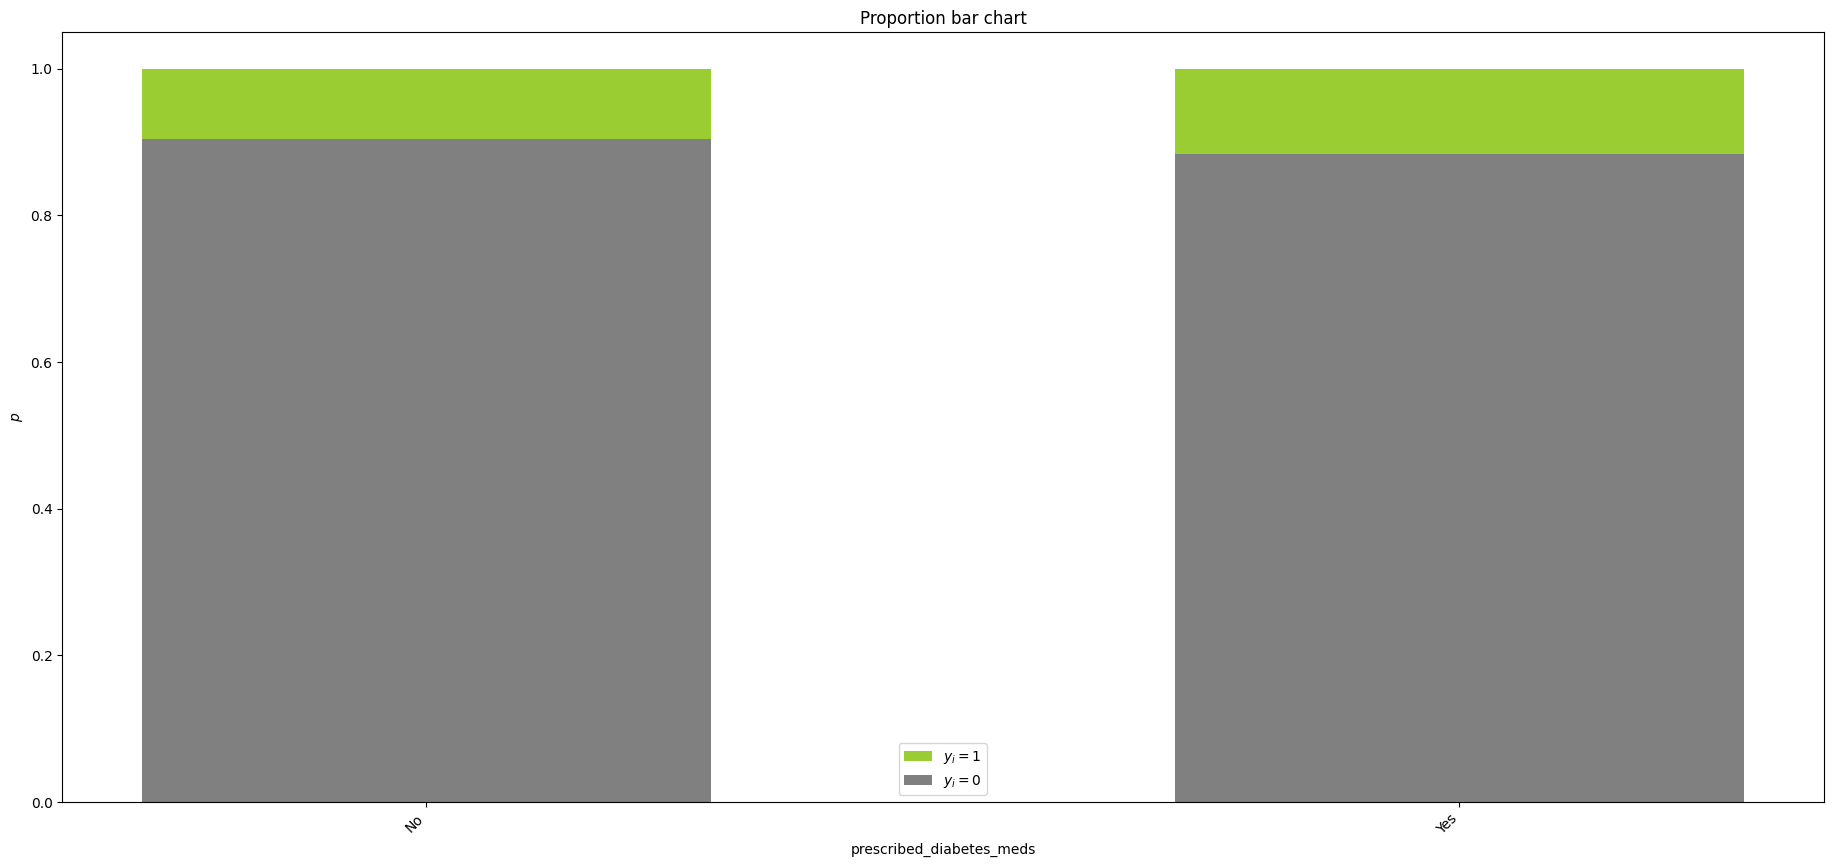

In [991]:
bar_charts_categorical(train, "prescribed_diabetes_meds", "readmitted_binary")

In [992]:
#No = 0 Yes = 1
train['presc_diabetes_meds_binary'] = np.where(train['prescribed_diabetes_meds']== 'Yes',1,0)
train.drop('prescribed_diabetes_meds', axis=1, inplace=True)

In [993]:
#No = 0 Yes = 1
test['presc_diabetes_meds_binary'] = np.where(test['prescribed_diabetes_meds']== 'Yes',1,0)
test.drop('prescribed_diabetes_meds', axis=1, inplace=True)

In [994]:
#no change = 0 change = 1
train['change_in_meds_binary'] = np.where(train['change_in_meds']== 'Ch',1,0)
train.drop('change_in_meds', axis=1, inplace=True)

In [995]:
#no change = 0 change = 1
test['change_in_meds_binary'] = np.where(test['change_in_meds']== 'Ch',1,0)
test.drop('change_in_meds', axis=1, inplace=True)

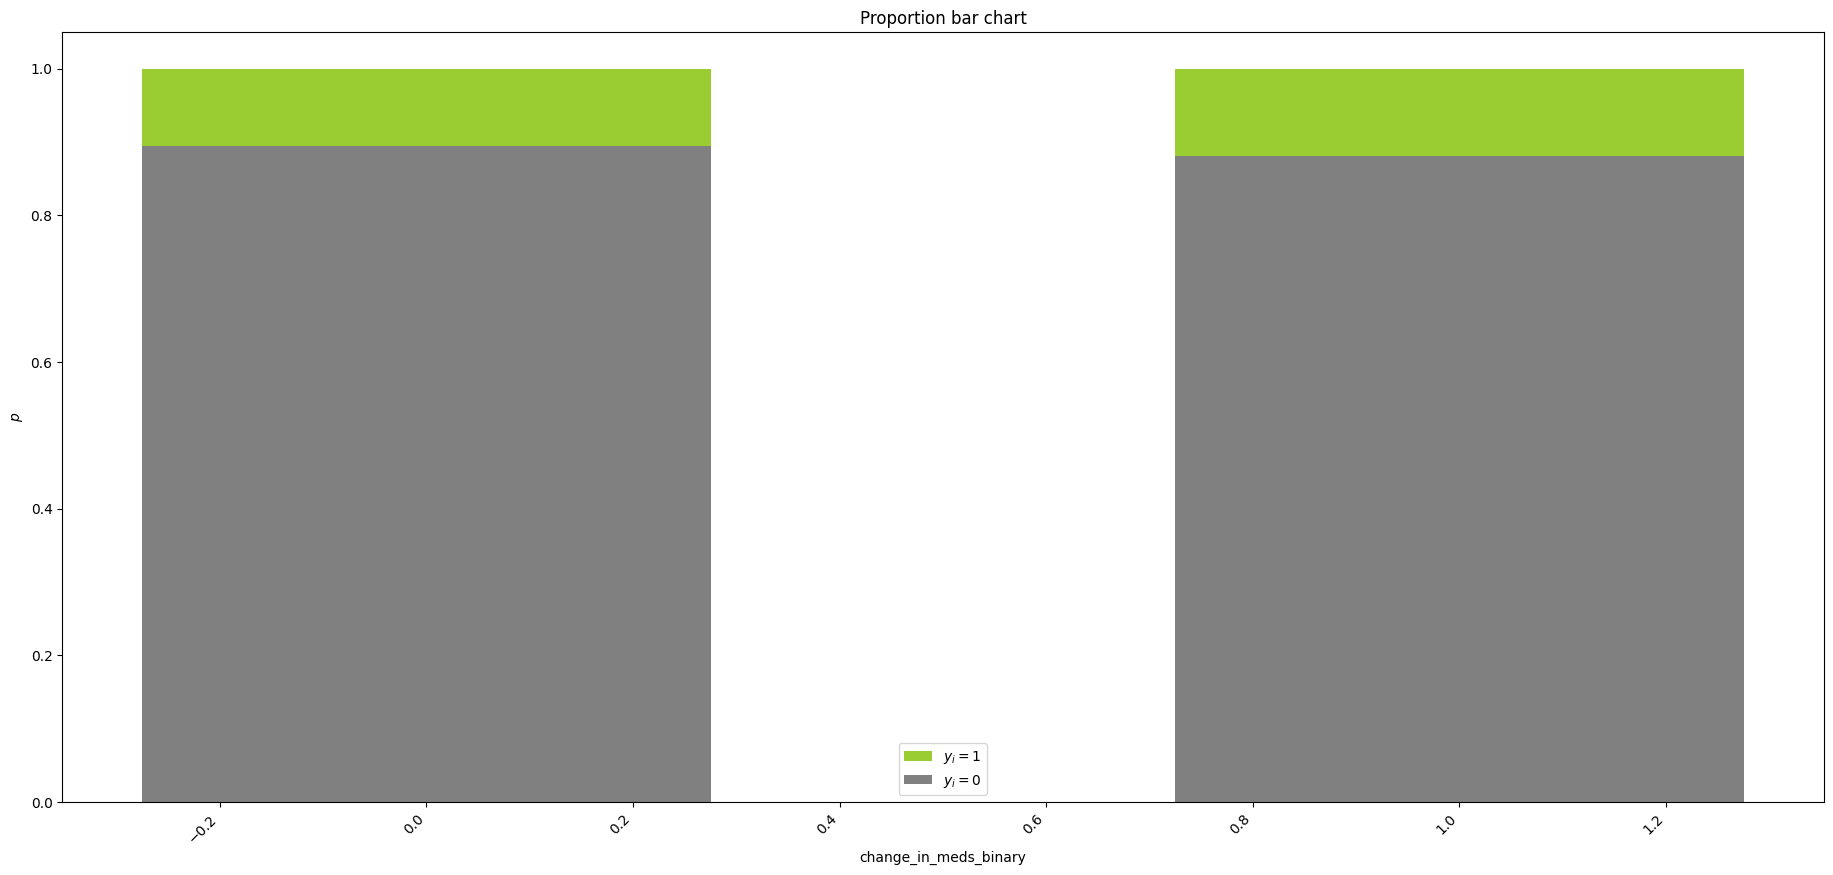

In [996]:
bar_charts_categorical(train, "change_in_meds_binary", "readmitted_binary")

In [997]:
n_categorical_columns= len(train.select_dtypes(exclude=np.number).columns)
categorical_columns = list(train.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 15 columns with categorical values:

['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'medication', 'readmitted_binary', 'readmitted_multiclass', 'Midpoint_Age']


In [998]:
n_categorical_columns= len(test.select_dtypes(exclude=np.number).columns)
categorical_columns = list(test.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 13 columns with categorical values:

['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'medication', 'Midpoint_Age']


In [999]:
train['payer_code'].value_counts()

payer_code
None    28201
MC      22683
HM       4319
SP       3541
BC       3292
MD       2484
CP       1762
UN       1733
CM       1347
OG        729
PO        405
DM        378
CH        102
WC         99
OT         61
MP         54
SI         45
FR          1
Name: count, dtype: int64

In [1000]:
value_counts = train['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.01].index

# Replacing the categories that have less than 1% of the number of rows

train['payer_code'] = train['payer_code'].replace(replace_payer_code, 'Other_code')

In [1001]:
value_counts = test['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.01].index

# Replacing the categories that have less than 1% of the number of rows

test['payer_code'] = test['payer_code'].replace(replace_payer_code, 'Other_code')

In [1002]:
train['payer_code'].value_counts(normalize=True)

payer_code
None          0.395881
MC            0.318420
HM            0.060629
SP            0.049708
BC            0.046213
MD            0.034870
CP            0.024735
UN            0.024328
CM            0.018909
Other_code    0.016073
OG            0.010234
Name: proportion, dtype: float64

In [1003]:
test['payer_code'].value_counts(normalize=True)

payer_code
None          0.394858
MC            0.319555
HM            0.064035
SP            0.048018
BC            0.044645
MD            0.034327
Other_code    0.026564
CP            0.025254
UN            0.023420
CM            0.019325
Name: proportion, dtype: float64

In [1004]:
train['Has_Insurance'] = train['payer_code'].apply(lambda x: 0 if x == 'None' else 1)

In [1005]:
test['Has_Insurance'] = test['payer_code'].apply(lambda x: 0 if x == 'None' else 1)

In [1006]:
test['Has_Insurance'].value_counts()

Has_Insurance
1    18475
0    12055
Name: count, dtype: int64

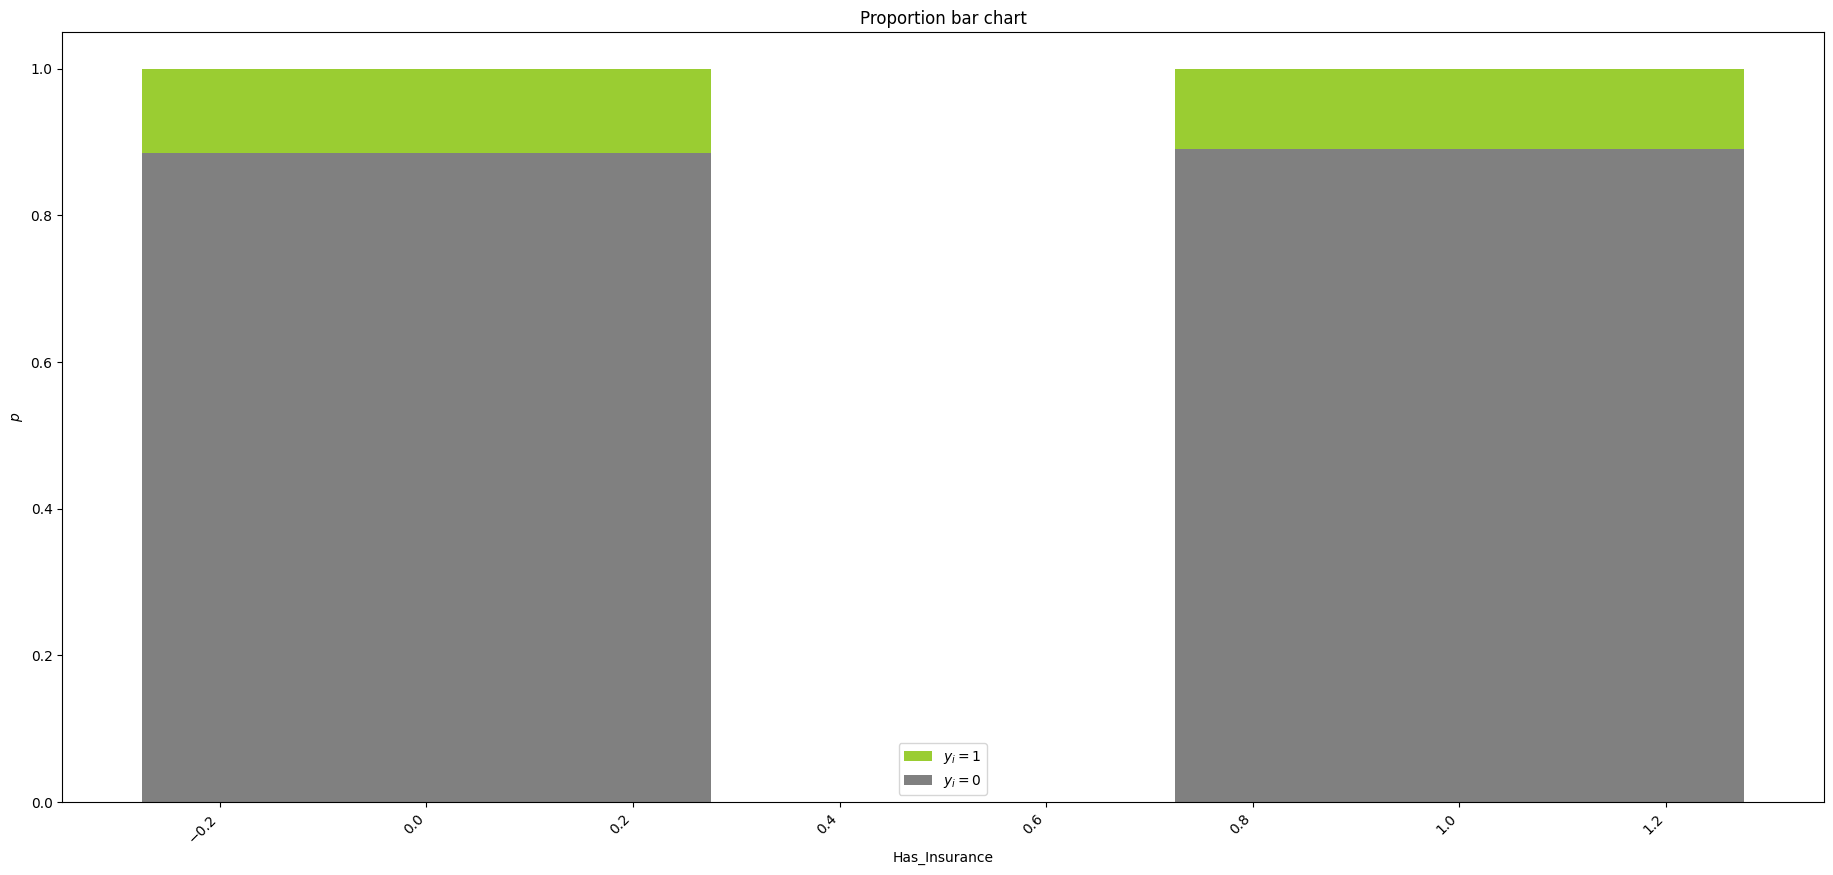

In [1007]:
bar_charts_categorical(train, "Has_Insurance", "readmitted_binary")

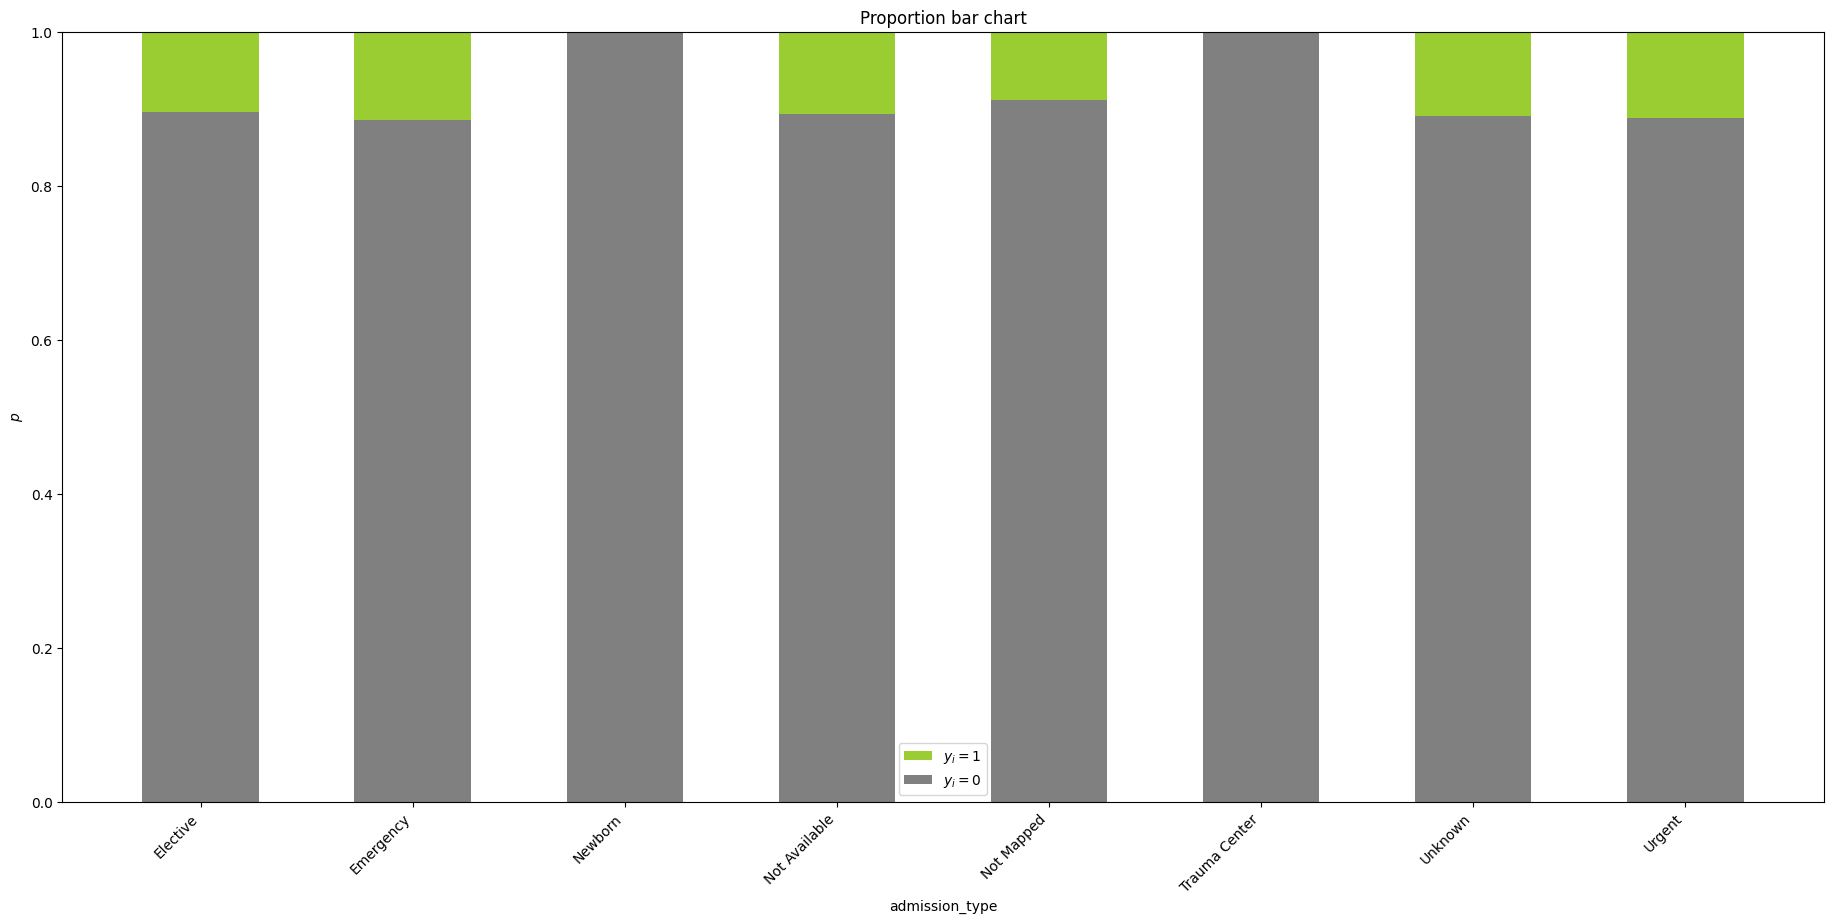

In [1008]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

In [1009]:
train["admission_type"].value_counts()

admission_type
Emergency        37742
Elective         13211
Urgent           13024
Unknown           3706
Not Available     3320
Not Mapped         214
Trauma Center       13
Newborn              6
Name: count, dtype: int64

In [1010]:
train[train["admission_type"]=='Newborn'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
268572,85.0,Newborn
531496,75.0,Newborn
129737,45.0,Newborn
394366,75.0,Newborn
203219,5.0,Newborn
792408,55.0,Newborn


In [1011]:
train[train["admission_type"]=='Trauma Center'][['Midpoint_Age',"admission_type"]]

,Midpoint_Age,admission_type
encounter_id,,
693982,55.0,Trauma Center
150293,Unknown,Trauma Center
477599,55.0,Trauma Center
764141,85.0,Trauma Center
694176,55.0,Trauma Center
658996,75.0,Trauma Center
203632,45.0,Trauma Center
444992,55.0,Trauma Center
674039,55.0,Trauma Center


In [1012]:
# We replace Unknown with Other_Type because the relation to the target is very similar, we can try to predict the unknown with
# Admission Source for example in the future (and some other columns)

train['admission_type'] = train['admission_type'].replace('Unknown', 'Other_type')
train['admission_type'] = train['admission_type'].replace('Trauma Center', 'Urgent')
train['admission_type'] = train['admission_type'].replace('Not Available', 'Other_type')
train['admission_type'] = train['admission_type'].replace('Not Mapped', 'Other_type')
train['admission_type'] = train['admission_type'].replace('Newborn', 'Other_type')
train['admission_type'] = train['admission_type'].replace({'Urgent': 'Urgent/Emergency', 'Emergency': 'Urgent/Emergency'})

train['admission_type'].value_counts(normalize=True)

admission_type
Urgent/Emergency    0.712828
Elective            0.185454
Other_type          0.101718
Name: proportion, dtype: float64

In [1013]:
# We replace Unknown with Other_Type because the relation to the target is very similar, we can try to predict the unknown with
# Admission Source for example in the future (and some other columns)

test['admission_type'] = test['admission_type'].replace('Unknown', 'Other_type')
test['admission_type'] = test['admission_type'].replace('Trauma Center', 'Urgent')
test['admission_type'] = test['admission_type'].replace('Not Available', 'Other_type')
test['admission_type'] = test['admission_type'].replace('Not Mapped', 'Other_type')
test['admission_type'] = test['admission_type'].replace('Newborn', 'Other_type')
test['admission_type'] = test['admission_type'].replace({'Urgent': 'Urgent/Emergency', 'Emergency': 'Urgent/Emergency'})

test['admission_type'].value_counts(normalize=True)

admission_type
Urgent/Emergency    0.711169
Elective            0.185326
Other_type          0.103505
Name: proportion, dtype: float64

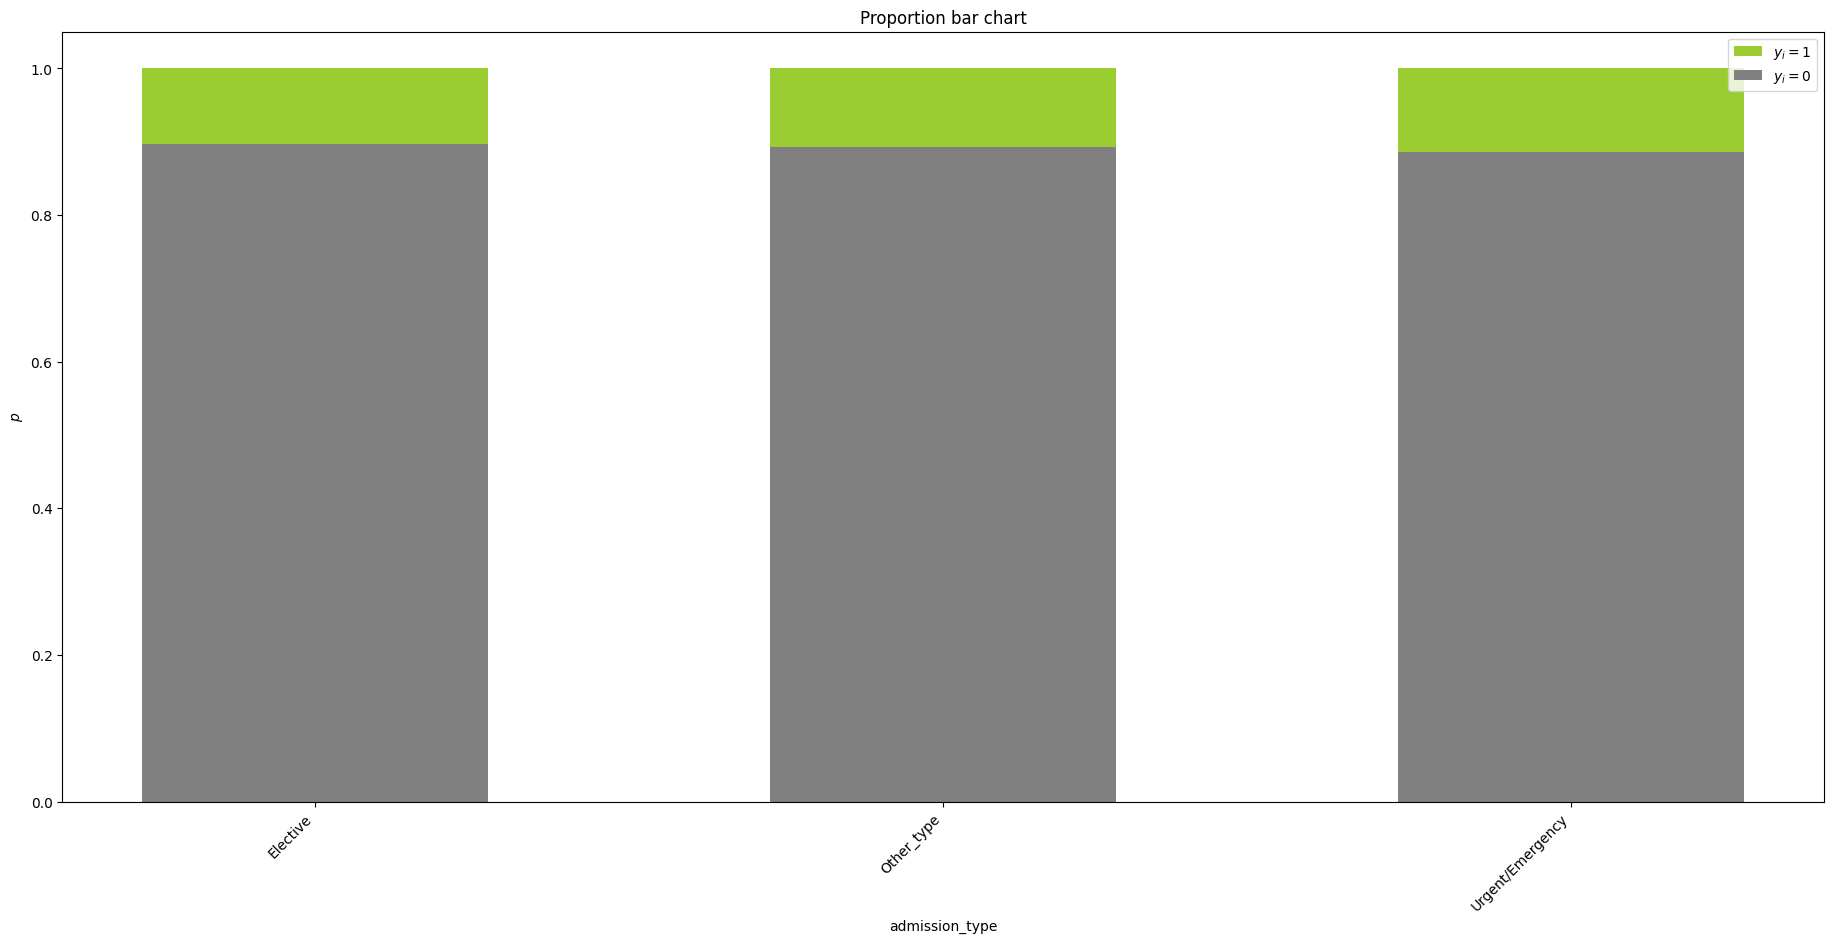

In [1014]:
bar_charts_categorical(train, "admission_type", "readmitted_binary")

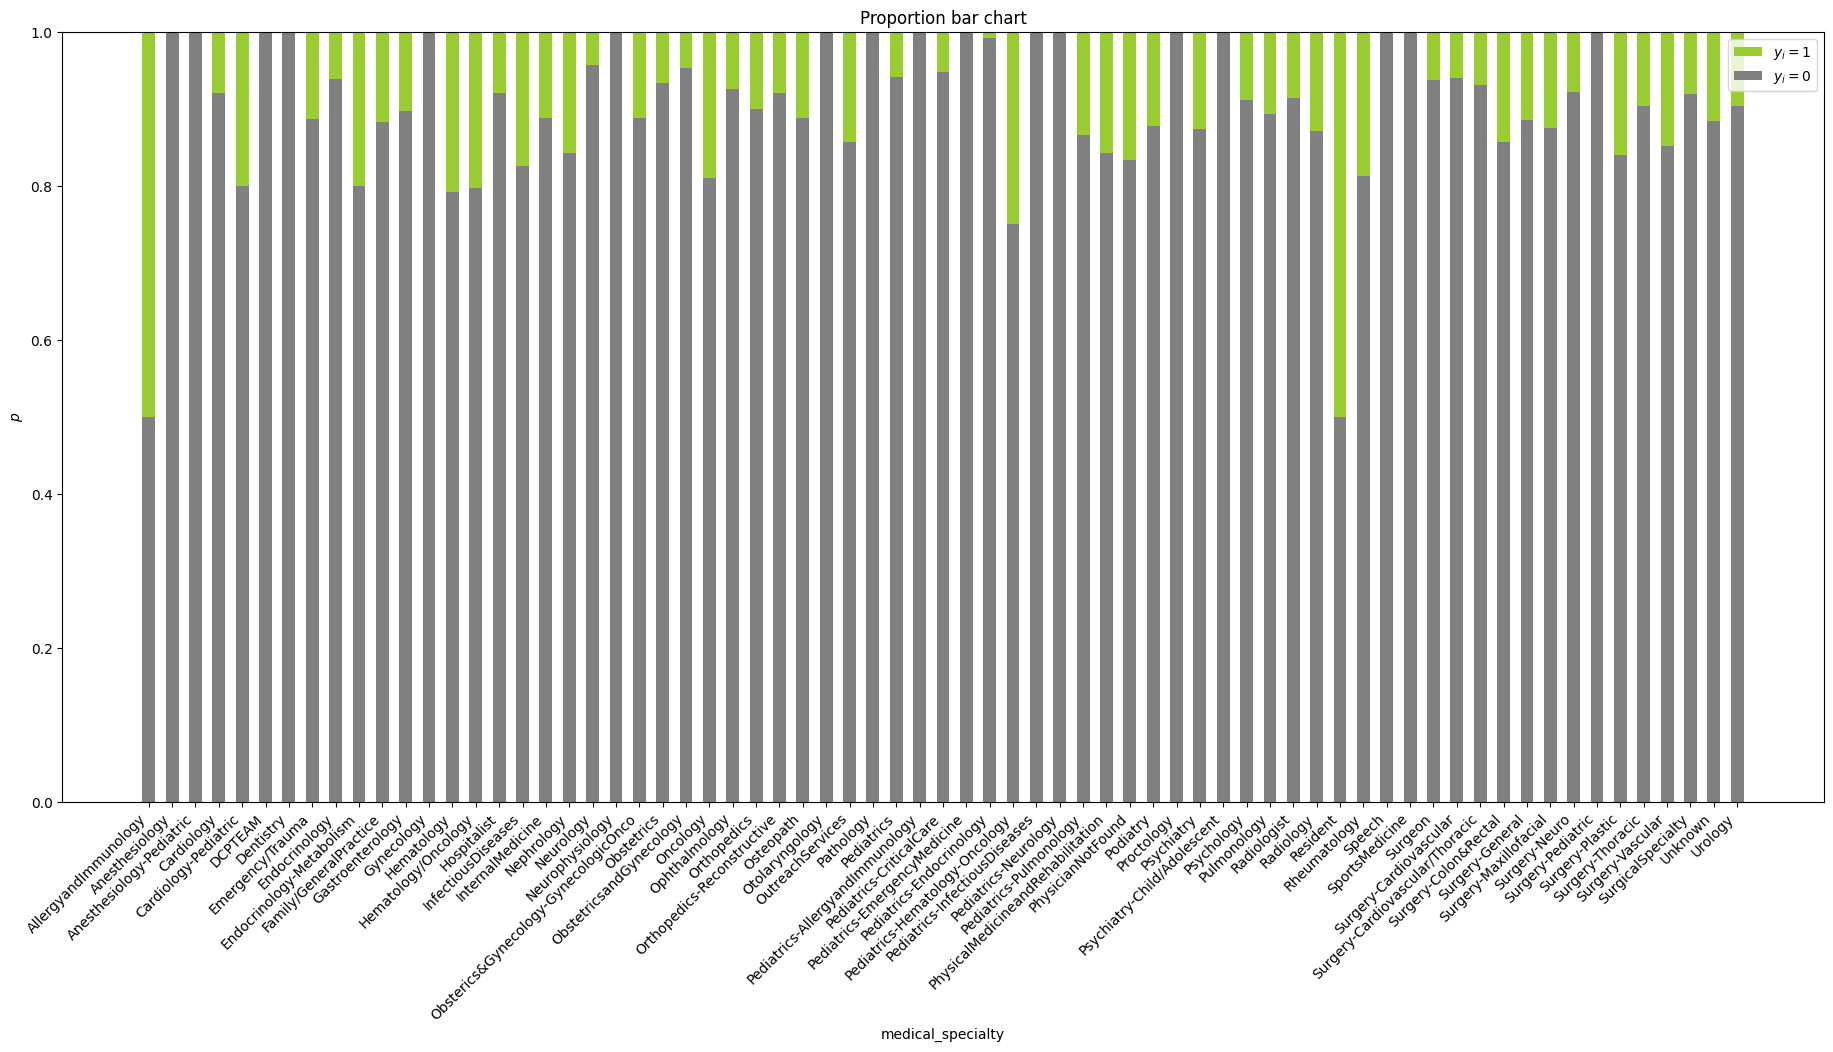

In [1015]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

In [1016]:
surgery = train[train['medical_specialty'].str.contains('Surgery|Surgeon|Reconstructive')]
train.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = train[train['medical_specialty'].str.contains('Pediatrics|Pediatric')]
train.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.490230
InternalMedicine                        0.144478
Emergency/Trauma                        0.074667
Family/GeneralPractice                  0.073235
Surgery                                 0.061556
Cardiology                              0.052165
Nephrology                              0.015947
Orthopedics                             0.013392
Radiologist                             0.011469
Pulmonology                             0.008577
Psychiatry                              0.008395
Urology                                 0.006710
ObstetricsandGynecology                 0.006570
Pediatric                               0.005784
Gastroenterology                        0.005573
PhysicalMedicineandRehabilitation       0.003931
Oncology                                0.003411
Hematology/Oncology                     0.002148
Neurology                               0.001937
Otolaryngology                          0.001207
En

In [1017]:
surgery = test[test['medical_specialty'].str.contains('Surgery|Surgeon|Reconstructive')]
test.loc[surgery.index, 'medical_specialty'] = 'Surgery'

pediatric = test[test['medical_specialty'].str.contains('Pediatrics|Pediatric')]
test.loc[pediatric.index, 'medical_specialty'] = 'Pediatric'

test['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                                 0.492204
InternalMedicine                        0.142254
Emergency/Trauma                        0.073567
Family/GeneralPractice                  0.072814
Surgery                                 0.063020
Cardiology                              0.053587
Nephrology                              0.015624
Orthopedics                             0.014609
Radiologist                             0.010580
Pulmonology                             0.008516
Psychiatry                              0.008385
Urology                                 0.006780
ObstetricsandGynecology                 0.006649
Gastroenterology                        0.005470
Pediatric                               0.005241
PhysicalMedicineandRehabilitation       0.003636
Oncology                                0.003439
Neurology                               0.002129
Hematology/Oncology                     0.001769
Endocrinology                           0.001277
Ot

In [1018]:
internal_medicine_categories = ['InternalMedicine', 'Endocrinology', 'Endocrinology-Metabolism', 'InfectiousDiseases', 
                            'Gastroenterology', 'Nephrology', 'Pulmonology', 'Rheumatology']
train['medical_specialty'] = train['medical_specialty'].replace(internal_medicine_categories, 'InternalMedicine')

surgery_categories = ['Surgery', 'Orthopedics', 'Otolaryngology', 'Podiatry', 'SurgicalSpecialty']
train['medical_specialty'] = train['medical_specialty'].replace(surgery_categories, 'Surgery')

value_counts = train['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index
train['medical_specialty'] = train['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                   0.490230
InternalMedicine          0.176329
Surgery                   0.077545
Emergency/Trauma          0.074667
Family/GeneralPractice    0.073235
Other_specialty           0.055829
Cardiology                0.052165
Name: proportion, dtype: float64

In [1019]:
internal_medicine_categories = ['InternalMedicine', 'Endocrinology', 'Endocrinology-Metabolism', 'InfectiousDiseases', 
                            'Gastroenterology', 'Nephrology', 'Pulmonology', 'Rheumatology']
test['medical_specialty'] = test['medical_specialty'].replace(internal_medicine_categories, 'InternalMedicine')

surgery_categories = ['Surgery', 'Orthopedics', 'Otolaryngology', 'Podiatry', 'SurgicalSpecialty']
test['medical_specialty'] = test['medical_specialty'].replace(surgery_categories, 'Surgery')

value_counts = test['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index
test['medical_specialty'] = test['medical_specialty'].replace(replace_medical_specialty, 'Other_specialty')

test['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                   0.492204
InternalMedicine          0.173731
Surgery                   0.080020
Emergency/Trauma          0.073567
Family/GeneralPractice    0.072814
Other_specialty           0.054078
Cardiology                0.053587
Name: proportion, dtype: float64

In [1020]:
train['medical_specialty'] = train['medical_specialty'].str.strip().str.replace('/', '_')

In [1021]:
test['medical_specialty'] = test['medical_specialty'].str.strip().str.replace('/', '_')

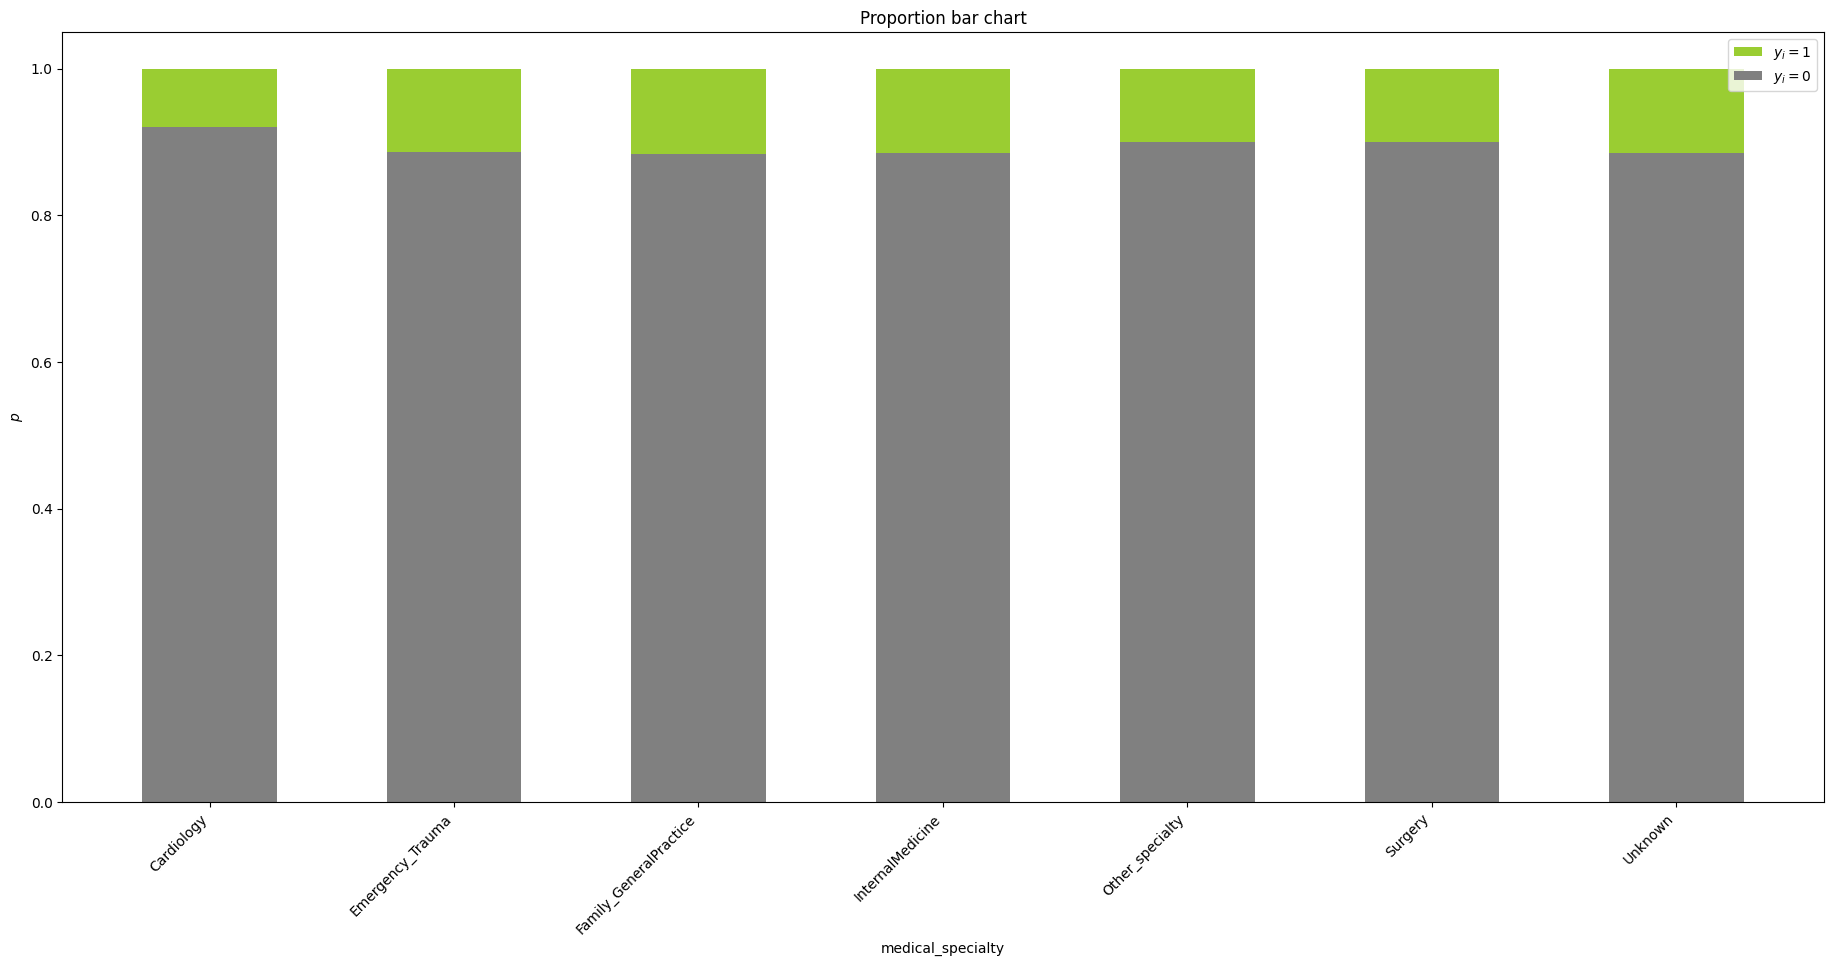

In [1022]:
bar_charts_categorical(train, "medical_specialty", "readmitted_binary")

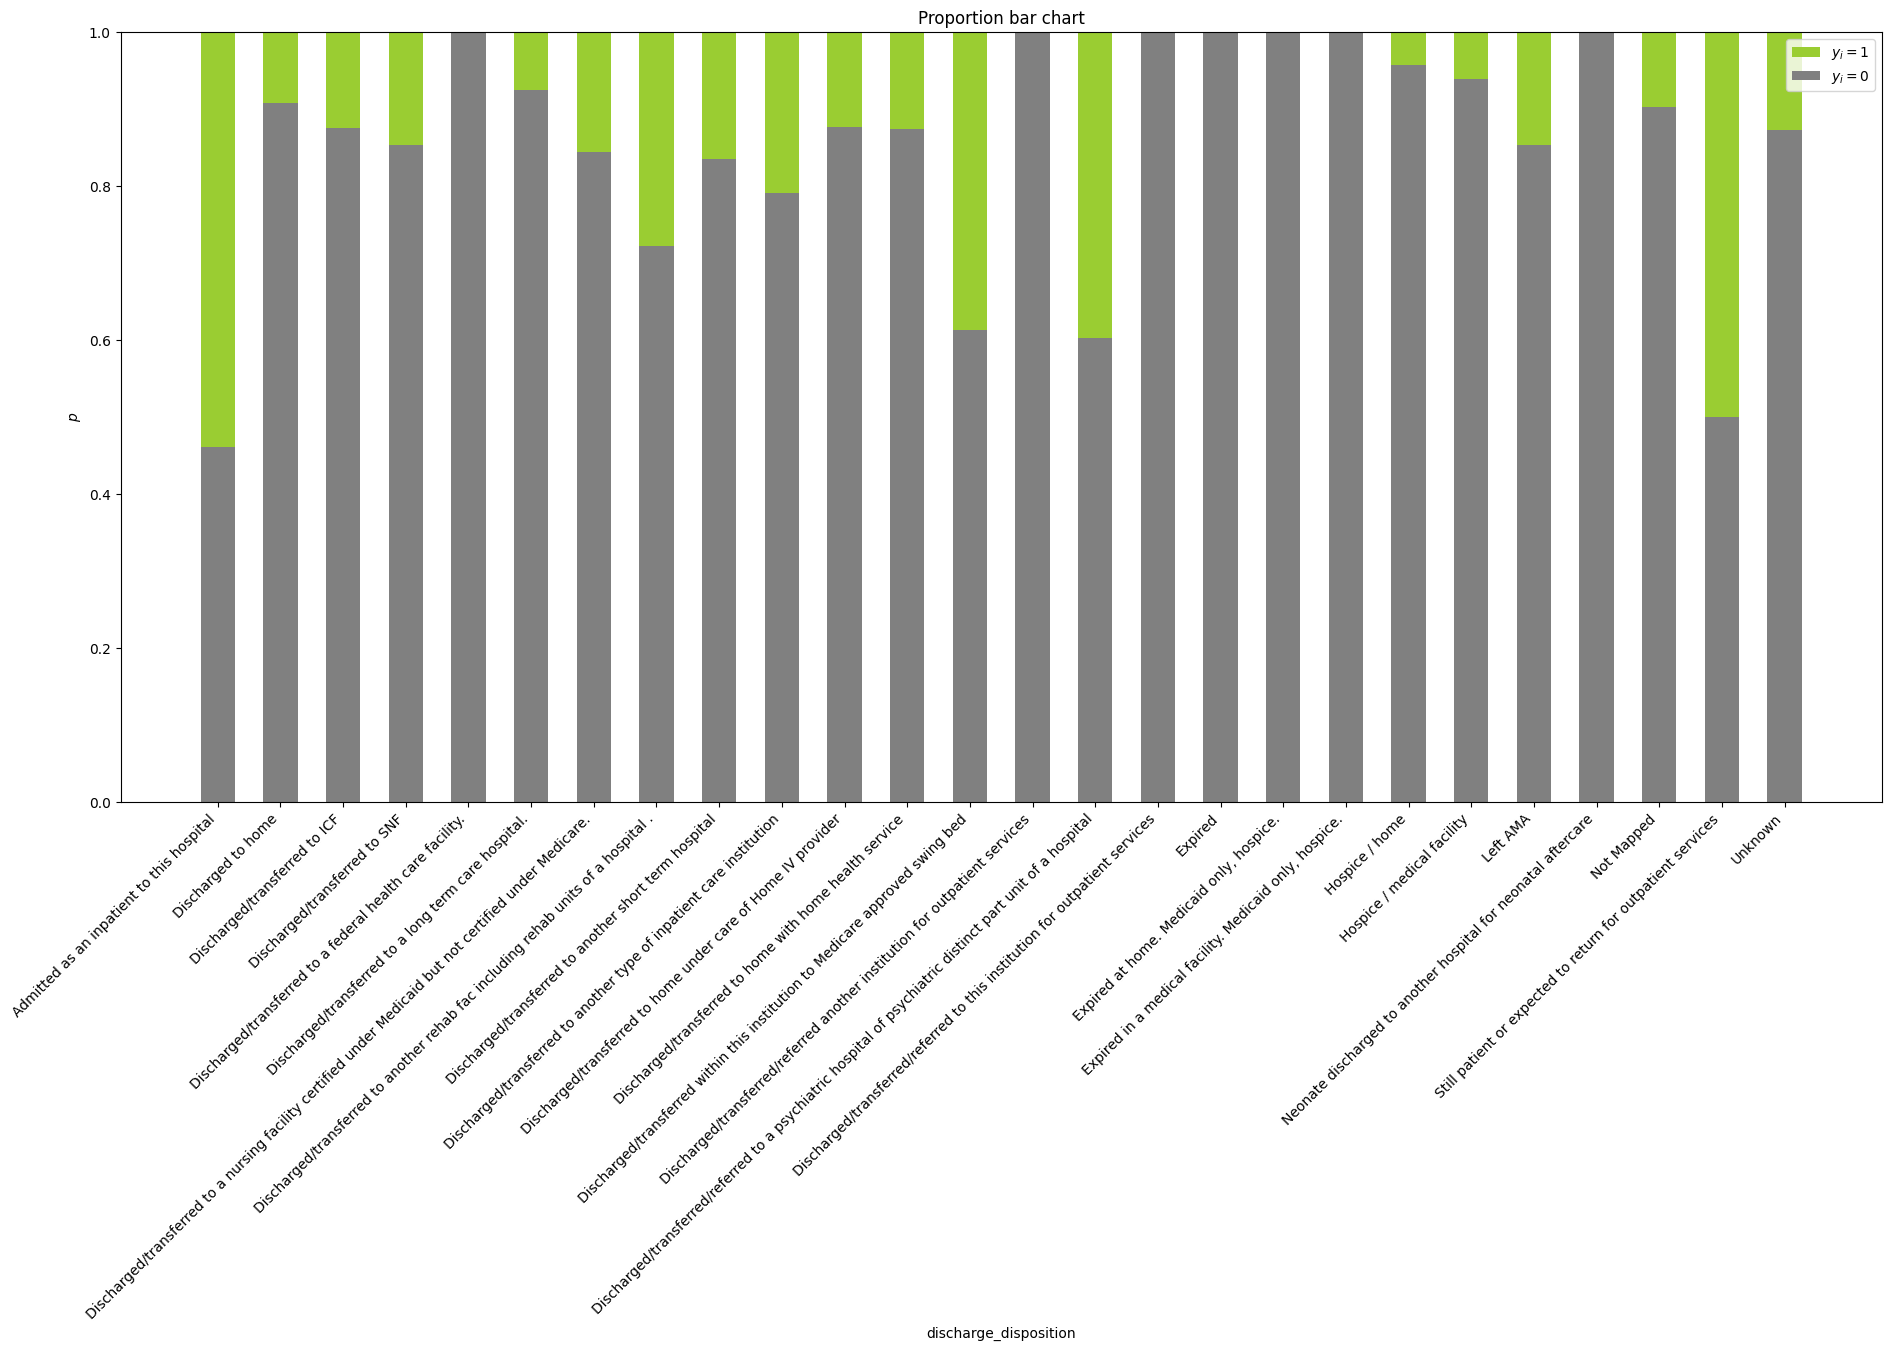

In [1023]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [1024]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                                                                           0.593183
Discharged/transferred to SNF                                                                                0.137290
Discharged/transferred to home with home health service                                                      0.126411
Unknown                                                                                                      0.036358
Discharged/transferred to another short term hospital                                                        0.020888
Discharged/transferred to another rehab fac including rehab units of a hospital .                            0.019555
Expired                                                                                                      0.015933
Discharged/transferred to another type of inpatient care institution                                         0.011539
Not Mapped                        

In [1025]:
expired = train[train['discharge_disposition'].str.contains('Expired')]
train.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = train[train['discharge_disposition'].str.contains('Hospice')]
train.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

rehab = train[train['discharge_disposition'].str.contains('rehab')]
train.loc[rehab.index, 'discharge_disposition'] = 'Rehab'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital',
                            'Discharged/transferred to another type of inpatient care institution', 
                            'Discharged/transferred to a long term care hospital.', 
                            'Discharged/transferred to a federal health care facility.',
                            'Discharged/transferred to ICF',
                            'Neonate discharged to another hospital for neonatal aftercare',
                            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
train['discharge_disposition'] = train['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

home = train[train['discharge_disposition'].str.contains('home')]
train.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
        'Discharged/transferred within this institution to Medicare approved swing bed',
        'Admitted as an inpatient to this hospital','Left AMA',
        'Discharged/transferred/referred to this institution for outpatient services',
        'Discharged/transferred/referred another institution for outpatient services',
        'Still patient or expected to return for outpatient services']
train['discharge_disposition'] = train['discharge_disposition'].replace(other, 'Other')

train['discharge_disposition'] = train['discharge_disposition'].replace('Not Mapped', 'Unknown')

train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged_to_home                         0.720731
Transferred_to_another_medical_facility    0.182183
Unknown                                    0.045890
Rehab                                      0.019555
Expired                                    0.016031
Other                                      0.008324
Hospice                                    0.007286
Name: proportion, dtype: float64

In [1026]:
expired = test[test['discharge_disposition'].str.contains('Expired')]
test.loc[expired.index, 'discharge_disposition'] = 'Expired'

hospice = test[test['discharge_disposition'].str.contains('Hospice')]
test.loc[hospice.index, 'discharge_disposition'] = 'Hospice'

rehab = test[test['discharge_disposition'].str.contains('rehab')]
test.loc[rehab.index, 'discharge_disposition'] = 'Rehab'

another_medical_facility = ['Discharged/transferred to SNF', 'Discharged/transferred to another short term hospital',
                            'Discharged/transferred to another type of inpatient care institution', 
                            'Discharged/transferred to a long term care hospital.', 
                            'Discharged/transferred to a federal health care facility.',
                            'Discharged/transferred to ICF',
                            'Neonate discharged to another hospital for neonatal aftercare',
                            'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']
test['discharge_disposition'] = test['discharge_disposition'].replace(another_medical_facility, 'Transferred_to_another_medical_facility')

home = test[test['discharge_disposition'].str.contains('home')]
test.loc[home.index, 'discharge_disposition'] = 'Discharged_to_home'

other = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
        'Discharged/transferred within this institution to Medicare approved swing bed',
        'Admitted as an inpatient to this hospital','Left AMA',
        'Discharged/transferred/referred to this institution for outpatient services',
        'Discharged/transferred/referred another institution for outpatient services',
        'Still patient or expected to return for outpatient services']
test['discharge_disposition'] = test['discharge_disposition'].replace(other, 'Other')

test['discharge_disposition'] = test['discharge_disposition'].replace('Not Mapped', 'Unknown')

test['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged_to_home                         0.717393
Transferred_to_another_medical_facility    0.182575
Unknown                                    0.046217
Rehab                                      0.019653
Expired                                    0.016705
Other                                      0.009204
Hospice                                    0.008254
Name: proportion, dtype: float64

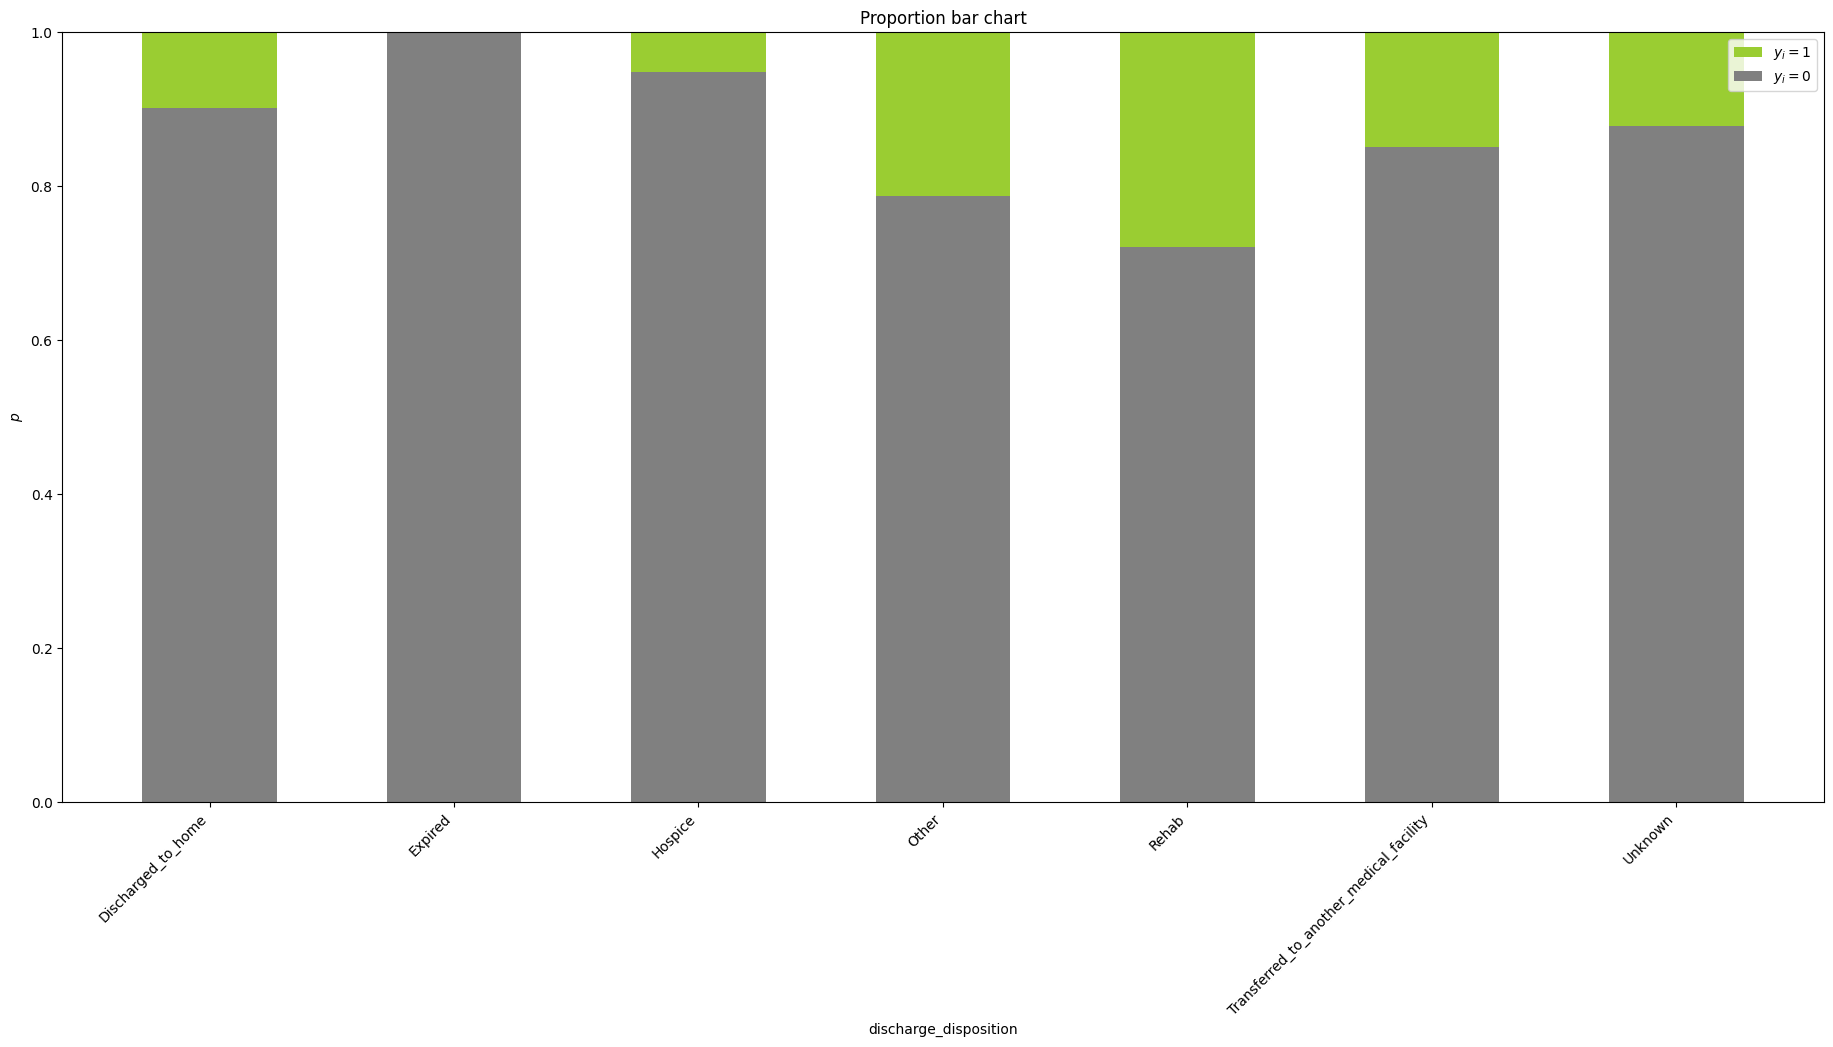

In [1027]:
bar_charts_categorical(train, "discharge_disposition", "readmitted_binary")

In [1028]:
unknown = [' Not Mapped',' Not Available']
train['admission_source'] = train['admission_source'].replace(unknown, 'Unknown')
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.565992
 Physician Referral                                           0.290275
Unknown                                                       0.068968
Transfer from a hospital                                      0.031304
 Transfer from another health care facility                   0.021927
Clinic Referral                                               0.010935
 Transfer from a Skilled Nursing Facility (SNF)               0.008353
HMO Referral                                                  0.001811
 Court/Law Enforcement                                        0.000154
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000112
 Transfer from critial access hospital                        0.000098
 Transfer from Ambulatory Surgery Center                      0.000028
 Extramural Birth                                             0.000014
Normal Delivery                                             

In [1029]:
unknown = [' Not Mapped',' Not Available']
test['admission_source'] = test['admission_source'].replace(unknown, 'Unknown')
test['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.562561
 Physician Referral                                           0.291091
Unknown                                                       0.070554
Transfer from a hospital                                      0.031346
 Transfer from another health care facility                   0.022994
Clinic Referral                                               0.010645
 Transfer from a Skilled Nursing Facility (SNF)               0.008516
HMO Referral                                                  0.001900
 Court/Law Enforcement                                        0.000164
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000131
Normal Delivery                                               0.000033
 Transfer from critial access hospital                        0.000033
 Extramural Birth                                             0.000033
Name: proportion, dtype: float64

In [1030]:
train['admission_source'].unique()

array([' Emergency Room', 'Clinic Referral', 'Unknown',
       ' Transfer from another health care facility',
       ' Physician Referral', 'Transfer from a hospital', 'HMO Referral',
       ' Transfer from a Skilled Nursing Facility (SNF)',
       ' Court/Law Enforcement',
       ' Transfer from hospital inpt/same fac reslt in a sep claim',
       ' Transfer from critial access hospital', ' Extramural Birth',
       'Normal Delivery', ' Transfer from Ambulatory Surgery Center',
       ' Sick Baby'], dtype=object)

In [1031]:
train['admission_source'] = train['admission_source'].str.strip().str.replace(' ', '_')

In [1032]:
test['admission_source'] = test['admission_source'].str.strip().str.replace(' ', '_')

In [1033]:
train['admission_source'].unique()

array(['Emergency_Room', 'Clinic_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility', 'Physician_Referral',
       'Transfer_from_a_hospital', 'HMO_Referral',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)',
       'Court/Law_Enforcement',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Transfer_from_critial_access_hospital', 'Extramural_Birth',
       'Normal_Delivery', 'Transfer_from_Ambulatory_Surgery_Center',
       'Sick_Baby'], dtype=object)

In [1034]:
test['admission_source'].unique()

array(['Emergency_Room', 'Physician_Referral', 'Unknown',
       'Transfer_from_another_health_care_facility',
       'Transfer_from_a_hospital',
       'Transfer_from_a_Skilled_Nursing_Facility_(SNF)',
       'Clinic_Referral', 'Court/Law_Enforcement', 'HMO_Referral',
       'Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim',
       'Normal_Delivery', 'Transfer_from_critial_access_hospital',
       'Extramural_Birth'], dtype=object)

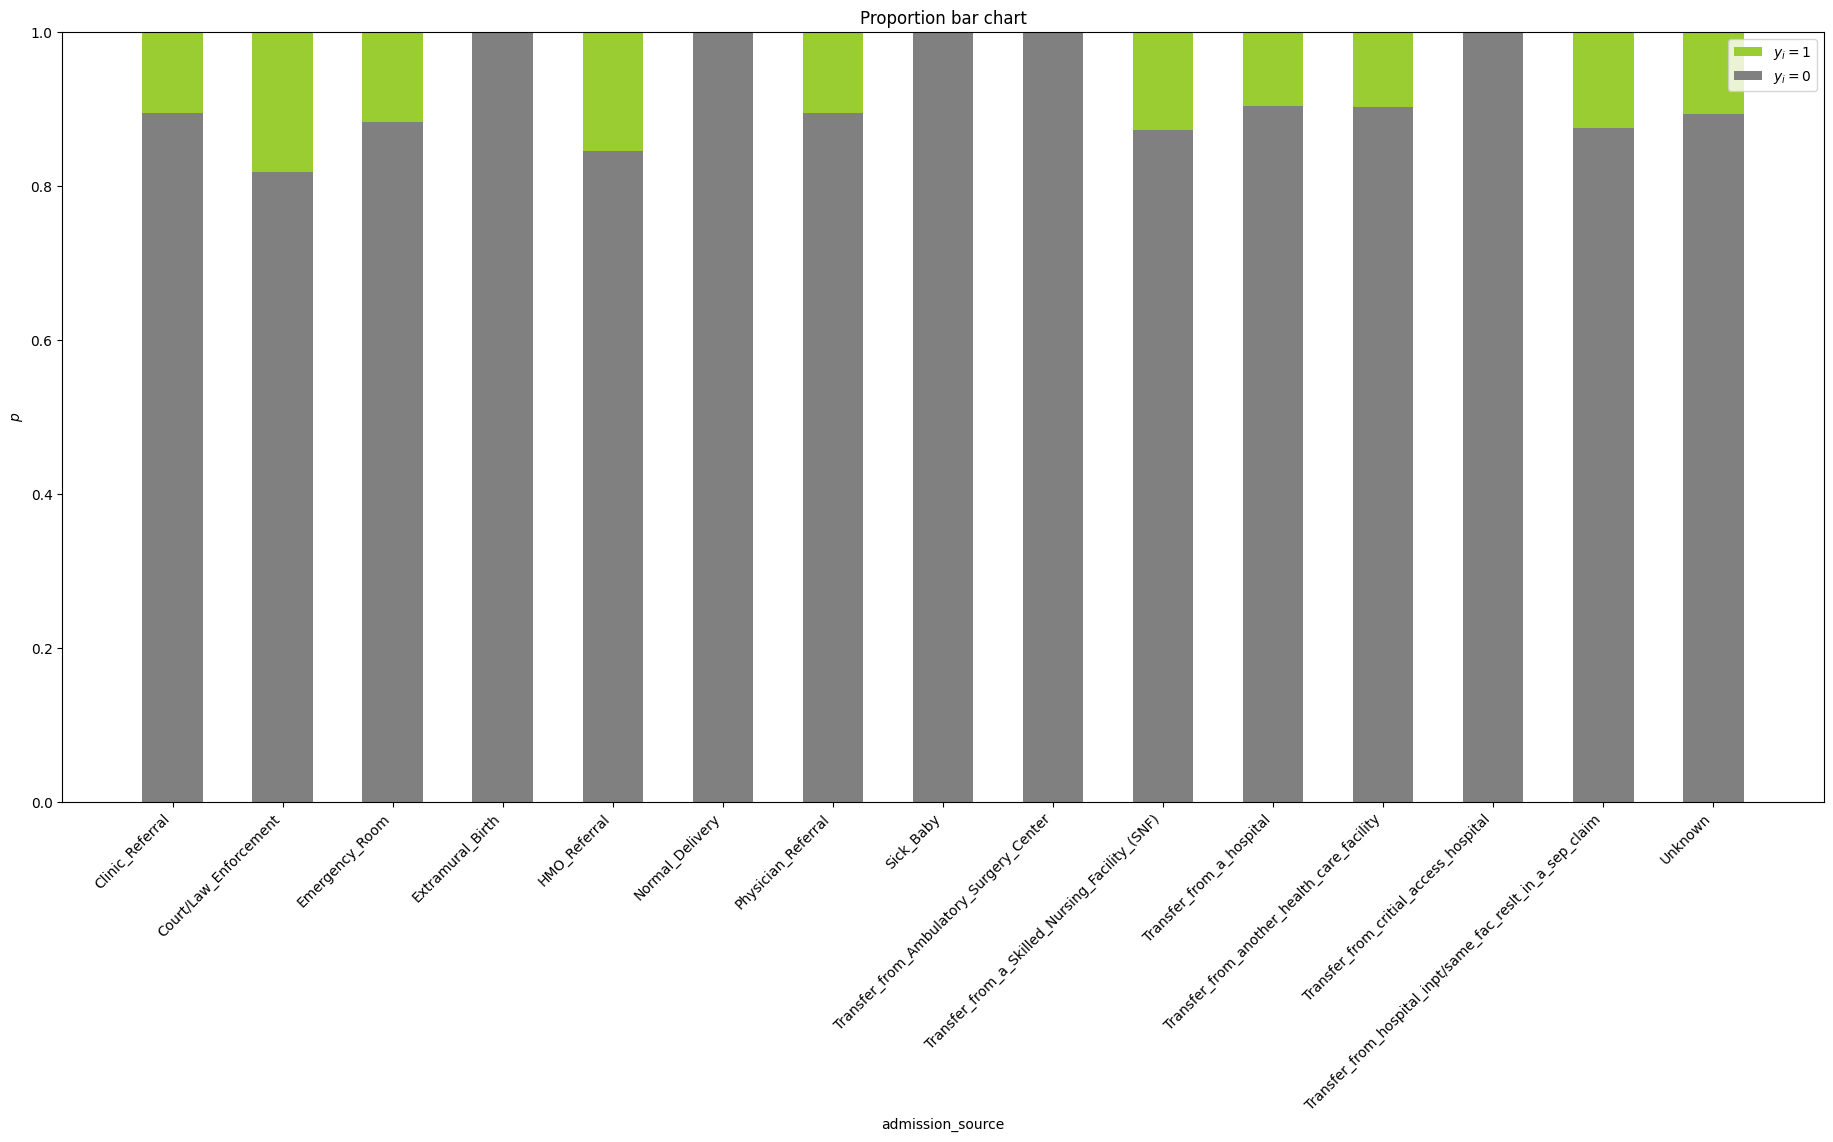

In [1035]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [1036]:
train['admission_source'] = train['admission_source'].replace('Physician_Referral', 'Referral')
train['admission_source'] = train['admission_source'].replace('Clinic_Referral', 'Referral')
train['admission_source'] = train['admission_source'].replace('HMO_Referral', 'Referral')

In [1037]:
test['admission_source'] = test['admission_source'].replace('Physician_Referral', 'Referral')
test['admission_source'] = test['admission_source'].replace('Clinic_Referral', 'Referral')
test['admission_source'] = test['admission_source'].replace('HMO_Referral', 'Referral')

In [1038]:
train['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room                                               0.565992
Referral                                                     0.303021
Unknown                                                      0.068968
Transfer_from_a_hospital                                     0.031304
Transfer_from_another_health_care_facility                   0.021927
Transfer_from_a_Skilled_Nursing_Facility_(SNF)               0.008353
Court/Law_Enforcement                                        0.000154
Transfer_from_hospital_inpt/same_fac_reslt_in_a_sep_claim    0.000112
Transfer_from_critial_access_hospital                        0.000098
Transfer_from_Ambulatory_Surgery_Center                      0.000028
Extramural_Birth                                             0.000014
Normal_Delivery                                              0.000014
Sick_Baby                                                    0.000014
Name: proportion, dtype: float64

In [1039]:
value_counts = train['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

train['admission_source'] = train['admission_source'].replace(replace_admission_source, 'Other_source')
# Unknown provavelmente é os casos onde nao vem de lado nenhum
train['admission_source'] = train['admission_source'].replace('Unknown', 'No_source')
train['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room    0.565992
Referral          0.303021
No_source         0.068968
Other_source      0.062019
Name: proportion, dtype: float64

In [1040]:
value_counts = test['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

test['admission_source'] = test['admission_source'].replace(replace_admission_source, 'Other_source')
# 'Unknown' probably represents cases where there is no source
test['admission_source'] = test['admission_source'].replace('Unknown', 'No_source')
test['admission_source'].value_counts(normalize=True)

admission_source
Emergency_Room    0.562561
Referral          0.303636
No_source         0.070554
Other_source      0.063249
Name: proportion, dtype: float64

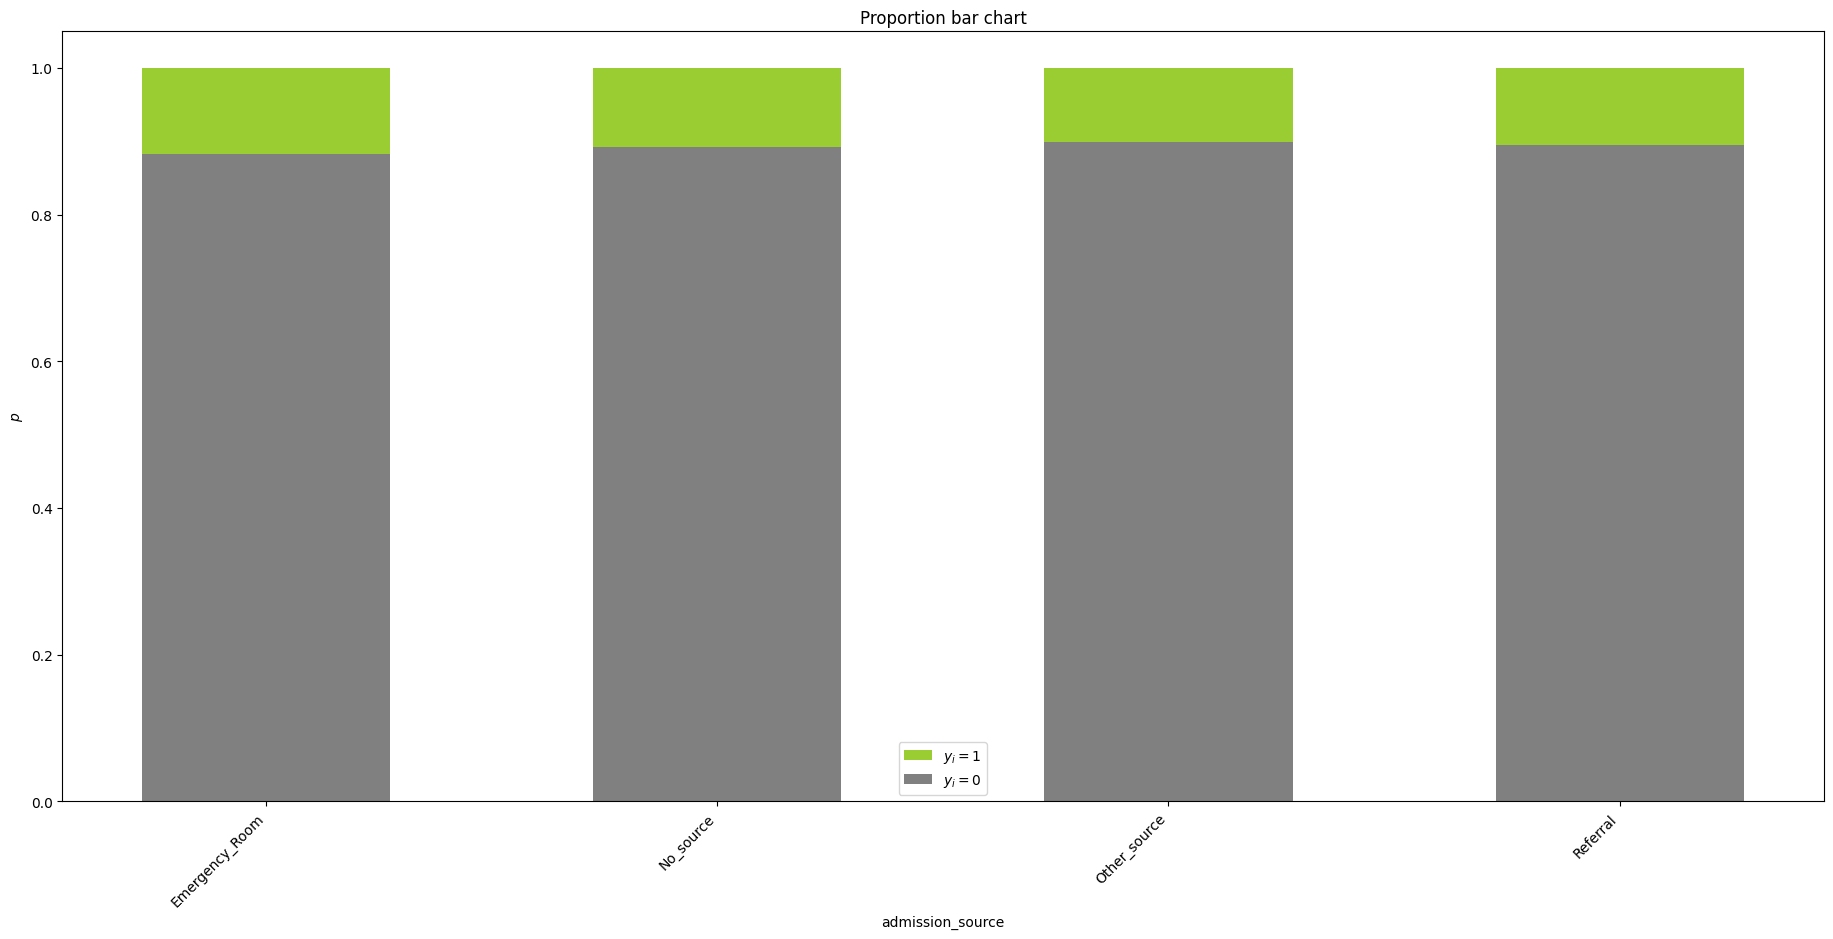

In [1041]:
bar_charts_categorical(train, "admission_source", "readmitted_binary")

In [1042]:
train[['admission_type', 'admission_source']]

,admission_type,admission_source
encounter_id,,
533253,Urgent/Emergency,Emergency_Room
426224,Urgent/Emergency,Referral
634063,Other_type,No_source
890610,Urgent/Emergency,Other_source
654194,Elective,Referral
...,...,...
660160,Elective,Referral
826429,Urgent/Emergency,Referral
332030,Other_type,No_source


In [1043]:
def diagosis_types_division(x):
    try:
        x_float = float(x)
        x_int = int(x_float)
        if x_int <= 139 and x_int>=1:
            return 'Infectious_parasitic'
        elif x_int <= 459 and x_int >= 390 or x_int == 785:
            return 'Circulatory'
        elif x_int <= 519 and x_int >= 460 or x_int == 786:
            return 'Respiratory'
        elif x_int <= 579 and x_int >= 520 or x_int == 787:
            return 'Digestive'
        elif x_float < 251 and x_float >= 250:
            return 'Diabetes'
        elif x_int <= 999 and x_int >= 800:
            return 'Injury'
        elif x_int <= 739 and x_int >= 710:
            return 'Musculoskeletal'
        elif x_int <= 629 and x_int >= 580 or x_int == 788:
            return 'Genitourinary'
        elif x_int <= 239 and x_int >= 140:
            return 'Neoplasms'
        elif (x_int <= 249 and x_int >= 240) or (x_int <= 279 and x_int >= 251):
            return 'Metabolic'
        elif x_int <= 289 and x_int>=280:
            return 'Blood'
        elif x_int <= 319 and x_int>=290:
            return 'Mental'
        elif x_int <= 389 and x_int>=320:
            return 'Nervous'
        elif x_int <= 679 and x_int>=630:
            return 'Pregnancy'
        elif x_int <= 709 and x_int >= 680:
            return 'Skin'
        elif x_int <= 759 and x_int>=740:
            return 'Congenital'
        elif x_int <= 779 and x_int>=760:
            return 'Perinatal_period'
        elif x_int <= 784 and x_int>=780 or x_int <= 799 and x_int>=789:
            return 'Unexplained_symptoms'
        else:
            return 'External'
    except ValueError:
        return 'External'
    
train['primary_diagnosis_types'] = train['primary_diagnosis'].apply(diagosis_types_division)
train['secondary_diagnosis_types'] = train['secondary_diagnosis'].apply(diagosis_types_division)
train['additional_diagnosis_types'] = train['additional_diagnosis'].apply(diagosis_types_division)

In [1044]:
test['primary_diagnosis_types'] = test['primary_diagnosis'].apply(diagosis_types_division)
test['secondary_diagnosis_types'] = test['secondary_diagnosis'].apply(diagosis_types_division)
test['additional_diagnosis_types'] = test['additional_diagnosis'].apply(diagosis_types_division)

In [1045]:
train = train.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1)

In [1046]:
test = test.drop(['primary_diagnosis','secondary_diagnosis','additional_diagnosis'], axis=1)

In [1047]:
train['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Circulatory             0.298838
Respiratory             0.142302
Digestive               0.093590
Diabetes                0.085687
Injury                  0.068519
Genitourinary           0.050382
Musculoskeletal         0.048332
Neoplasms               0.034028
Unexplained_symptoms    0.031515
Infectious_parasitic    0.027626
Metabolic               0.026110
Skin                    0.024482
Mental                  0.022110
External                0.016438
Nervous                 0.011946
Blood                   0.010655
Pregnancy               0.006879
Congenital              0.000562
Name: proportion, dtype: float64

In [1048]:
test['primary_diagnosis_types'].value_counts(normalize=True)

primary_diagnosis_types
Circulatory             0.299672
Respiratory             0.140387
Digestive               0.091975
Diabetes                0.086898
Injury                  0.068556
Genitourinary           0.050049
Musculoskeletal         0.049591
Neoplasms               0.033049
Unexplained_symptoms    0.031707
Metabolic               0.027579
Infectious_parasitic    0.026204
Skin                    0.025745
Mental                  0.022502
External                0.016214
Nervous                 0.011792
Blood                   0.011268
Pregnancy               0.006453
Congenital              0.000360
Name: proportion, dtype: float64

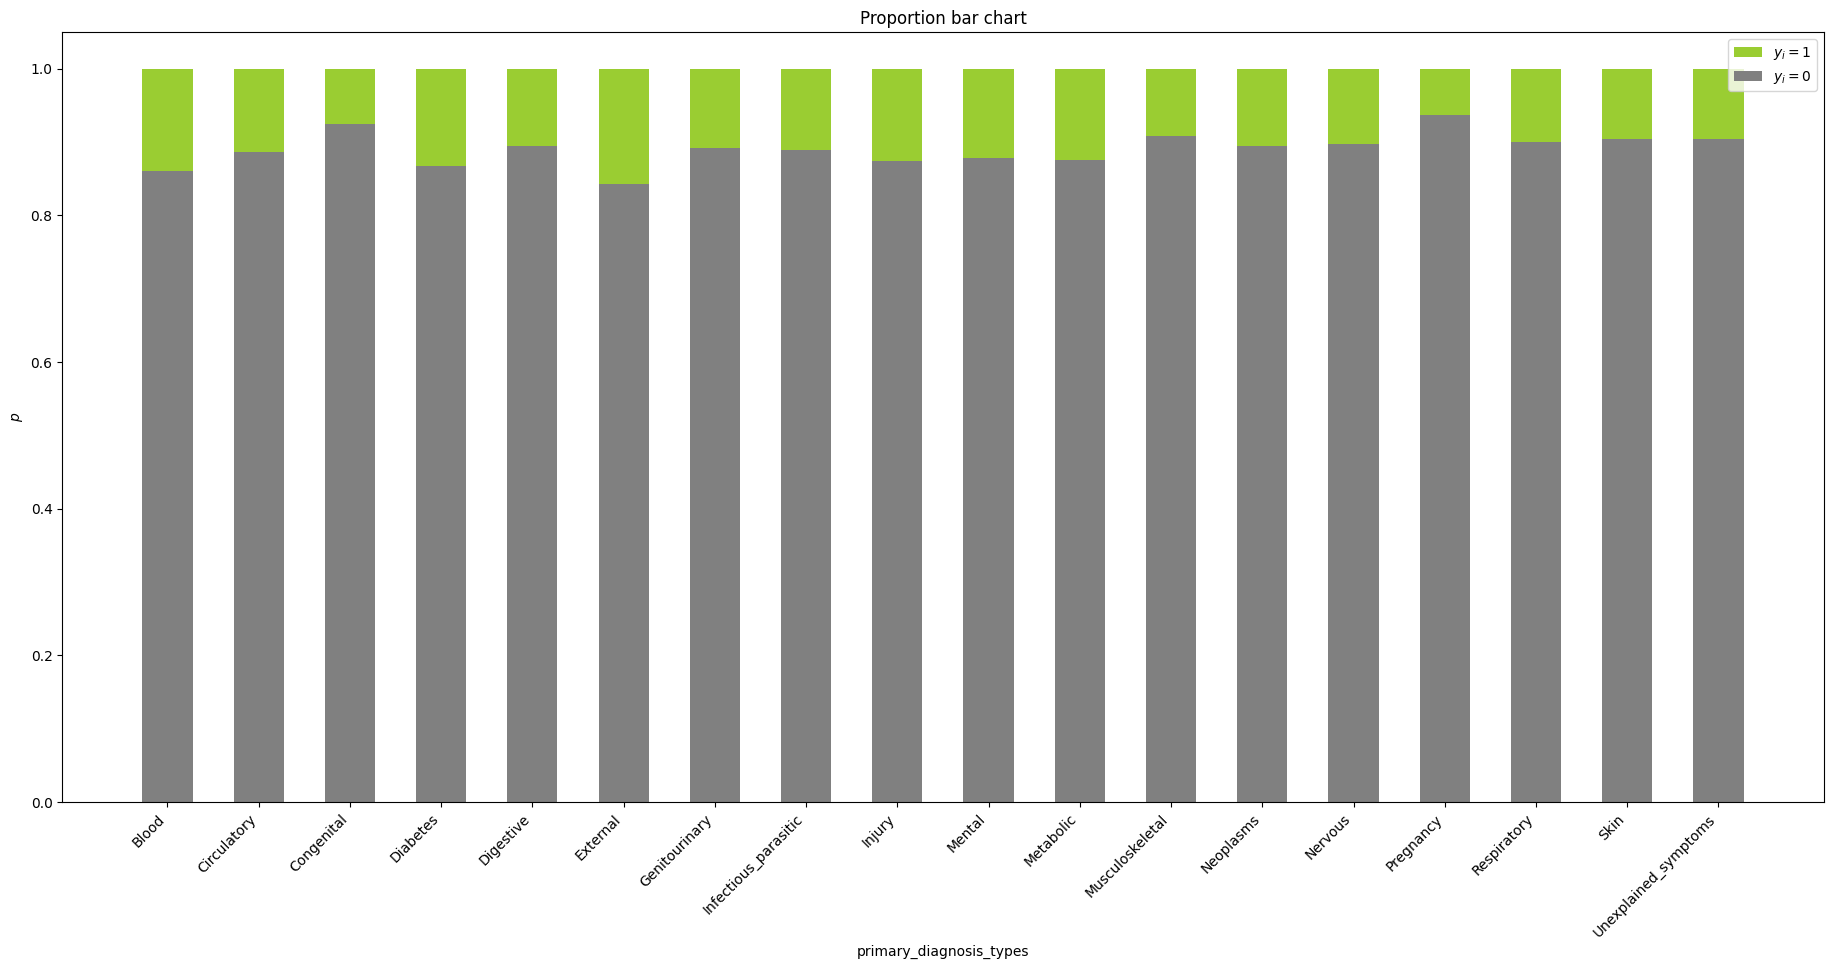

In [1049]:
bar_charts_categorical(train, "primary_diagnosis_types", "readmitted_binary")

In [1050]:
train['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Circulatory             0.313676
Diabetes                0.125470
Respiratory             0.107347
Genitourinary           0.082346
Metabolic               0.080661
Digestive               0.040668
Skin                    0.035586
Blood                   0.029114
External                0.028665
Unexplained_symptoms    0.027865
Mental                  0.025802
Neoplasms               0.024777
Injury                  0.024187
Infectious_parasitic    0.019063
Musculoskeletal         0.017238
Nervous                 0.012381
Pregnancy               0.004099
Congenital              0.001053
Name: proportion, dtype: float64

In [1051]:
test['secondary_diagnosis_types'].value_counts(normalize=True)

secondary_diagnosis_types
Circulatory             0.312349
Diabetes                0.126302
Respiratory             0.106387
Genitourinary           0.082214
Metabolic               0.081133
Digestive               0.041697
Skin                    0.034753
Unexplained_symptoms    0.029152
Blood                   0.027907
External                0.027907
Mental                  0.026826
Neoplasms               0.025614
Injury                  0.023092
Infectious_parasitic    0.018768
Musculoskeletal         0.017557
Nervous                 0.013233
Pregnancy               0.004029
Congenital              0.001081
Name: proportion, dtype: float64

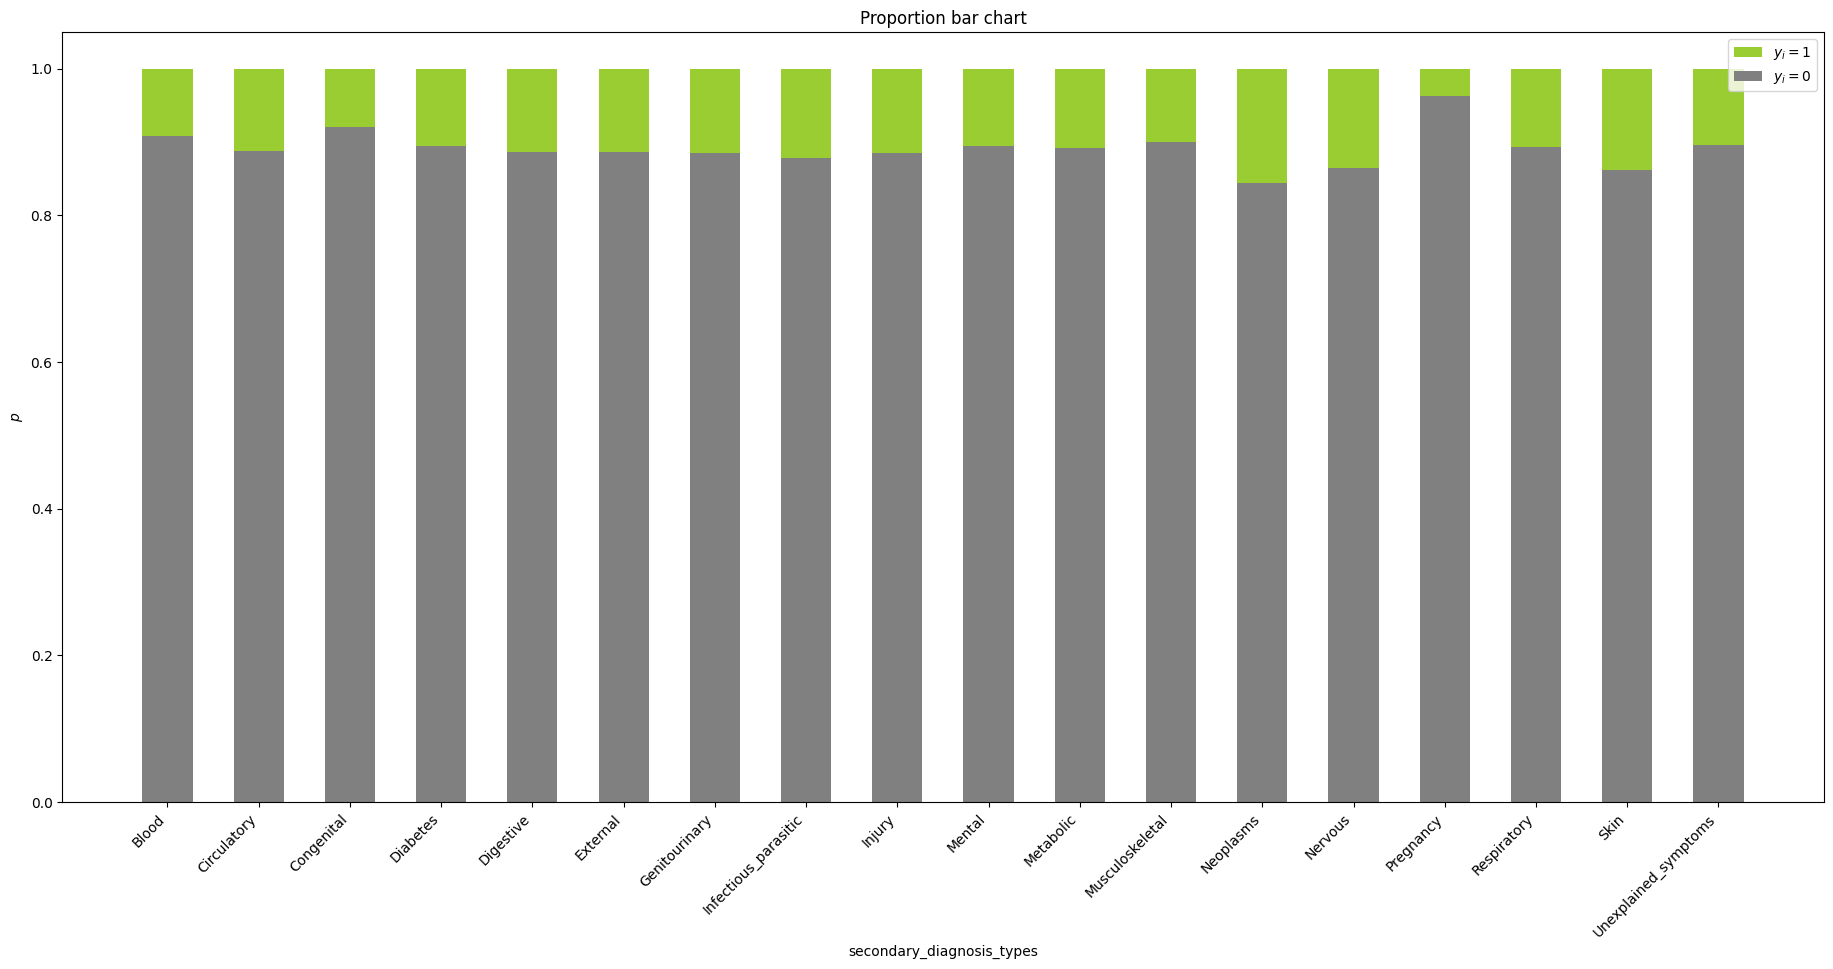

In [1052]:
bar_charts_categorical(train, "secondary_diagnosis_types", "readmitted_binary")

In [1053]:
train['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Circulatory             0.298080
Diabetes                0.167429
Metabolic               0.089393
Respiratory             0.072014
Genitourinary           0.066104
External                0.063872
Digestive               0.038829
Mental                  0.031178
Unexplained_symptoms    0.027570
Skin                    0.024594
Blood                   0.024566
Injury                  0.019414
Musculoskeletal         0.018628
Infectious_parasitic    0.018558
Neoplasms               0.018207
Nervous                 0.017477
Pregnancy               0.003173
Congenital              0.000912
Name: proportion, dtype: float64

In [1054]:
test['additional_diagnosis_types'].value_counts(normalize=True)

additional_diagnosis_types
Circulatory             0.297150
Diabetes                0.171307
Metabolic               0.091156
Respiratory             0.072977
Genitourinary           0.064559
External                0.063249
Digestive               0.038126
Mental                  0.029971
Unexplained_symptoms    0.028693
Blood                   0.024238
Skin                    0.024107
Musculoskeletal         0.019260
Injury                  0.018441
Neoplasms               0.018310
Infectious_parasitic    0.017655
Nervous                 0.017065
Pregnancy               0.002719
Congenital              0.001015
Name: proportion, dtype: float64

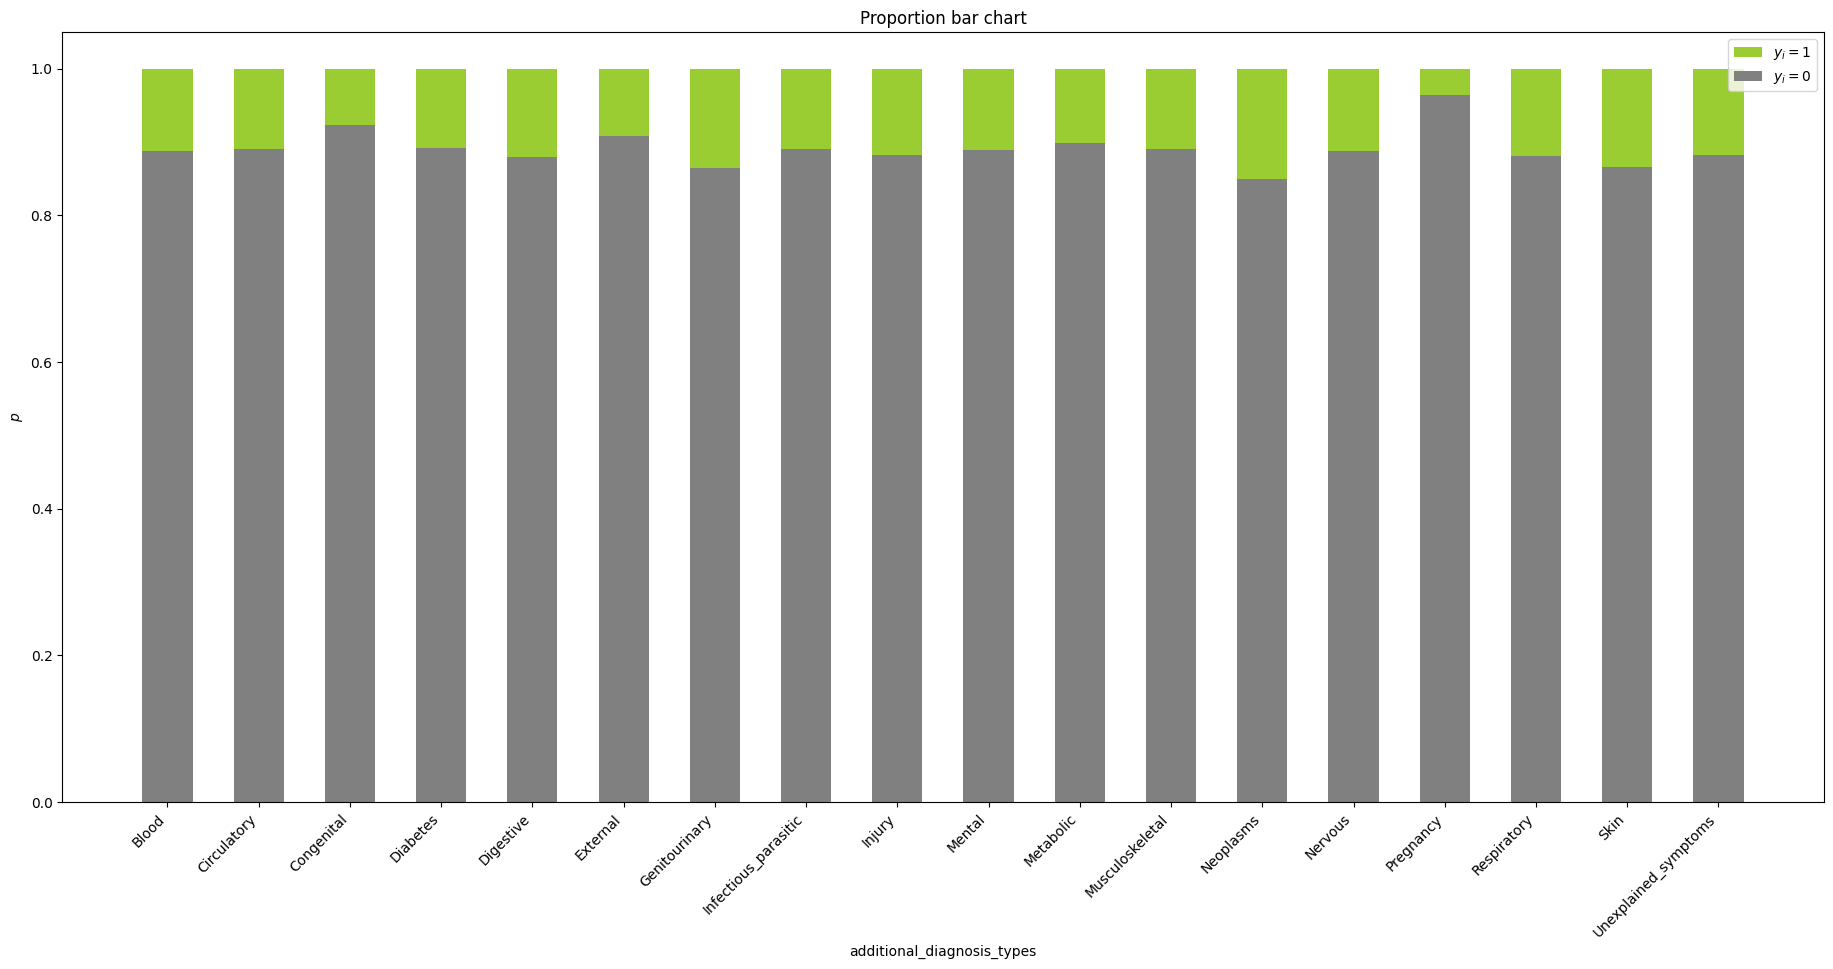

In [1055]:
bar_charts_categorical(train, "additional_diagnosis_types", "readmitted_binary")

In [1056]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.948228
Norm         0.025352
>200         0.014810
>300         0.011609
Name: proportion, dtype: float64

In [1057]:
train['glucose_test_result'] = train['glucose_test_result'].replace('>200', 'High')
train['glucose_test_result'] = train['glucose_test_result'].replace('>300', 'High')

In [1058]:
test['glucose_test_result'] = test['glucose_test_result'].replace('>200', 'High')
test['glucose_test_result'] = test['glucose_test_result'].replace('>300', 'High')

In [1059]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.948228
High         0.026419
Norm         0.025352
Name: proportion, dtype: float64

In [1060]:
test['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
Not_taken    0.945693
High         0.028398
Norm         0.025909
Name: proportion, dtype: float64

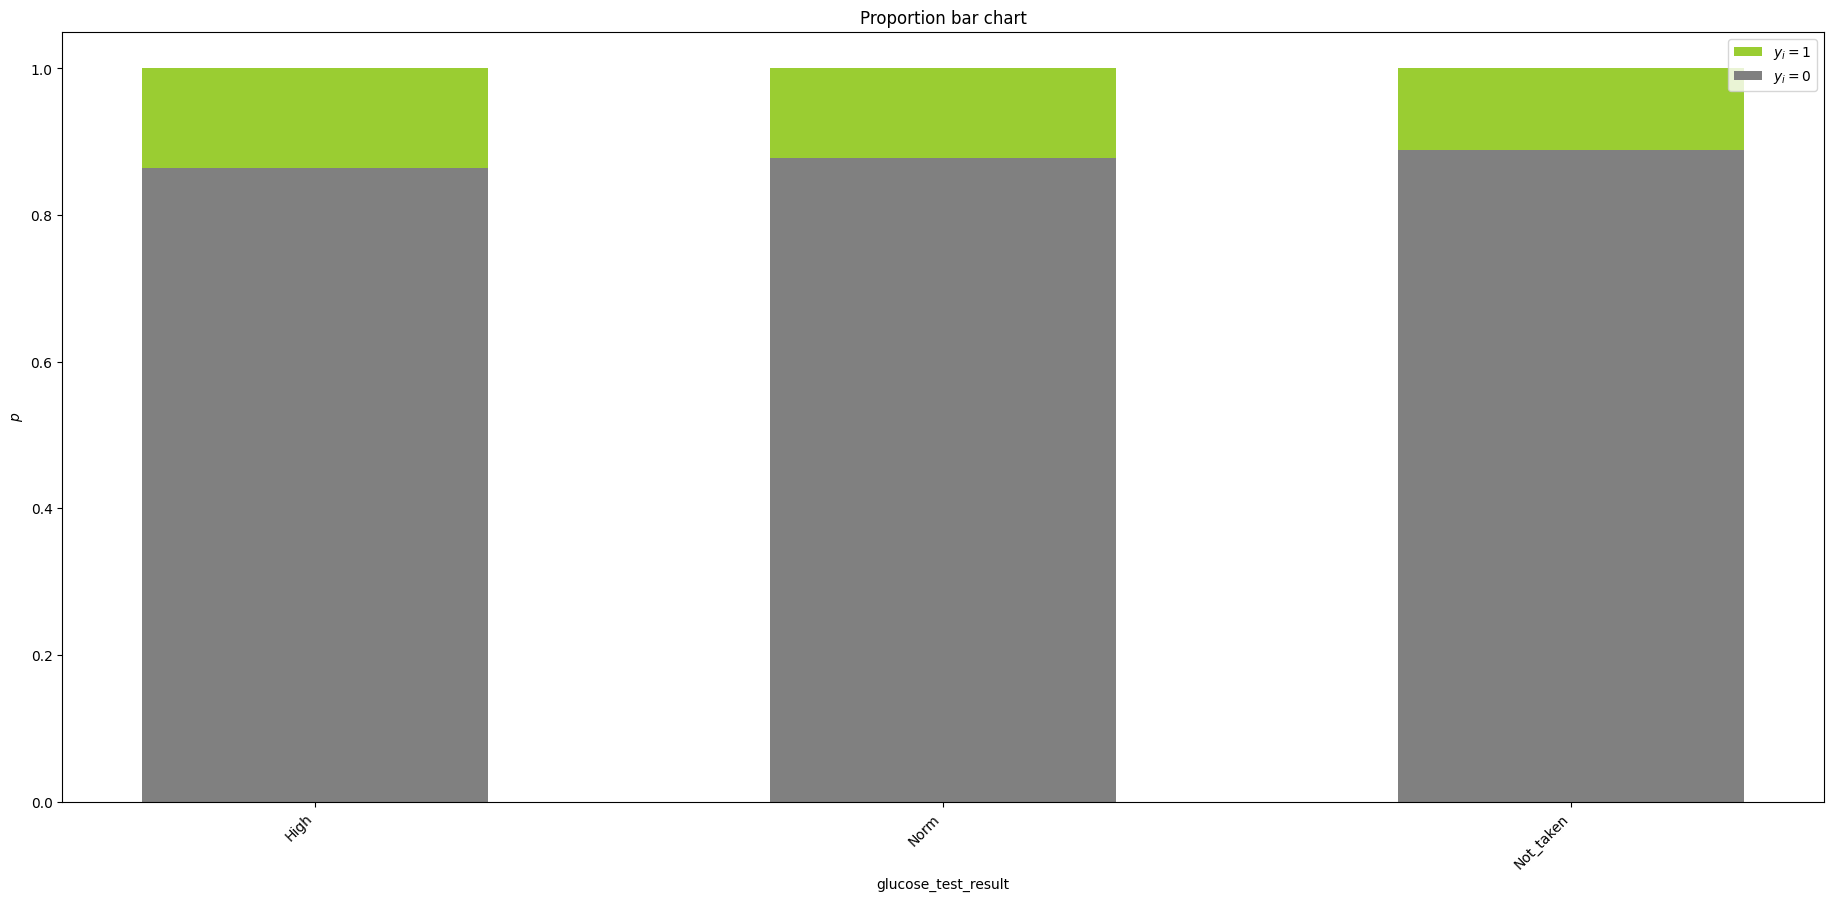

In [1061]:
bar_charts_categorical(train, "glucose_test_result", "readmitted_binary")

In [1062]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832725
>8           0.080086
Norm         0.049175
>7           0.038014
Name: proportion, dtype: float64

In [1063]:
train['a1c_test_result'] = train['a1c_test_result'].replace('>7', 'High')
train['a1c_test_result'] = train['a1c_test_result'].replace('>8', 'High')

In [1064]:
test['a1c_test_result'] = test['a1c_test_result'].replace('>7', 'High')
test['a1c_test_result'] = test['a1c_test_result'].replace('>8', 'High')

In [1065]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832725
High         0.118100
Norm         0.049175
Name: proportion, dtype: float64

In [1066]:
test['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
Not_taken    0.832886
High         0.118408
Norm         0.048706
Name: proportion, dtype: float64

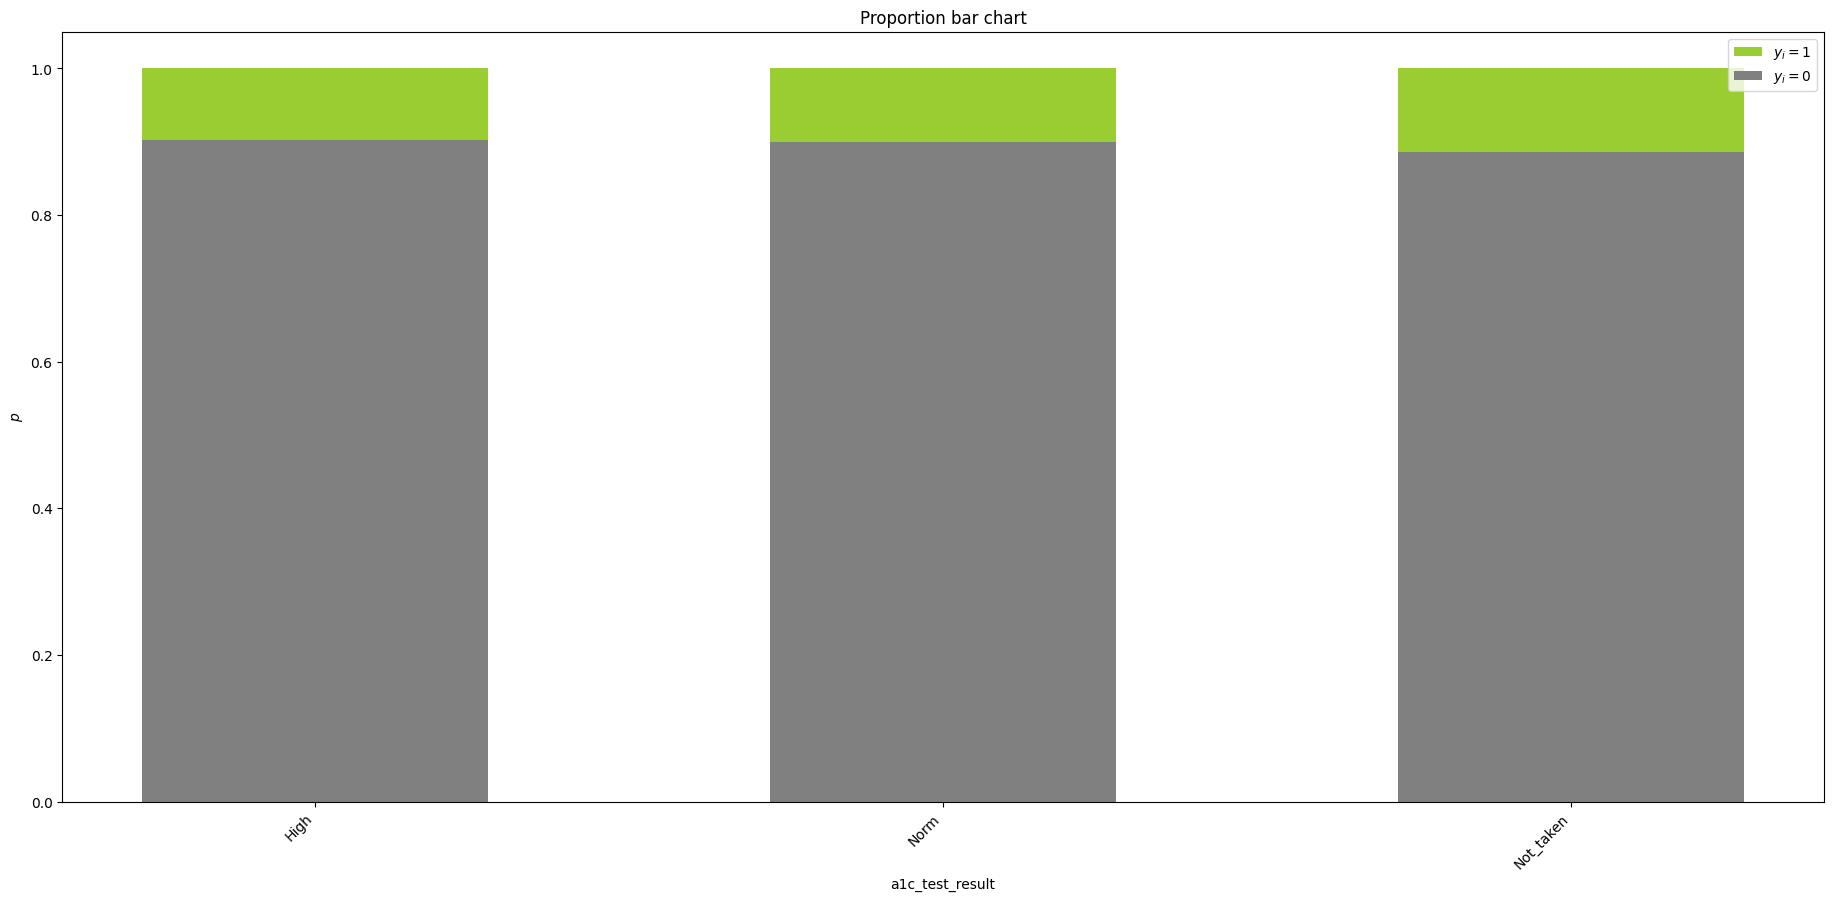

In [1067]:
bar_charts_categorical(train, "a1c_test_result", "readmitted_binary")

In [1068]:
train['Midpoint_Age'] = train['Midpoint_Age'].replace('Unknown', np.nan)

In [1069]:
test['Midpoint_Age'] = test['Midpoint_Age'].replace('Unknown', np.nan)

In [1070]:
train['Midpoint_Age'].isna().sum()

2217

In [1071]:
test['Midpoint_Age'].isna().sum()

1194

In [1072]:
def label_pulse(row):
    if row['Midpoint_Age']==5.0:
        if row['average_pulse_bpm'] >= 70 and row['average_pulse_bpm'] <= 130:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']<= 45.0 and row['Midpoint_Age'] >= 25.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 110:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']==55.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0
    elif row['Midpoint_Age']>=65.0:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 95:
            return 1
        else:
            return 0
    else:
        if row['average_pulse_bpm'] >= 60 and row['average_pulse_bpm'] <= 100:
            return 1
        else:
            return 0

train['is_normal_pulse'] = train.apply(lambda row: label_pulse(row), axis=1)

In [1073]:
test['is_normal_pulse'] = test.apply(lambda row: label_pulse(row), axis=1)

In [1074]:
train['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.512283
1    0.487717
Name: proportion, dtype: float64

In [1075]:
test['is_normal_pulse'].value_counts(normalize=True)

is_normal_pulse
0    0.511595
1    0.488405
Name: proportion, dtype: float64

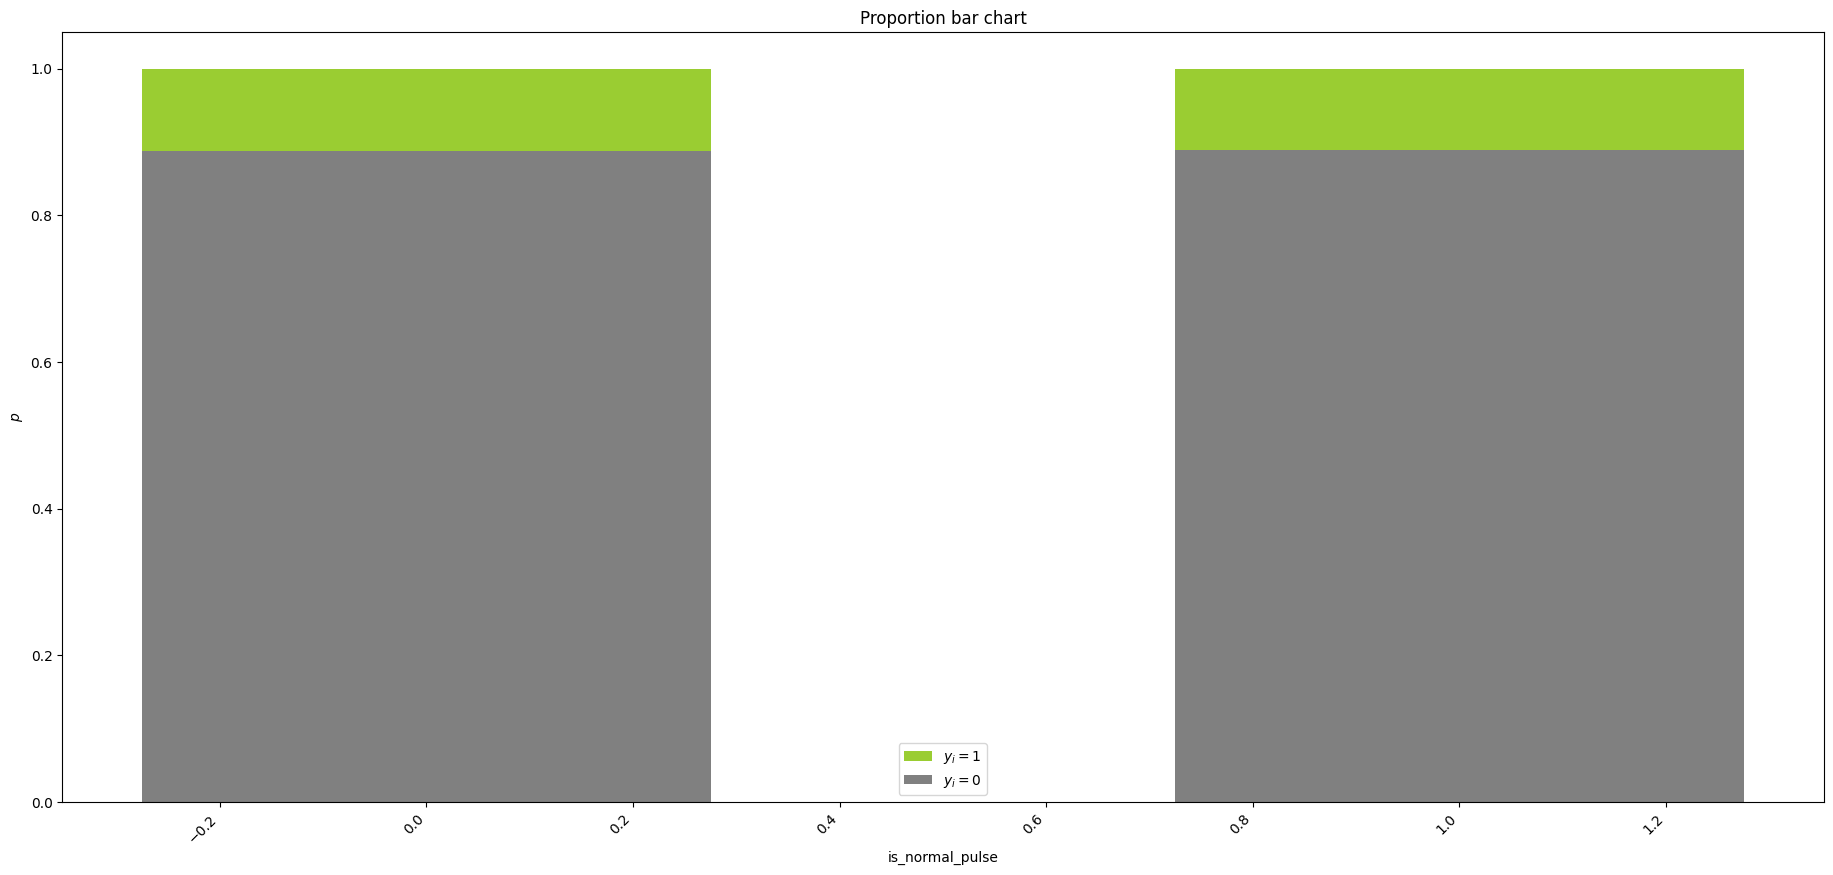

In [1076]:
bar_charts_categorical(train, "is_normal_pulse", "readmitted_binary")

In [1077]:
train.shape

(71236, 40)

In [1078]:
train['patient_id'].nunique()

53985

In [1079]:
train['patient_id'].head()

encounter_id
533253       70110
426224    29775006
634063    80729253
890610     2919042
654194    84871971
Name: patient_id, dtype: int64

In [1080]:
train.head()

,patient_id,race,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,is_normal_pulse
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,None,0,0,2,Urgent/Emergency,Family_GeneralPractice,127,Discharged_to_home,...,0,75.0,0,0,0,0,Respiratory,Metabolic,Respiratory,0
426224,29775006,AfricanAmerican,None,0,0,0,Urgent/Emergency,Unknown,128,Transferred_to_another_medical_facility,...,0,55.0,1,1,0,0,Infectious_parasitic,Circulatory,Neoplasms,0
634063,80729253,Caucasian,None,0,0,1,Other_type,Family_GeneralPractice,94,Discharged_to_home,...,0,65.0,0,1,1,0,Digestive,Infectious_parasitic,Diabetes,1
890610,2919042,AfricanAmerican,MC,0,0,1,Urgent/Emergency,InternalMedicine,81,Discharged_to_home,...,0,65.0,1,0,0,1,Digestive,Digestive,Circulatory,1
654194,84871971,Caucasian,HM,1,0,0,Elective,Unknown,126,Discharged_to_home,...,0,75.0,0,0,0,1,Musculoskeletal,Genitourinary,Circulatory,0


In [1090]:
# First, calculate 'number_encounters' in the training data
train['number_encounters_total'] = train.groupby('patient_id')['patient_id'].transform('count')

# Then, create a dictionary from the training data
patient_encounters_train = train[['patient_id', 'number_encounters_total']].drop_duplicates().set_index('patient_id').to_dict()['number_encounters_total']

# Calculate 'number_encounters' in the test data
test['number_encounters_test'] = test.groupby('patient_id')['patient_id'].transform('count')

# Create a dictionary from the test data
patient_encounters_test = test[['patient_id', 'number_encounters_test']].drop_duplicates().set_index('patient_id').to_dict()['number_encounters_test']

# Map the dictionaries to the 'patient_id' column in the test data and add the counts
test['number_encounters_total'] = test['patient_id'].map(patient_encounters_train).fillna(0) + test['patient_id'].map(patient_encounters_test).fillna(0)

# Replace the 'number_encounters' values in the test data with the 'number_encounters_test' values where 'number_encounters' is 0
test.loc[test['number_encounters_total'] == 0, 'number_encounters_total'] = test['number_encounters_test']

In [1091]:
test = test.drop(columns=['number_encounters_test'])

In [1092]:
train['number_encounters_total'].value_counts()

number_encounters_total
1     43426
2     14074
3      6039
4      3236
5      1700
6       948
7       553
8       360
9       180
10      170
11      154
12       96
15       90
14       84
13       39
33       33
19       19
18       18
17       17
Name: count, dtype: int64

In [1093]:
test['number_encounters_total'].value_counts()

number_encounters_total
1.0     16460
2.0      6273
3.0      3050
4.0      1676
5.0      1055
6.0       619
7.0       421
8.0       247
9.0       177
10.0      120
12.0       75
11.0       60
13.0       57
15.0       43
18.0       39
20.0       37
23.0       20
14.0       19
17.0       14
16.0       14
28.0       14
19.0       13
22.0       12
21.0        8
40.0        7
Name: count, dtype: int64

In [1094]:
train.drop(['patient_id'], axis = 1, inplace = True) 

In [1095]:
test.drop(['patient_id'], axis = 1, inplace = True) 

In [1096]:
train.drop(['medication'], axis = 1, inplace = True) 

In [1097]:
test.drop(['medication'], axis = 1, inplace = True) 

In [1098]:
train['Total_visits'] = train['inpatient_visits'] + train['outpatient_visits'] + train['emergency_visits']

In [1099]:
test['Total_visits'] = test['inpatient_visits'] + test['outpatient_visits'] + test['emergency_visits']

In [1100]:
train['Serious_condition_visits'] = train['inpatient_visits'] + train['emergency_visits']

In [1101]:
test['Serious_condition_visits'] = test['inpatient_visits'] + test['emergency_visits']

In [1102]:
# Drop because its exactly the same as presc_diabetes_meds_binary
train.drop(['no_medication'], axis=1, inplace=True)

In [1103]:
# Drop because its exactly the same as presc_diabetes_meds_binary
test.drop(['no_medication'], axis=1, inplace=True)

In [1104]:
metric_features = ['average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
            'number_of_medications', 'number_diagnoses', 'number_generic_medications', 'outpatient_visits','number_encounters_total',
            'emergency_visits', 'inpatient_visits', 'Midpoint_Age', 'Total_visits', 'Serious_condition_visits']

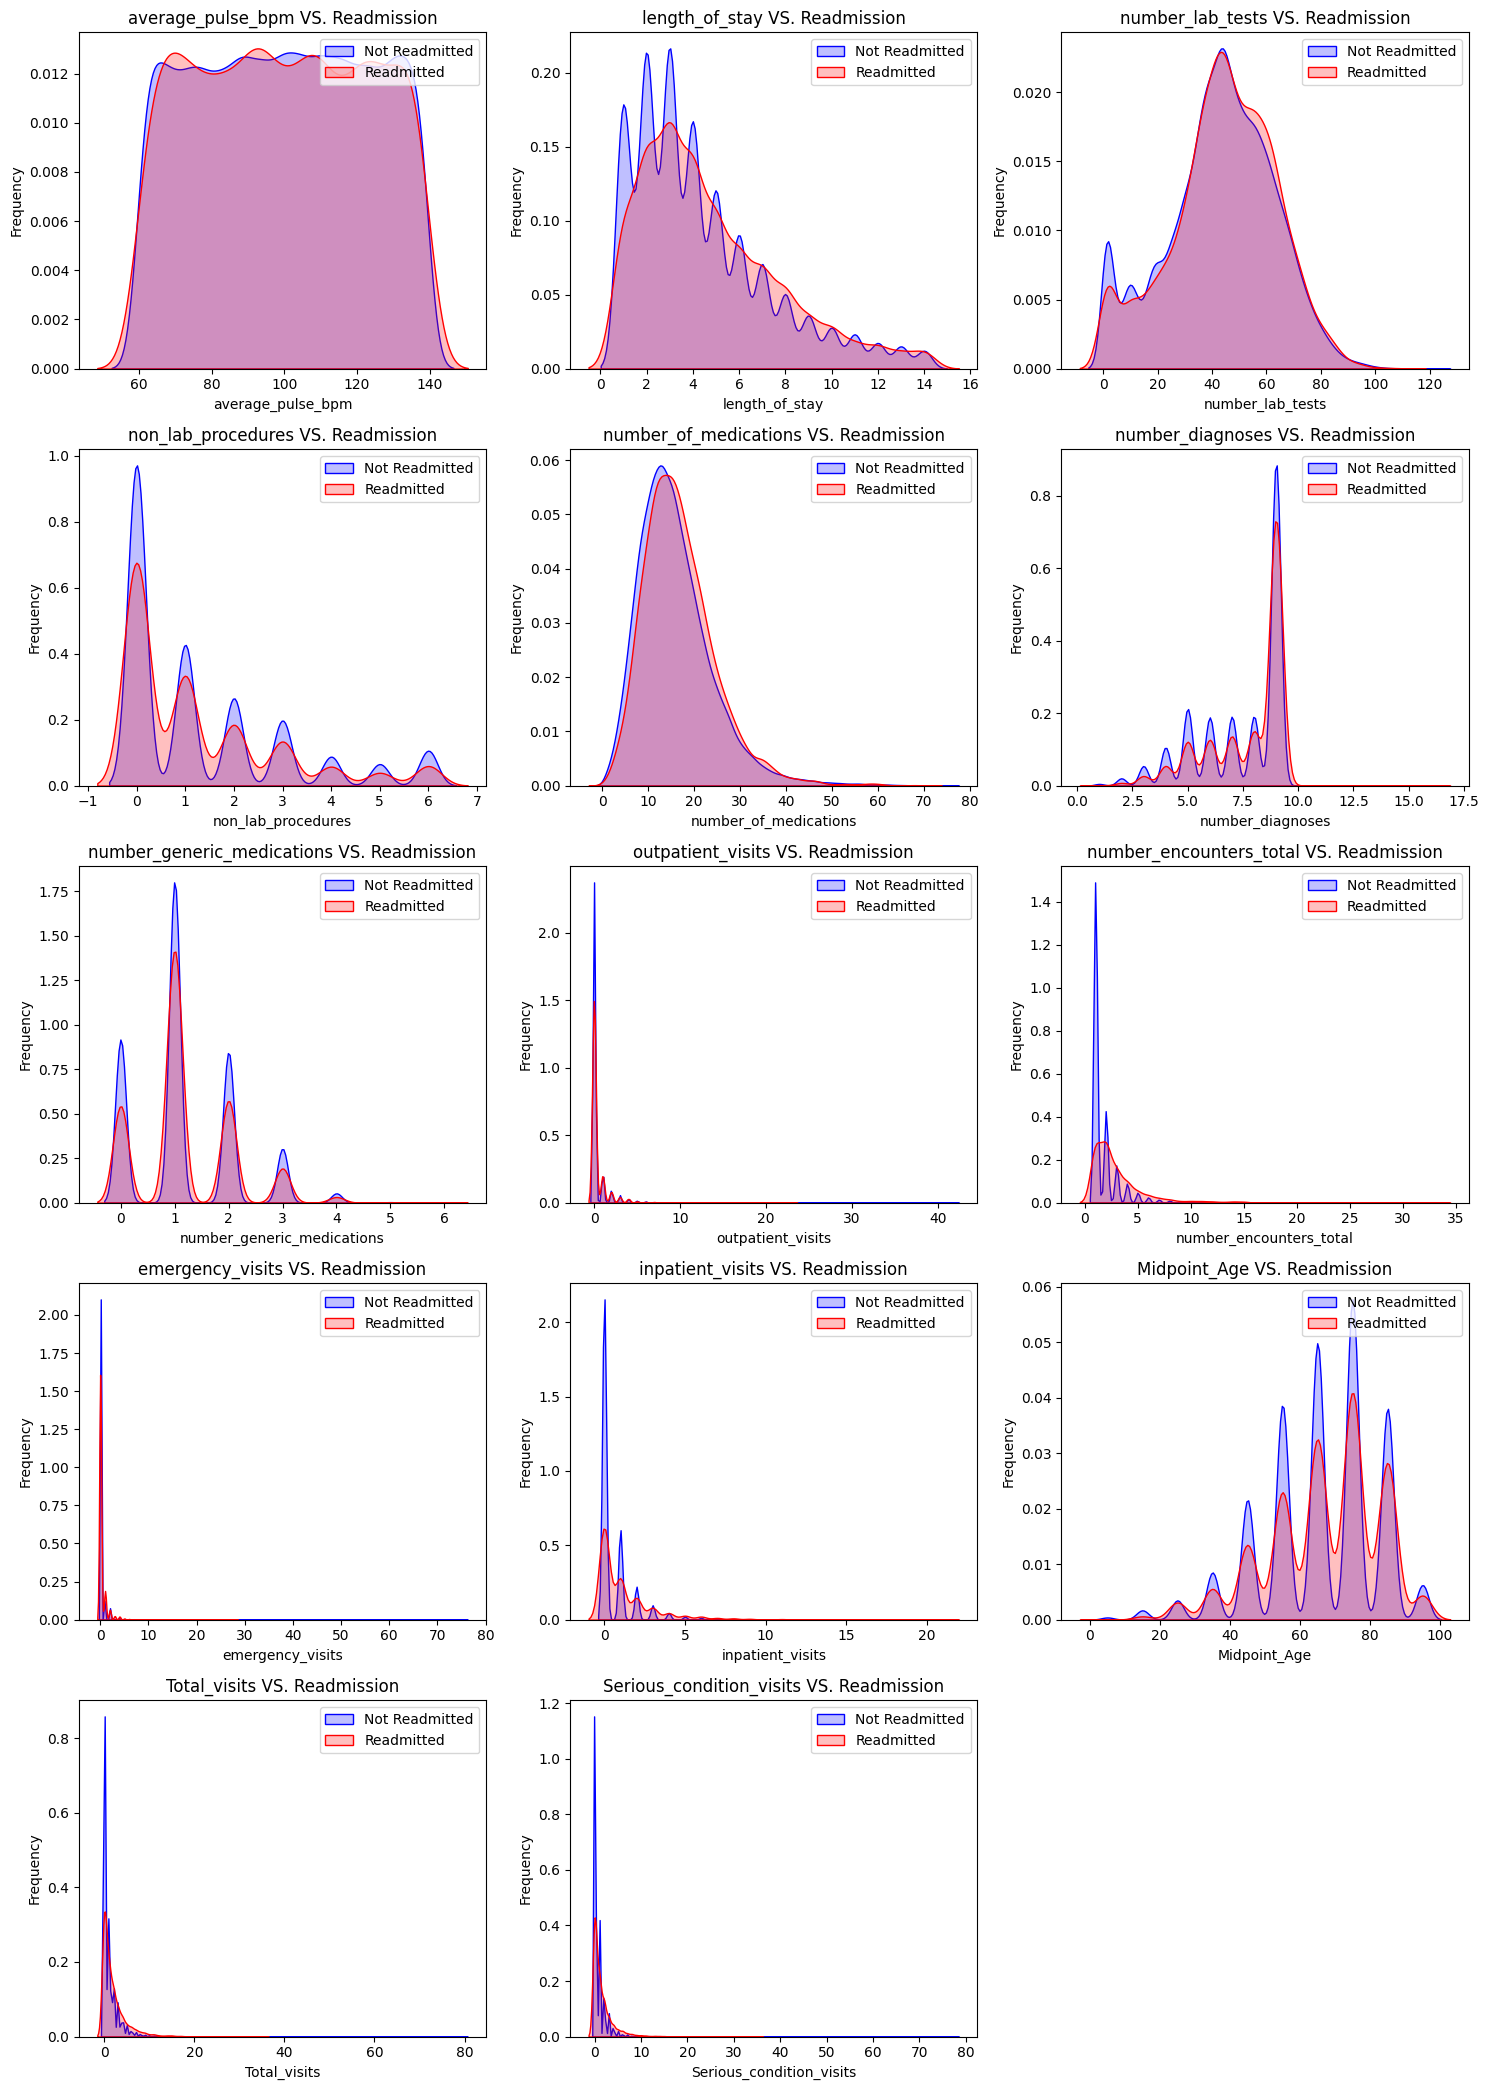

In [1105]:
# Number of columns for subplot
ncols = 3
nrows = int(np.ceil(len(metric_features) / 3))

fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 7*3))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

for idx, feature in enumerate(metric_features):   
    sns.kdeplot(train.loc[(train['readmitted_binary'] == 'No'), feature], color='b', shade=True, label='Not Readmitted', ax=axs[idx])
    sns.kdeplot(train.loc[(train['readmitted_binary'] == 'Yes'), feature], color='r', shade=True, label='Readmitted', ax=axs[idx])
    
    axs[idx].set(xlabel=feature, ylabel='Frequency')
    axs[idx].set_title(f'{feature} VS. Readmission')
    axs[idx].legend()

plt.tight_layout()
plt.show()

# Train Test Split

In [1106]:
X_binary = train.drop(['readmitted_binary', 'readmitted_multiclass'], axis=1)
y_binary = train['readmitted_binary']

In [1107]:
X_binary.shape

(71236, 38)

In [1108]:
X_binary.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [1109]:
y_binary.shape

(71236,)

In [1110]:
# X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X, y_binary,
#                                                   test_size = 0.25, 
#                                                   random_state = 0, 
#                                                   stratify = y_binary, 
#                                                   shuffle = True)

# Outliers

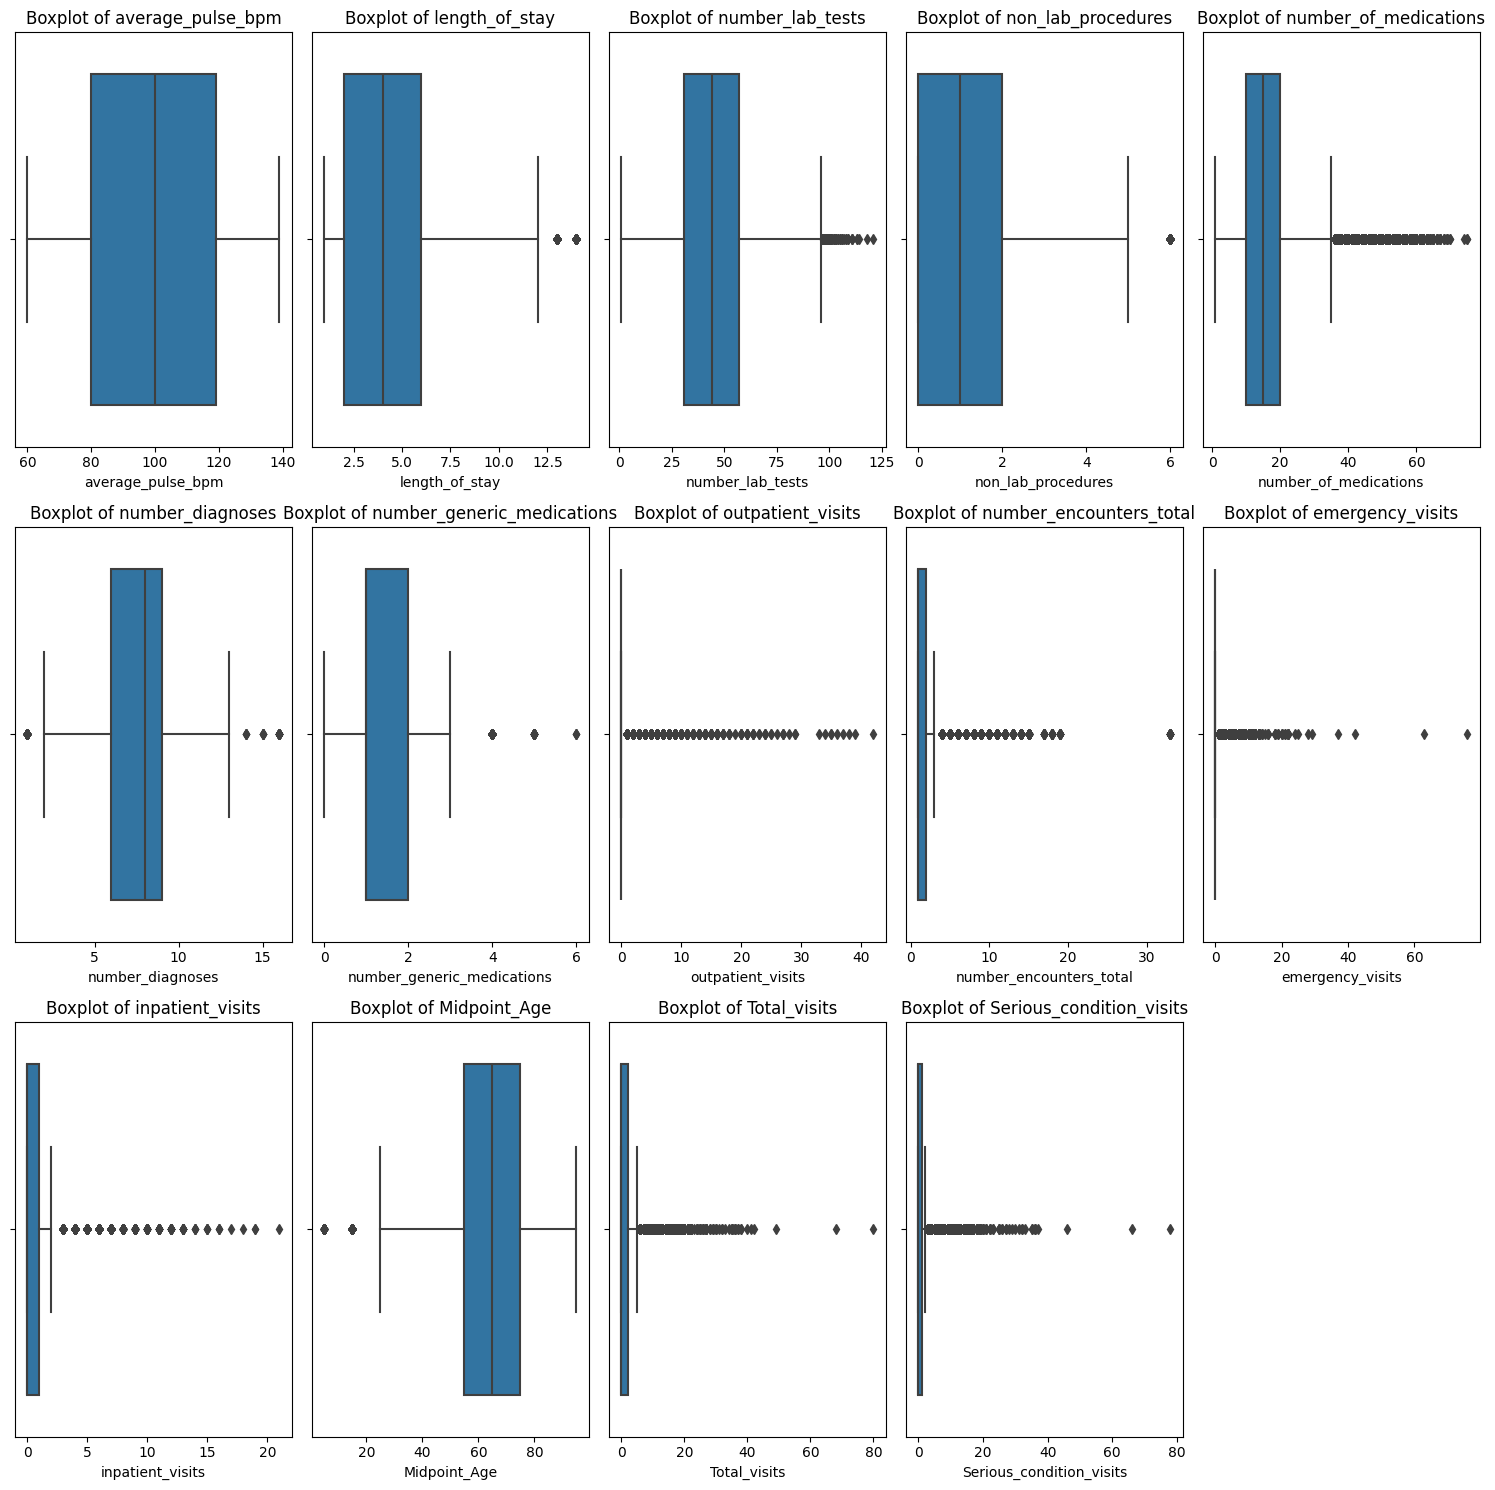

In [1111]:
# Determine the number of rows needed for the plot
n_rows = int(np.ceil(len(metric_features) / 5))

# Create a figure and axes objects
fig, axs = plt.subplots(n_rows, 5, figsize=(15, n_rows * 5))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[len(metric_features):]:
    fig.delaxes(ax)

# Create a boxplot for each column
for i, feature in enumerate(metric_features):
    sns.boxplot(x=X_binary[feature], ax=axs[i])
    axs[i].set_title(f'Boxplot of {feature}')

# Display the plot
plt.tight_layout()
plt.show()

In [1112]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(X,y) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
        
    print(result)

In [1113]:
X_binary.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [1114]:
categorical_columns = ['race','payer_code','admission_type','medical_specialty','discharge_disposition','admission_source',
                      'primary_diagnosis_types', 'secondary_diagnosis_types','additional_diagnosis_types','glucose_test_result',
                      'a1c_test_result','race_caucasian','metformin','insulin','Sulfonylureas','Meglitinides',
                      'Thiazolidinediones','Alpha_Glucosidase_Inhibitors','Combination_Medications','gender_binary',
                      'presc_diabetes_meds_binary','change_in_meds_binary','Has_Insurance','is_normal_pulse']

In [1115]:
X_binary[categorical_columns]

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Sulfonylureas,Meglitinides,Thiazolidinediones,Alpha_Glucosidase_Inhibitors,Combination_Medications,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,Caucasian,None,Urgent/Emergency,Family_GeneralPractice,Discharged_to_home,Emergency_Room,Respiratory,Metabolic,Respiratory,Not_taken,...,0,0,0,0,0,0,0,0,0,0
426224,AfricanAmerican,None,Urgent/Emergency,Unknown,Transferred_to_another_medical_facility,Referral,Infectious_parasitic,Circulatory,Neoplasms,Not_taken,...,0,0,0,0,0,1,1,0,0,0
634063,Caucasian,None,Other_type,Family_GeneralPractice,Discharged_to_home,No_source,Digestive,Infectious_parasitic,Diabetes,Not_taken,...,0,0,0,0,0,0,1,1,0,1
890610,AfricanAmerican,MC,Urgent/Emergency,InternalMedicine,Discharged_to_home,Other_source,Digestive,Digestive,Circulatory,Not_taken,...,0,0,0,0,0,1,0,0,1,1
654194,Caucasian,HM,Elective,Unknown,Discharged_to_home,Referral,Musculoskeletal,Genitourinary,Circulatory,Not_taken,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,AfricanAmerican,MC,Elective,InternalMedicine,Discharged_to_home,Referral,Circulatory,Respiratory,Diabetes,Not_taken,...,1,0,0,0,0,0,1,1,1,1
826429,AfricanAmerican,None,Urgent/Emergency,Unknown,Unknown,Referral,Neoplasms,Neoplasms,External,Not_taken,...,1,0,0,0,0,0,1,1,0,0
332030,Caucasian,None,Other_type,Unknown,Unknown,No_source,Circulatory,Respiratory,Metabolic,High,...,1,0,0,0,0,0,1,1,0,0


In [1116]:
for categorical_columns in X_binary.columns:
    TestIndependence(X_binary[categorical_columns],y_binary,categorical_columns)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
race_caucasian is IMPORTANT for Prediction
number_generic_medications is IMPORTANT for Prediction
insulin is IMPORTANT for Prediction
metformin is IMPORTANT for Prediction
Sulfonylureas is NOT an im

In [1117]:
X_binary.shape

(71236, 38)

In [1118]:
# X_train_bin.drop(['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
# 'Combination_Medications','is_normal_pulse'], axis = 1, inplace = True) 
# X_val_bin.drop(['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
# 'Combination_Medications','is_normal_pulse'], axis = 1, inplace = True)

In [1119]:
# X_train_bin.shape

In [1120]:
# X_val_bin.shape

In [1121]:
test.shape

(30530, 38)

In [1122]:
# test.drop(['Sulfonylureas','Meglitinides','Thiazolidinediones','Alpha_Glucosidase_Inhibitors',
# 'Combination_Medications','is_normal_pulse'], axis = 1, inplace = True) 

In [1123]:
# test.shape

## Encoding categorical variables

In [1124]:
X_binary.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [1125]:
test.columns

Index(['race', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'race_caucasian', 'number_generic_medications',
       'insulin', 'metformin', 'Sulfonylureas', 'Meglitinides',
       'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'primary_diagnosis_types', 'secondary_diagnosis_types',
       'additional_diagnosis_types', 'is_normal_pulse',
       'number_encounters_total', 'Total_visits', 'Serious_condition_visits'],
      dtype='object')

In [1126]:
columns_to_encode = ['race','payer_code','admission_type','medical_specialty','discharge_disposition','admission_source',
                     'primary_diagnosis_types','secondary_diagnosis_types','additional_diagnosis_types','glucose_test_result', 
                     'a1c_test_result']

other_columns_train = pd.DataFrame(X_binary.drop(columns_to_encode, axis=1))
# other_columns_val = pd.DataFrame(X_val_bin.drop(columns_to_encode, axis=1))
other_columns_test = pd.DataFrame(test.drop(columns_to_encode, axis=1))

In [1127]:
# count encoder
count_encoder = ce.CountEncoder(cols=columns_to_encode)

# fit and transform on your data
count_encoder.fit(X_binary[columns_to_encode])
train_encoded_1 = count_encoder.transform(X_binary[columns_to_encode])
train_encoded_1

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,a1c_test_result
encounter_id,,,,,,,,,,,
533253,51779,28201,50779,5217,51342,40319,10137,5746,5130,67548,59320
426224,12977,28201,50779,34922,12978,21586,1968,22345,1297,67548,59320
634063,51779,28201,7246,5217,51342,4913,6667,1358,11927,67548,59320
890610,12977,22683,50779,12561,51342,4418,6667,2897,21234,67548,59320
654194,51779,4319,13211,34922,51342,21586,3443,5866,21234,67548,59320
...,...,...,...,...,...,...,...,...,...,...,...
660160,12977,22683,13211,12561,51342,21586,21288,7647,11927,67548,8413
826429,12977,28201,50779,34922,3269,21586,2424,1765,4550,67548,8413
332030,51779,28201,7246,34922,3269,4913,21288,7647,6368,1882,59320


In [1128]:
# Perform one-hot encoding on the specified columns
# train_encoded_1 = pd.get_dummies(X_binary[columns_to_encode])
# train_encoded_1 = train_encoded_1.astype(int)

X_bin_encoded = pd.concat([train_encoded_1, other_columns_train], axis=1)
X_bin_encoded

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,51779,28201,50779,5217,51342,40319,10137,5746,5130,67548,...,0,75.0,0,0,0,0,0,6,2,2
426224,12977,28201,50779,34922,12978,21586,1968,22345,1297,67548,...,0,55.0,1,1,0,0,0,1,0,0
634063,51779,28201,7246,5217,51342,4913,6667,1358,11927,67548,...,0,65.0,0,1,1,0,1,1,1,1
890610,12977,22683,50779,12561,51342,4418,6667,2897,21234,67548,...,0,65.0,1,0,0,1,1,1,1,1
654194,51779,4319,13211,34922,51342,21586,3443,5866,21234,67548,...,0,75.0,0,0,0,1,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,12977,22683,13211,12561,51342,21586,21288,7647,11927,67548,...,0,85.0,0,1,1,1,1,1,1,1
826429,12977,28201,50779,34922,3269,21586,2424,1765,4550,67548,...,0,75.0,0,1,1,0,0,1,0,0
332030,51779,28201,7246,34922,3269,4913,21288,7647,6368,1882,...,0,65.0,0,1,1,0,0,4,4,4


In [1129]:
# Perform one-hot encoding on the specified columns

# val_encoded_1 = pd.get_dummies(X_binary[columns_to_encode])
# val_encoded_1 = val_encoded_1.astype(int)

# X_val_bin_encoded = pd.concat([val_encoded_1, other_columns_val], axis=1)
# X_val_bin_encoded

In [1130]:
# Perform one-hot encoding on the specified columns
# test_encoded_1 = pd.get_dummies(test[columns_to_encode])
# test_encoded_1 = test_encoded_1.astype(int)

test_encoded_1 = count_encoder.transform(test[columns_to_encode])
test_encoded_1

test_encoded = pd.concat([test_encoded_1, other_columns_test], axis=1)
test_encoded

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,51779,4319,50779,34922,51342,40319,10137,22345,11927,67548,...,0,85.0,1,1,0,1,0,2.0,0,0
447319,51779,4319,50779,34922,51342,40319,6104,1358,1964,1882,...,0,25.0,1,0,0,1,1,3.0,1,1
309126,12977,28201,50779,12561,51342,40319,10137,8938,2766,67548,...,0,35.0,1,1,0,0,1,4.0,0,0
181183,51779,3292,7246,34922,51342,40319,4881,1723,4550,67548,...,0,55.0,1,1,1,1,0,1.0,0,0
359339,51779,28201,50779,12561,51342,40319,3589,22345,21234,67548,...,0,65.0,1,1,0,0,0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451150,51779,4319,50779,34922,12978,40319,3589,5746,6368,67548,...,0,75.0,1,0,0,1,0,1.0,0,0
549298,51779,28201,50779,5217,51342,40319,21288,8938,6368,67548,...,0,65.0,1,1,0,0,1,8.0,4,4
327586,51779,28201,50779,12561,12978,40319,4881,22345,11927,67548,...,0,85.0,0,1,0,0,0,1.0,0,0


In [1134]:
X_bin_encoded.shape

(71236, 38)

In [1135]:
test_encoded.shape

(30530, 38)

In [1136]:
for categorical_columns in X_bin_encoded:
    TestIndependence(X_bin_encoded[categorical_columns],y_binary, categorical_columns)

race is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis_types is IMPORTANT for Prediction
secondary_diagnosis_types is IMPORTANT for Prediction
additional_diagnosis_types is IMPORTANT for Prediction
glucose_test_result is IMPORTANT for Prediction
a1c_test_result is IMPORTANT for Prediction
outpatient_visits is IMPORTANT for Prediction
emergency_visits is IMPORTANT for Prediction
inpatient_visits is IMPORTANT for Prediction
average_pulse_bpm is NOT an important predictor. (Discard average_pulse_bpm from model)
length_of_stay is IMPORTANT for Prediction
number_lab_tests is IMPORTANT for Prediction
non_lab_procedures is IMPORTANT for Prediction
number_of_medications is IMPORTANT for Prediction
number_diagnoses is IMPORTANT for Prediction
race_caucasian is IMPORTANT for Predi

In [1137]:
X_bin_encoded.shape

(71236, 38)

In [1138]:
# X_val_bin_encoded.shape

In [1139]:
test_encoded.shape

(30530, 38)

## Imputing age

In [1140]:
X_bin_encoded['Midpoint_Age'].value_counts()

Midpoint_Age
75.0    17719
65.0    15164
85.0    11755
55.0    11664
45.0     6541
35.0     2584
95.0     1910
25.0     1096
15.0      481
5.0       105
Name: count, dtype: int64

In [1141]:
X_bin_encoded['Midpoint_Age'].isna().sum()

2217

In [1142]:
# X_val_bin_encoded['Midpoint_Age'].isna().sum()

In [1143]:
test_encoded['Midpoint_Age'].isna().sum()

1194

In [1144]:
known_age = X_bin_encoded[X_bin_encoded['Midpoint_Age'].notnull()]
unknown_age = X_bin_encoded[X_bin_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
X_bin_encoded.loc[X_bin_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [1146]:
known_age = test_encoded[test_encoded['Midpoint_Age'].notnull()]
unknown_age = test_encoded[test_encoded['Midpoint_Age'].isnull()]

# Reset indices
known_age = known_age.reset_index(drop=True)
unknown_age = unknown_age.reset_index(drop=True)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values using the original indices
test_encoded.loc[test_encoded['Midpoint_Age'].isnull(), 'Midpoint_Age'] = predicted_ages

In [1147]:
X_bin_encoded['Midpoint_Age'].isna().sum()

0

In [1149]:
test_encoded['Midpoint_Age'].isna().sum()

0

In [1150]:
for i in metric_features:
    correlation, p_value = pointbiserialr(X_bin_encoded[i], y_binary.map({'Yes': True, 'No': False}))
    print(i)
    print(f'Correlation: {correlation}')
    print(f'P-Value: {p_value}')
    print('')

average_pulse_bpm
Correlation: 0.00015244874294701382
P-Value: 0.9675446544944268

length_of_stay
Correlation: 0.041071472402752086
P-Value: 5.541095835568111e-28

number_lab_tests
Correlation: 0.018789446962013706
P-Value: 5.295854100066659e-07

non_lab_procedures
Correlation: -0.014872653389925562
P-Value: 7.197165755793393e-05

number_of_medications
Correlation: 0.03744604352242986
P-Value: 1.559663337440077e-23

number_diagnoses
Correlation: 0.051739054047743906
P-Value: 1.979475253998669e-43

number_generic_medications
Correlation: 0.0021529357106976413
P-Value: 0.5655546160225472

outpatient_visits
Correlation: 0.018379638304906153
P-Value: 9.30154610443625e-07

number_encounters_total
Correlation: 0.22543717499527444
P-Value: 0.0

emergency_visits
Correlation: 0.05931370511526261
P-Value: 1.533303697305575e-56

inpatient_visits
Correlation: 0.166710282305087
P-Value: 0.0

Midpoint_Age
Correlation: 0.020133686380472225
P-Value: 7.694649357725967e-08

Total_visits
Correlation: 0.1

In [1151]:
X_bin_encoded.head()

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,51779,28201,50779,5217,51342,40319,10137,5746,5130,67548,...,0,75.0,0,0,0,0,0,6,2,2
426224,12977,28201,50779,34922,12978,21586,1968,22345,1297,67548,...,0,55.0,1,1,0,0,0,1,0,0
634063,51779,28201,7246,5217,51342,4913,6667,1358,11927,67548,...,0,65.0,0,1,1,0,1,1,1,1
890610,12977,22683,50779,12561,51342,4418,6667,2897,21234,67548,...,0,65.0,1,0,0,1,1,1,1,1
654194,51779,4319,13211,34922,51342,21586,3443,5866,21234,67548,...,0,75.0,0,0,0,1,0,2,1,0


In [1153]:
test_encoded.head()

,race,payer_code,admission_type,medical_specialty,discharge_disposition,admission_source,primary_diagnosis_types,secondary_diagnosis_types,additional_diagnosis_types,glucose_test_result,...,Combination_Medications,Midpoint_Age,gender_binary,presc_diabetes_meds_binary,change_in_meds_binary,Has_Insurance,is_normal_pulse,number_encounters_total,Total_visits,Serious_condition_visits
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,51779,4319,50779,34922,51342,40319,10137,22345,11927,67548,...,0,85.0,1,1,0,1,0,2.0,0,0
447319,51779,4319,50779,34922,51342,40319,6104,1358,1964,1882,...,0,25.0,1,0,0,1,1,3.0,1,1
309126,12977,28201,50779,12561,51342,40319,10137,8938,2766,67548,...,0,35.0,1,1,0,0,1,4.0,0,0
181183,51779,3292,7246,34922,51342,40319,4881,1723,4550,67548,...,0,55.0,1,1,1,1,0,1.0,0,0
359339,51779,28201,50779,12561,51342,40319,3589,22345,21234,67548,...,0,65.0,1,1,0,0,0,1.0,0,0


In [1154]:
y_binary

encounter_id
533253     No
426224     No
634063     No
890610     No
654194     No
         ... 
660160     No
826429     No
332030    Yes
757560     No
459757     No
Name: readmitted_binary, Length: 71236, dtype: object

In [1155]:
X_bin_encoded.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'outpatient_visits',
       'emergency_visits', 'inpatient_visits', 'average_pulse_bpm',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'race_caucasian',
       'number_generic_medications', 'insulin', 'metformin', 'Sulfonylureas',
       'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [1156]:
# X_train_bin_encoded.columns

In [1157]:
test_encoded.columns

Index(['race', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'primary_diagnosis_types',
       'secondary_diagnosis_types', 'additional_diagnosis_types',
       'glucose_test_result', 'a1c_test_result', 'outpatient_visits',
       'emergency_visits', 'inpatient_visits', 'average_pulse_bpm',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'race_caucasian',
       'number_generic_medications', 'insulin', 'metformin', 'Sulfonylureas',
       'Meglitinides', 'Thiazolidinediones', 'Alpha_Glucosidase_Inhibitors',
       'Combination_Medications', 'Midpoint_Age', 'gender_binary',
       'presc_diabetes_meds_binary', 'change_in_meds_binary', 'Has_Insurance',
       'is_normal_pulse', 'number_encounters_total', 'Total_visits',
       'Serious_condition_visits'],
      dtype='object')

In [1160]:
X_bin_encoded.to_csv('X_binary.csv', index=True)
y_binary.to_csv('y_binary.csv', index=True)
test_encoded.to_csv('test_binary.csv', index=True)